# Eductational Process Mining Dataset 

## Preliminaries

### Import Packages

In [1]:
import sys
sys.path.append('..')
from utilities import * 

### Constants

In [2]:
# paths
PATH_TO_INTERACTION_DATA_FOLDER = '../../../../../../data/ddia/EPMDataset/EPM Dataset 2/Data/Processes'
PATH_TO_FEATURE_NAME_DATA = '../../../../../../data/ddia/EPMDataset/EPM Dataset 2/features.txt' 
PATH_TO_INTERMEDIATE_GRADES_DATA_FOLDER = '../../../../../../data/ddia/EPMDataset/EPM Dataset 2/Data/intermediate_grades.xlsx'
PATH_TO_FINAL_GRADES_DATA_FOLDER = '../../../../../../data/ddia/EPMDataset/EPM Dataset 2/Data/final_grades.xlsx'

# dataset name
DATASET_NAME = 'educational_process_mining'

# fields used in the analysis
USER_FIELD = 'student_Id'
GROUP_FIELD = 'session'
LEARNING_ACTIVITY_FIELD = 'exercise'
COURSE_FIELD = 'Course'
TIMESTAMP_FIELD = 'start_time'
ORDER_FIELD = None

# fields used in dataset preparation
ACTIVITY_FIELD = 'activity'
USER_FIELD_INTERMEDIATE_GRADES = 'Student Id'
USER_FIELD_FINAL_GRADES = 'Student ID'
END_TIME_FIELD = 'end_time'

# strings and values used in dataset preparation
ACTIVITY_STUDY_STR = 'Study' # only used when activities are filtered for study interacions
ACTIVITY_DEEDS_EXERCISE_STR = 'Deeds_Es_' # only used when activities are filtered for exercise interactions
LEARNING_ACTIVITY_IDENTIFIED_EXERCISE_STR = 'Es_'

# evaluation fields
# learning activity level
EVALUATION_LEARNING_ACTIVITY_SCORE_FIELD = None
EVALUATION_LEARNING_ACTIVITY_IS_CORRECT_FIELD = None
# group level
EVALUATION_GROUP_SCORE_FIELD = 'score'
EVALUATION_GROUP_IS_CORRECT_FIELD = None 
# course level
EVALUATION_COURSE_SCORE_FIELD = 'TOTAL\n(100 points)'
EVALUATION_COURSE_IS_CORRECT_FIELD = None 

# score threshold is correct
EVALUATION_LEARNING_ACTIVITY_SCORE_CORRECT_THRESHOLD = None
EVALUATION_GROUP_SCORE_CORRECT_THRESHOLD = None
EVALUATION_COURSE_SCORE_CORRECT_THRESHOLD = None

# evaluation min and max in dataset docu
EVALUATION_LEARNING_ACTIVITY_SCORE_MINIMUM_IN_DATASET_DOCU = None
EVALUATION_LEARNING_ACTIVITY_SCORE_MAXIMUM_IN_DATASET_DOCU = None
EVALUATION_GROUP_SCORE_MINIMUM_IN_DATASET_DOCU = None
EVALUATION_GROUP_SCORE_MAXIMUM_IN_DATASET_DOCU = None
EVALUATION_COURSE_SCORE_MINIMUM_IN_DATASET_DOCU = None
EVALUATION_COURSE_SCORE_MAXIMUM_IN_DATASET_DOCU = None

# used for generating html tables
HTML_TABLES_DATA_LIST = [[LEARNING_ACTIVITY_FIELD, EVALUATION_LEARNING_ACTIVITY_SCORE_FIELD, EVALUATION_LEARNING_ACTIVITY_IS_CORRECT_FIELD, EVALUATION_LEARNING_ACTIVITY_SCORE_CORRECT_THRESHOLD, EVALUATION_LEARNING_ACTIVITY_SCORE_MINIMUM_IN_DATASET_DOCU, EVALUATION_LEARNING_ACTIVITY_SCORE_MAXIMUM_IN_DATASET_DOCU], 
                         [GROUP_FIELD, EVALUATION_GROUP_SCORE_FIELD, EVALUATION_GROUP_IS_CORRECT_FIELD, EVALUATION_GROUP_SCORE_CORRECT_THRESHOLD, EVALUATION_GROUP_SCORE_MINIMUM_IN_DATASET_DOCU, EVALUATION_GROUP_SCORE_MAXIMUM_IN_DATASET_DOCU], 
                         [COURSE_FIELD, EVALUATION_COURSE_SCORE_FIELD, EVALUATION_COURSE_IS_CORRECT_FIELD, EVALUATION_COURSE_SCORE_CORRECT_THRESHOLD, EVALUATION_COURSE_SCORE_MINIMUM_IN_DATASET_DOCU, EVALUATION_COURSE_SCORE_MAXIMUM_IN_DATASET_DOCU]]

### Import Pickled Objects

In [3]:
# seq_distances = pickle_read(PATH_TO_SEQUENCE_DISTANCES_PICKLE_FOLDER,
#                             DATASET_NAME + SEQUENCE_DISTANCE_DICT_PER_GROUP_PICKLE_NAME)

# learning_activity_sequence_stats_per_group = pickle_read(PATH_TO_SEQUENCE_STATISTICS_PICKLE_FOLDER,
#                                                          DATASET_NAME + SEQUENCE_STATISTICS_TABLES_PICKLE_NAME)

# html_table = pickle_read(PATH_TO_HTML_TABLES_PICKLE_FOLDER,
#                          DATASET_NAME + HTML_TABLES_PICKLE_NAME)

# cluster_eval = pickle_read(PATH_TO_SEQUENCE_CLUSTER_EVALUATION_METRIC_ANALYSIS_PICKLE_FOLDER,
#                            DATASET_NAME + SEQUENCE_CLUSTER_EVALUATION_METRIC_ANALYSIS_PER_GROUP_OBJECT_PICKLE_NAME)

### Functions

In [4]:
def calculate_eval_metrics(df: pd.DataFrame,
                           start_time_field=None,
                           end_time_field=None):
    """Calculate evaluation metrics per single learning_activity. This function should be used as input of the
    add_evaluation_fields function.

    Parameters
    ----------
    df : pd.DataFrame
        A subset of the interactions dataframe containing data of a single learning_activity
    start_time_field : _type_
        The learning_activity end_time_field column, by default None
    end_time_field : _type_
        The learning_activity end_time_field column, by default None

    Returns
    -------
    tuple
        A tuple of evaluation metric scalars per learning activity
    """
    df = df.copy()

    # convert to datetime 
    df[start_time_field] = pd.to_datetime(df[start_time_field], errors='coerce')
    df[end_time_field] = pd.to_datetime(df[end_time_field], errors='coerce')

    # number interactions
    number_interactions_total = None

    # number attempts
    number_attempts_total = None

    # number hints
    number_hints_total = None

    # total time
    time_total = round((df[end_time_field].iloc[-1] - df[start_time_field].iloc[0]).total_seconds())
        
    # scores
    # single score
    single_score = None
    # single score hint lowest 
    single_score_hint_lowest = None 
    # single score not first attempt lowest
    single_score_not_first_attempt_lowest = None
    # highest score
    score_highest = None
    # highest score without hint
    score_highest_without_hint = None
    # score first attempt
    score_first_attempt = None
    # score last attempt
    score_last_attempt = None
    # number interactions until highest score
    number_interactions_until_score_highest = None
    # number attempts until highest score
    number_attempts_until_score_highest = None
    # number hints until highest score
    number_hints_until_score_highest = None
    # time until highest score
    time_until_score_highest = None

    # corrects
    # correct
    is_correct = None
    # correct without hint
    is_correct_without_hint = None
    # correct first attempt
    is_correct_first_attempt = None
    # correct first attempt without hint
    is_correct_first_attempt_without_hint = None
    # correct last attempt
    is_correct_last_attempt = None
    # correct last attempt without hint
    is_correct_last_attempt_without_hint = None
    # number interactions until correct
    number_interactions_until_correct = None
    # number attempts until correct
    number_attempts_until_correct = None
    # number hints until correct
    number_hints_until_correct = None
    # time until correct
    time_until_correct = None

    return (number_interactions_total,
            number_attempts_total,
            number_hints_total,
            time_total,
            single_score,
            single_score_hint_lowest,
            single_score_not_first_attempt_lowest,
            score_highest,
            score_highest_without_hint,
            score_first_attempt,
            score_last_attempt,
            number_interactions_until_score_highest,
            number_attempts_until_score_highest,
            number_hints_until_score_highest,
            time_until_score_highest,
            is_correct,
            is_correct_without_hint,
            is_correct_first_attempt,
            is_correct_first_attempt_without_hint,
            is_correct_last_attempt,
            is_correct_last_attempt_without_hint,
            number_interactions_until_correct,
            number_attempts_until_correct,
            number_hints_until_correct,
            time_until_correct)

def import_interaction_data(path_to_data_folder: str, feature_list: list):
    """Imports the epm interaction data

    Parameters
    ----------
    path_to_data_folder : str
        The path to the interactions data folder
    feature_list: list
        A list containing column name strings for the interaction data

    Returns
    -------
    pd.Dataframe
        The epm interactions dataframe
    """
    dataframe_list = []

    for path, subdirs, files in os.walk(path_to_data_folder):
        for name in files:
            filepath = os.path.join(path, name)
            data = pd.read_csv(filepath, header=None)
            dataframe_list.append(data)

    interactions = pd.concat(dataframe_list, ignore_index=True)
    interactions.columns = feature_list

    return interactions

## Dataset Preparation

### Import Data

In [5]:
feature_names = pd.read_csv(PATH_TO_FEATURE_NAME_DATA, sep=" ", header=None)
feature_names = feature_names[1].values
interactions =  import_interaction_data(PATH_TO_INTERACTION_DATA_FOLDER, feature_names)
intermediate_grades = pd.read_excel(PATH_TO_INTERMEDIATE_GRADES_DATA_FOLDER)
final_grades_first = pd.read_excel(PATH_TO_FINAL_GRADES_DATA_FOLDER, sheet_name=0)
final_grades_second = pd.read_excel(PATH_TO_FINAL_GRADES_DATA_FOLDER, sheet_name=1)

/opt/anaconda3/envs/DDIA/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/anaconda3/envs/DDIA/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


### Set Data Type

In [7]:
interactions = typecast_fields(interactions,
                               TIMESTAMP_FIELD,
                               GROUP_FIELD,
                               USER_FIELD,
                               LEARNING_ACTIVITY_FIELD)

### Merge and Filter Data

In [8]:
# add intermediate grades to interactions
intermediate_grades_long = intermediate_grades.melt(id_vars=[USER_FIELD_INTERMEDIATE_GRADES], 
                                                    var_name=GROUP_FIELD, 
                                                    value_name=EVALUATION_GROUP_SCORE_FIELD)
intermediate_grades_long[GROUP_FIELD] = intermediate_grades_long[GROUP_FIELD].apply(lambda x: int(x[-1]))
intermediate_grades_long.columns = [USER_FIELD, GROUP_FIELD, EVALUATION_GROUP_SCORE_FIELD]
intermediate_grades_long = typecast_fields(intermediate_grades_long,
                                           None,
                                           GROUP_FIELD,
                                           USER_FIELD,
                                           None)
interactions = interactions.merge(intermediate_grades_long, 
                                  on=[GROUP_FIELD, USER_FIELD], 
                                  how='left') 

In [9]:
# add final grades to interactions
final_grades = pd.concat([final_grades_first, final_grades_second], ignore_index=True)
final_grades = final_grades.rename(columns={USER_FIELD_FINAL_GRADES: USER_FIELD})
# use the better grade of one in two possible final exams
index_highest_final_grade = final_grades.groupby(USER_FIELD)[EVALUATION_COURSE_SCORE_FIELD].idxmax() 
final_grades = final_grades.loc[index_highest_final_grade, [USER_FIELD, EVALUATION_COURSE_SCORE_FIELD]]
final_grades = typecast_fields(final_grades,
                               None,
                               None,
                               USER_FIELD,
                               None)
interactions = interactions.merge(final_grades, on=USER_FIELD, how='left') 

In [10]:
# select only interaction which resulted from studying for or working on a particular exercise
interactions = interactions.loc[(interactions[ACTIVITY_FIELD].apply(lambda x: x.strip().startswith(ACTIVITY_STUDY_STR))) | (interactions[ACTIVITY_FIELD].apply(lambda x: x.strip().startswith(ACTIVITY_DEEDS_EXERCISE_STR))), :]
# use only exercises which are already started by the respective student and therefore can be clearly identified
interactions = interactions.loc[interactions[LEARNING_ACTIVITY_FIELD].apply(lambda x: x.strip().startswith(LEARNING_ACTIVITY_IDENTIFIED_EXERCISE_STR))]

### Transform Categorical Variable Values

In [11]:
interactions, value_mapping_df = map_new_to_old_values(interactions, 
                                                       GROUP_FIELD, 
                                                       USER_FIELD, 
                                                       LEARNING_ACTIVITY_FIELD)

### Filter Sequences by NAs in Dataset 

In [12]:
pct_na = get_nas_in_data(interactions)

session                               0.0 %
student_Id                            0.0 %
exercise                              0.0 %
activity                              0.0 %
start_time                            0.0 %
end_time                              0.0 %
idle_time                             0.0 %
mouse_wheel                           0.0 %
mouse_wheel_click                     0.0 %
mouse_click_left                      0.0 %
mouse_click_right                     0.0 %
mouse_movement                        0.0 %
keystroke                             0.0 %
score                  17.852472102858503 %
TOTAL\n(100 points)      9.67780287718464 %
dtype: object

In [13]:
interactions, na_indices_list = drop_learning_activity_sequence_if_contains_na_in_field(interactions, 
                                                                                        GROUP_FIELD, 
                                                                                        USER_FIELD, 
                                                                                        field_list=[GROUP_FIELD, 
                                                                                                    USER_FIELD, 
                                                                                                    LEARNING_ACTIVITY_FIELD, 
                                                                                                    TIMESTAMP_FIELD, 
                                                                                                    EVALUATION_GROUP_SCORE_FIELD, 
                                                                                                    EVALUATION_COURSE_SCORE_FIELD], 
                                                                                        field_value_tuple_filter_list=[])



Input length: 58877
Outpunt length: 44577
Number of rows removed: 14300
Percentage of rows removed: 24.2879%
--------------------------------------------------
Input number of sequences: 519
Output number of sequences: 402
Number of sequences removed: 117
Percentage of sequences removed: 22.5434%


In [14]:
interactions = drop_na_by_fields(interactions,
                                 field_list=[GROUP_FIELD,
                                             USER_FIELD])

Input length: 44577
Outpunt length: 44577
Number of rows removed: 0
Percentage of rows removed: 0%


In [15]:
pct_na = get_nas_in_data(interactions)

session                0.0 %
student_Id             0.0 %
exercise               0.0 %
activity               0.0 %
start_time             0.0 %
end_time               0.0 %
idle_time              0.0 %
mouse_wheel            0.0 %
mouse_wheel_click      0.0 %
mouse_click_left       0.0 %
mouse_click_right      0.0 %
mouse_movement         0.0 %
keystroke              0.0 %
score                  0.0 %
TOTAL\n(100 points)    0.0 %
dtype: object

### Sort by Timestamp

In [16]:
interactions = sort_by_timestamp(interactions,
                                 GROUP_FIELD,
                                 USER_FIELD,
                                 TIMESTAMP_FIELD,
                                 ORDER_FIELD)

### Evaluation Score Fields Ranges

Topic Evaluation Score Range:

Number of Topics: 5
Number of Unique Score Ranges: 5
Minima of Topic Ranges are all equal: False
Maxima of Topic Ranges are all equal: False
Minimum Topic Score: 0.0
Maximum Topic Score: 6.0


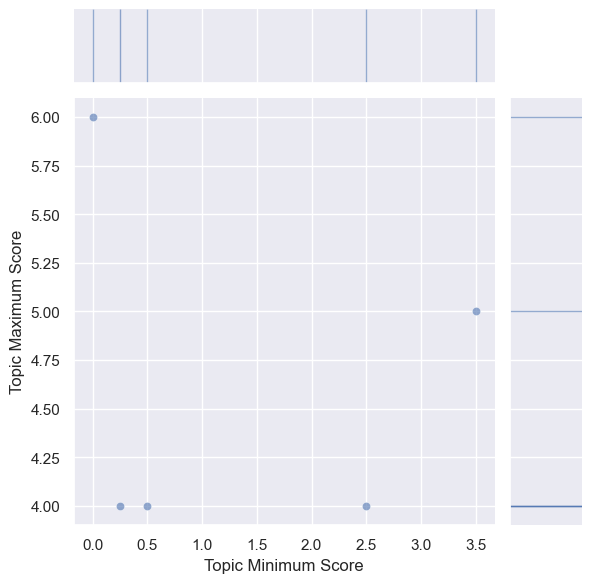

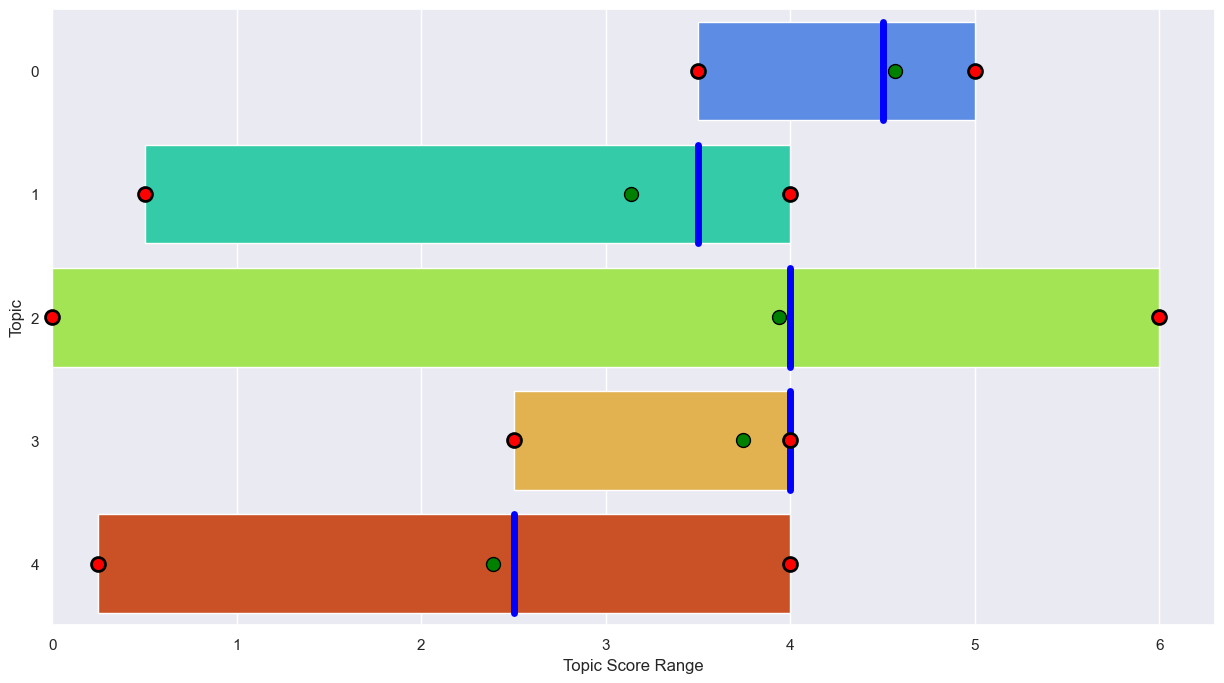

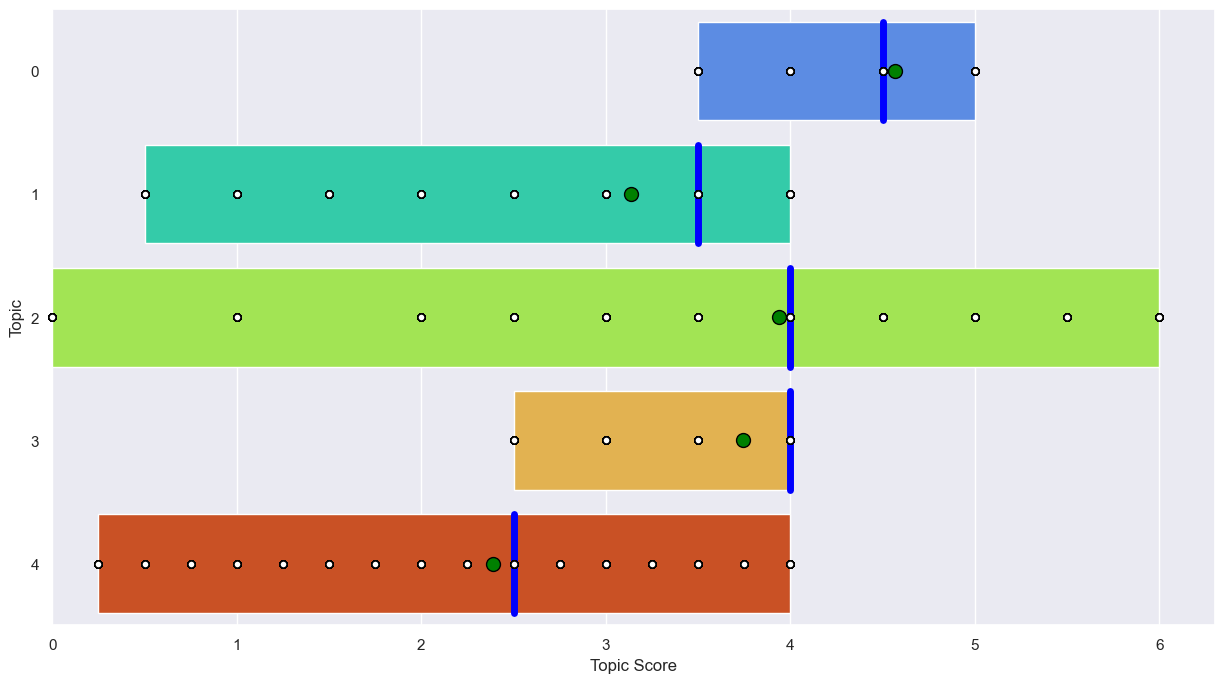

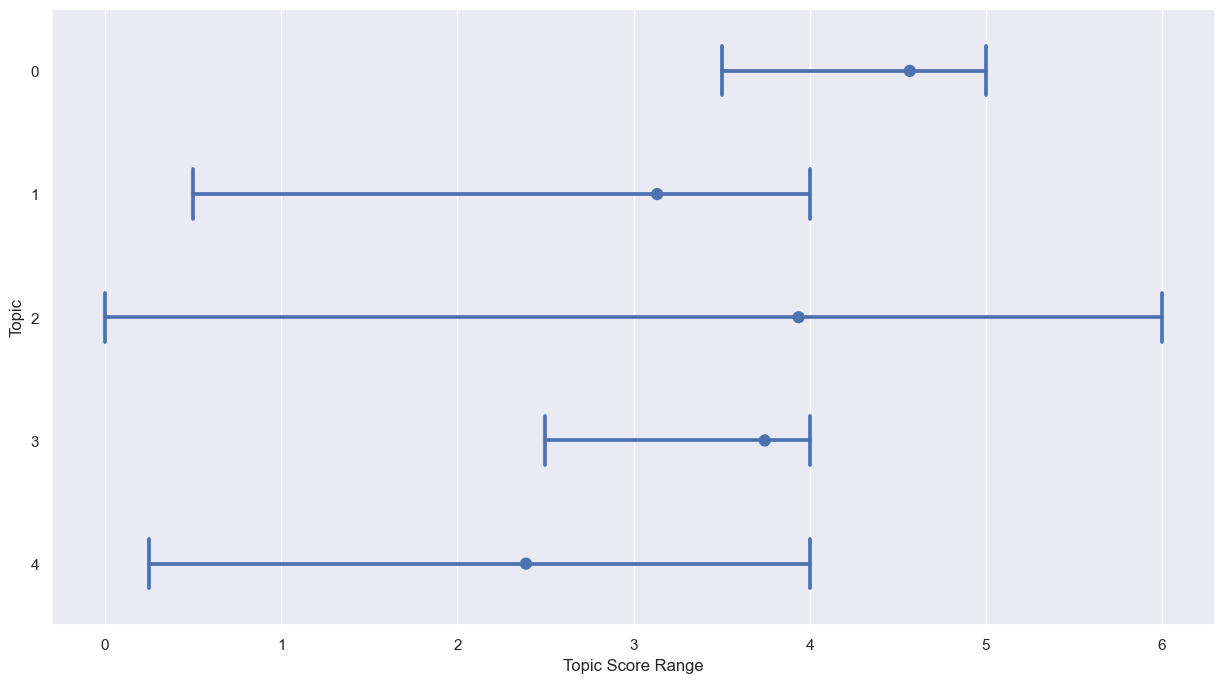

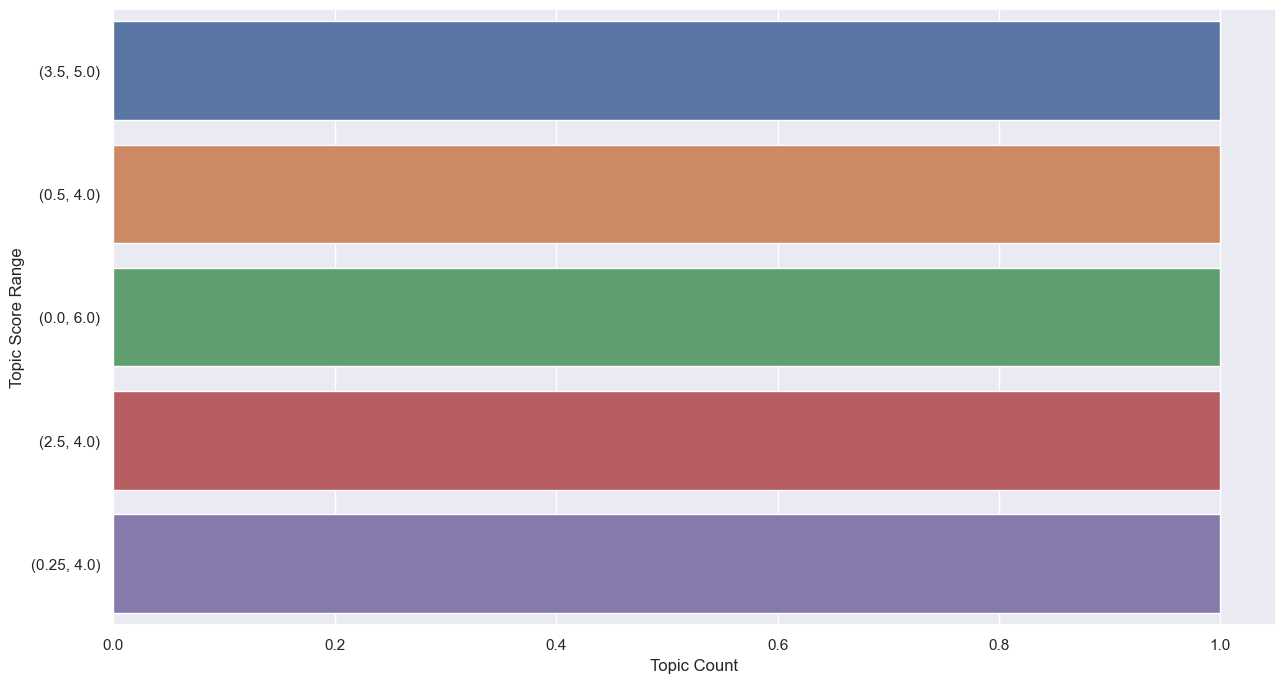

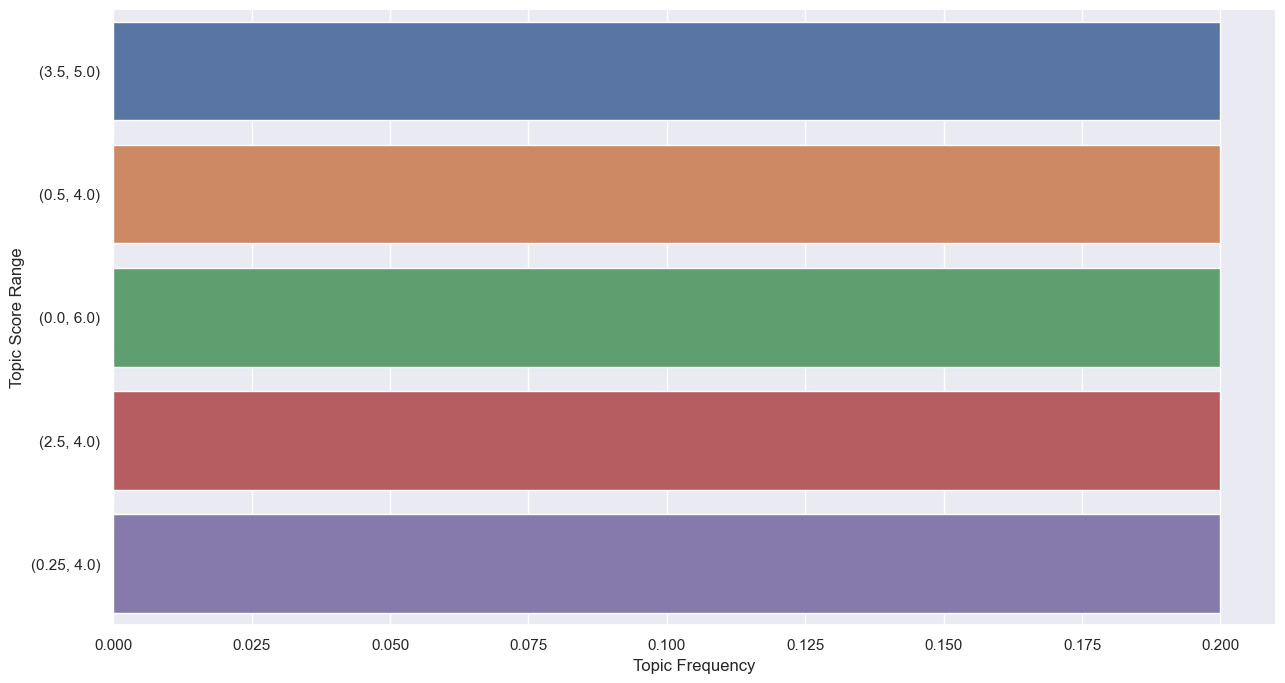

Course Evaluation Score Range:

Number of Courses: 1
Number of Unique Score Ranges: 1
Minima of Course Ranges are all equal: True
Maxima of Course Ranges are all equal: True
Minimum Course Score: 8.5
Maximum Course Score: 98.0


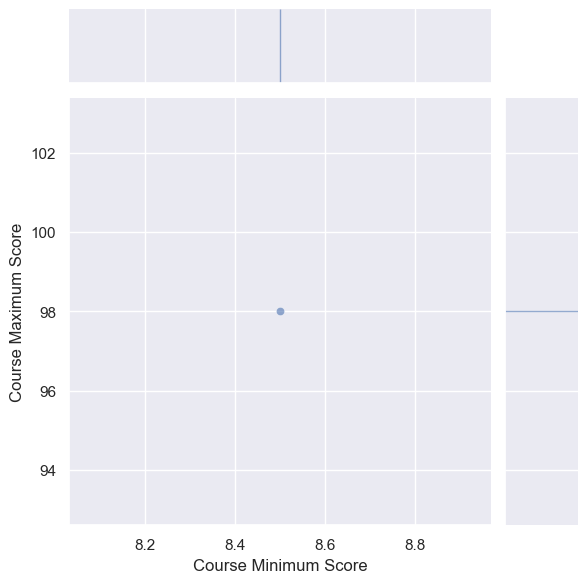

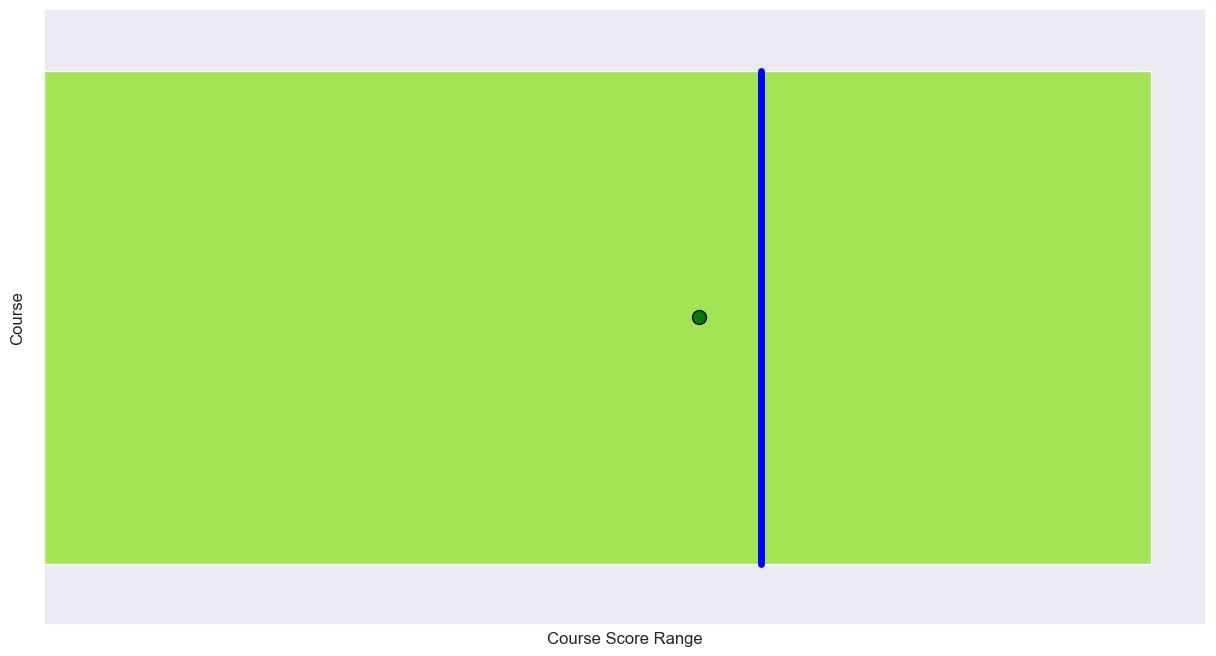

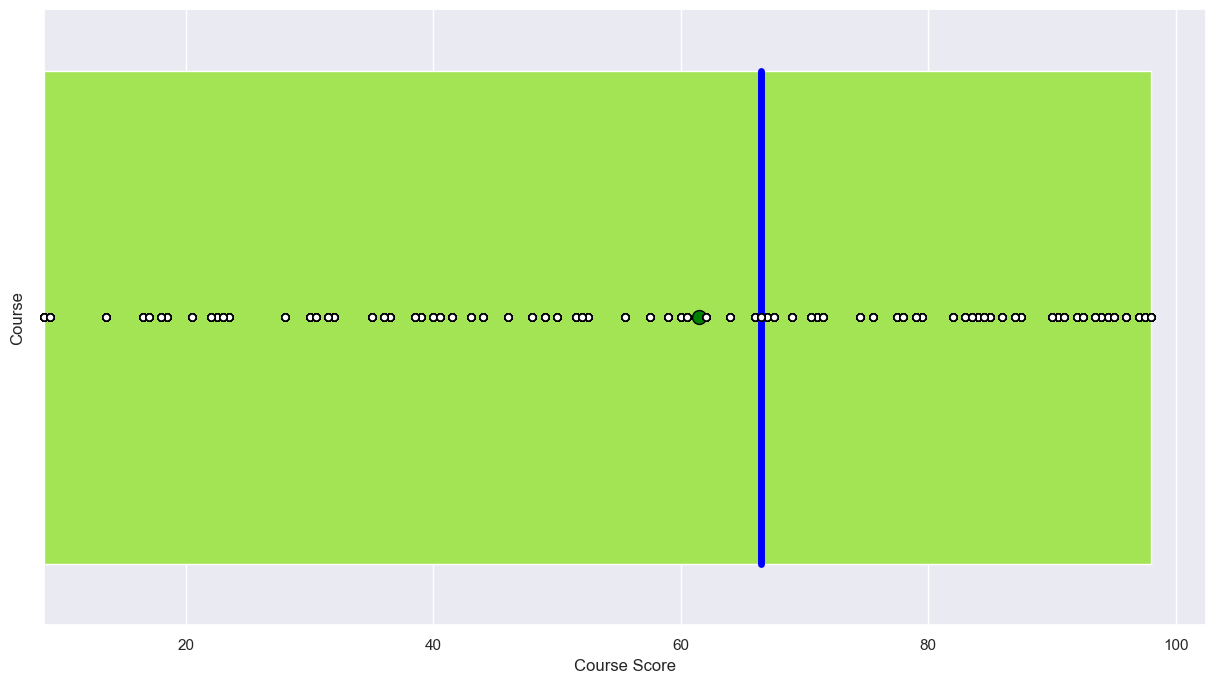

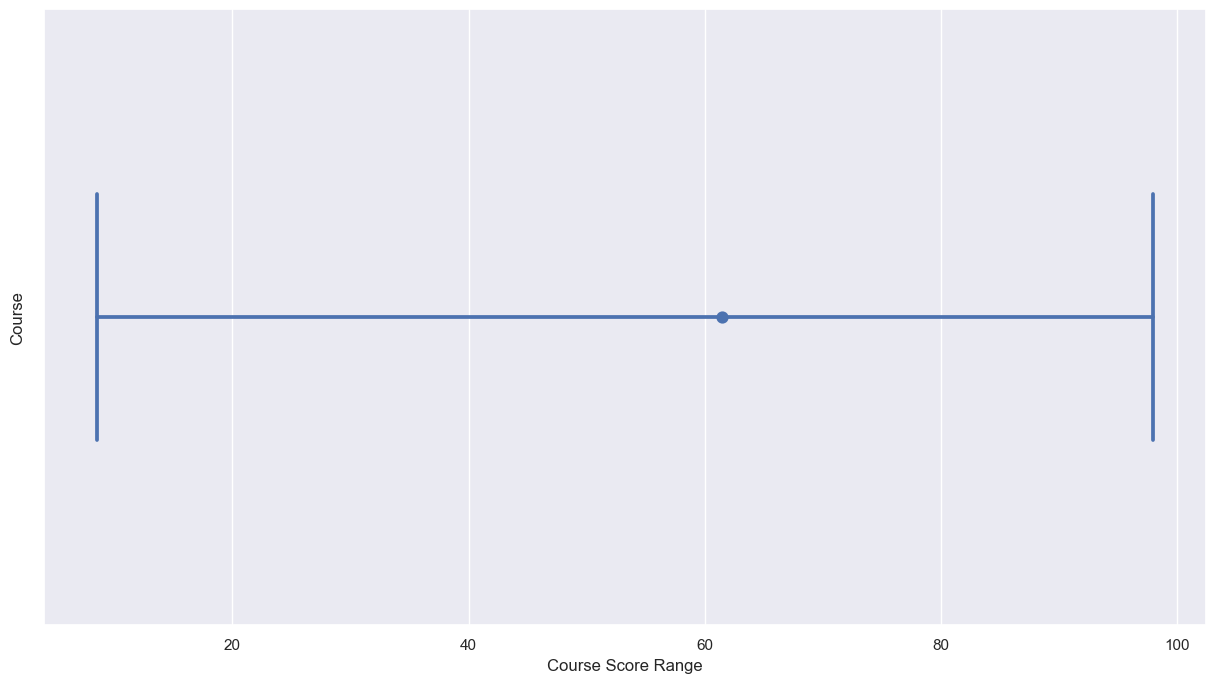

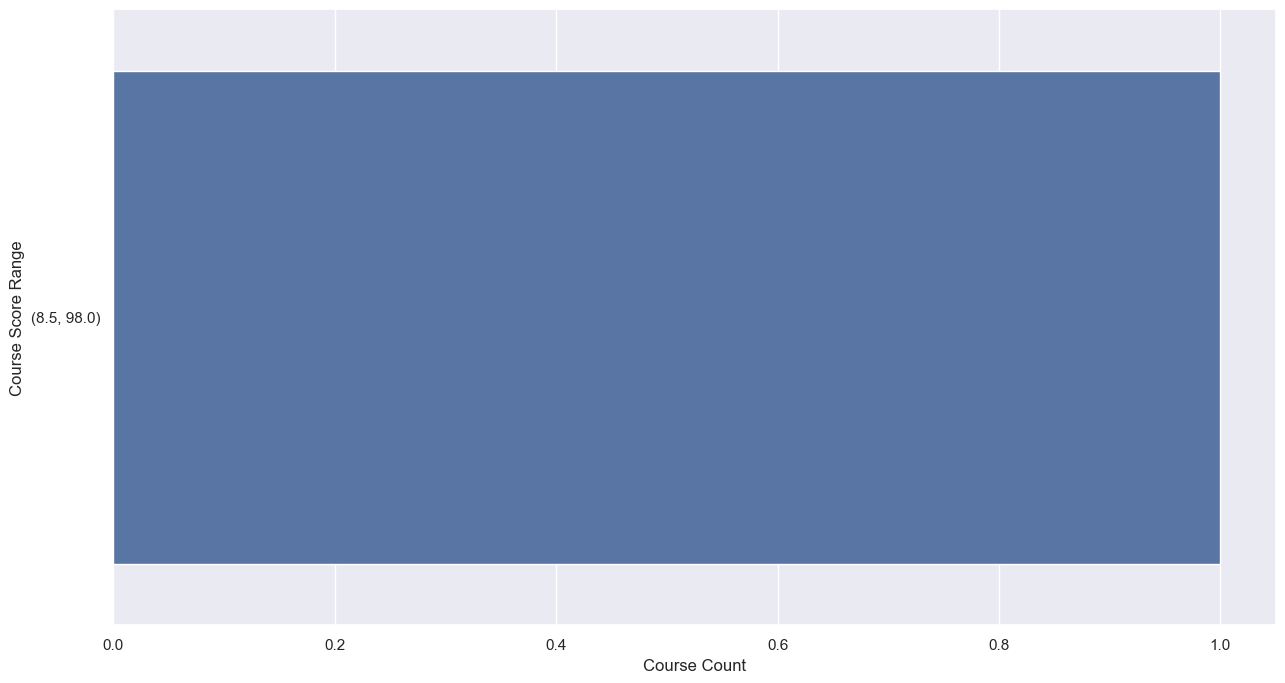

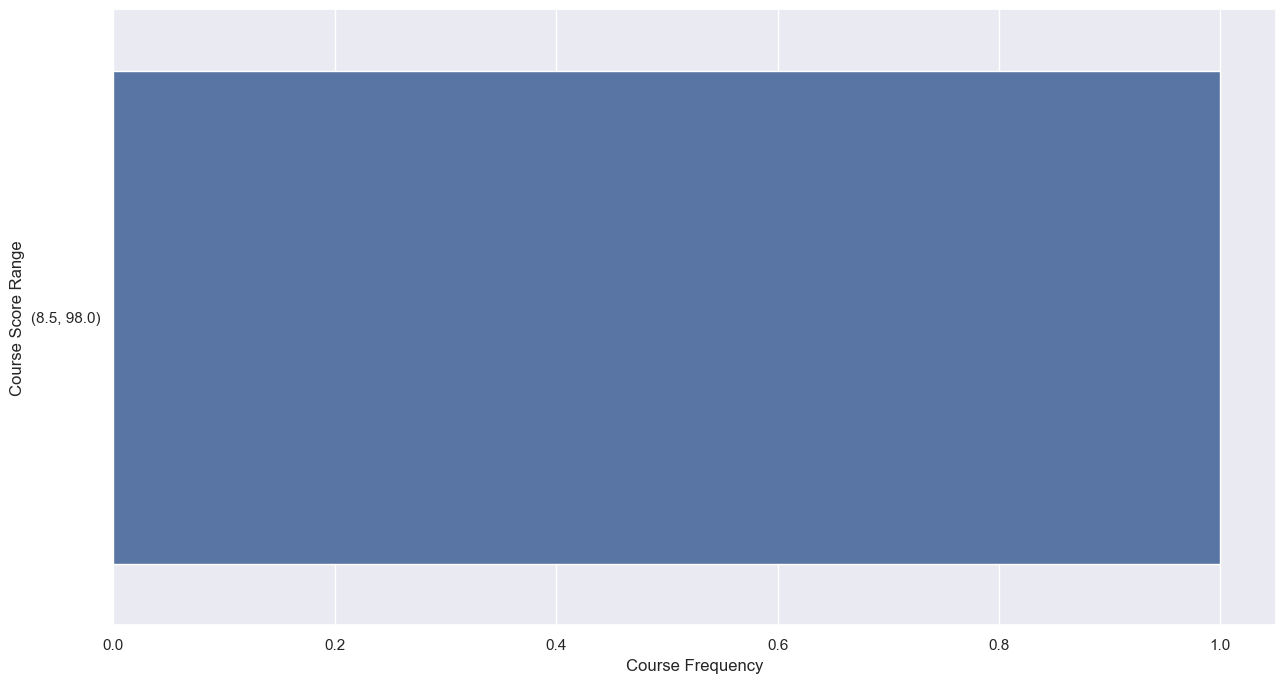

In [17]:
evaluation_score_range_dict = return_and_plot_evaluation_score_range(interactions,
                                                                     LEARNING_ACTIVITY_FIELD,
                                                                     EVALUATION_LEARNING_ACTIVITY_SCORE_FIELD,
                                                                     GROUP_FIELD,
                                                                     EVALUATION_GROUP_SCORE_FIELD,
                                                                     EVALUATION_COURSE_SCORE_FIELD)

### Transform Data

#### Add Evaluation Fields

In [18]:
interactions = add_evaluation_fields(interactions,
                                     GROUP_FIELD,
                                     USER_FIELD,
                                     LEARNING_ACTIVITY_FIELD,
                                     TIMESTAMP_FIELD,
                                     None,
                                     np.mean,
                                     EVALUATION_GROUP_SCORE_FIELD,
                                     EVALUATION_GROUP_IS_CORRECT_FIELD,
                                     EVALUATION_COURSE_SCORE_FIELD,
                                     EVALUATION_COURSE_IS_CORRECT_FIELD,
                                     False,
                                     False,
                                     EVALUATION_GROUP_SCORE_CORRECT_THRESHOLD,
                                     EVALUATION_COURSE_SCORE_CORRECT_THRESHOLD,
                                     operator.gt,
                                     operator.gt,
                                     calculate_eval_metrics,
                                     start_time_field=TIMESTAMP_FIELD,
                                     end_time_field=END_TIME_FIELD)

100%|██████████| 402/402 [00:00<00:00, 13753.39it/s]


= Repeated Interactions Removal =
Initial number of interactions: 44577
Final number of interactions: 3487
Removed number of interactions: 41090
Removed percentage of interactions: 92.17758036655674%


### Rename Fields

In [19]:
interactions, fields_mapping_df = rename_fields(interactions,
                                                GROUP_FIELD,
                                                USER_FIELD,
                                                LEARNING_ACTIVITY_FIELD,
                                                TIMESTAMP_FIELD)

### Add Sequence ID Field

In [20]:
interactions = add_sequence_id_field(interactions,
                                     GROUP_FIELD)

### Check Dataset

In [21]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3487 entries, 0 to 3486
Data columns (total 86 columns):
 #   Column                                                                                   Non-Null Count  Dtype         
---  ------                                                                                   --------------  -----         
 0   Timestamp                                                                                3487 non-null   datetime64[ns]
 1   User                                                                                     3487 non-null   object        
 2   Topic                                                                                    3487 non-null   object        
 3   Learning Resource                                                                        3487 non-null   object        
 4   Sequence ID                                                                              3487 non-null   object        
 5   Learning Reso

In [22]:
pct_na = get_nas_in_data(interactions)
pct_na

Timestamp                                                                                    0.0 %
User                                                                                         0.0 %
Topic                                                                                        0.0 %
Learning Resource                                                                            0.0 %
Sequence ID                                                                                  0.0 %
Learning Resource Interactions Total                                                       100.0 %
Learning Resource Attempts Total                                                           100.0 %
Learning Resource Hints Total                                                              100.0 %
Learning Resource Time in Seconds Total                                                      0.0 %
Learning Resource Single Score                                                             100.0 %
Learning R

### Create HtmlTables Dataset Info Object

In [23]:
html_table = HtmlTables(DATASET_NAME,
                        interactions, 
                        evaluation_score_range_dict, 
                        HTML_TABLES_DATA_LIST)

### Save the Dataset, Mapping Information and HtmlTables Object 

In [24]:
save_interaction_and_mapping_df(interactions,
                                fields_mapping_df,
                                value_mapping_df,
                                PATH_TO_CLEANED_DATASETS,
                                DATASET_NAME)

In [25]:
pickle_write(html_table,
             PATH_TO_HTML_TABLES_PICKLE_FOLDER,
             DATASET_NAME + HTML_TABLES_PICKLE_NAME)

## Dataset Characteristics

### Dataset Information

---
**Has GROUPING Field:** True

---
**Available Evaluation Metrics**  
Possible Values: 
>- True 
>- False
>- Derived (For 'Is Correct' fields)

Score Threshold to be correct:   
>    Learning Activity Is Correct Threshold: None 
>    Group Is Correct Threshold: None
>    Course Is Correct Threshold: None

>**I. Learning Activity Level**:

- **Number of Interactions Total:** False(could be calculated from clicks/keyboard input or subsequent learning activities)

- **Number of Attempts Total:** False

- **Number of Hints Total:** False

- **Score Highest:** False

- **Score Highest without Hint:** False

- **Score First Attempt:** False

- **Score Last Attempt:** False

- **Number of Interactions until Highest Score:** False

- **Number of Attempts until Highest Score:** False

- **Number of Hints until Highest Score:** False

- **Is Correct:** False
        
- **Is Correct without Hint:** False

- **Is Correct at First Attempt:** False

- **Is Correct at First Attempt without Hint:** False
        
- **Is Correct at Last Attempt :** False

- **Is Correct at Last Attempt without Hint:** False

- **Number of Interactions until Correct:** False

- **Number of Attempts until Correct:** False

- **Number of Hints until Correct:** False


>**II. Group level**:

- **Group Score:** True (intermediate grades are being uesd)

- **Group Is Correct:** False


>**III. Course level**:

- **Course Score:** True  (Final grades of course)

- **Course Is Correct:** False

---
**Additional Information:**

-  [Link](http://www.esng.dibe.unige.it/deeds/LearningMaterials/IndexByTopic.htm) contains the content for the different exercise codes

- There are assessments available for each session (grouping variable) and the whole course (i.e. final exam grades) -> the final exam is itself structured into questions belonging to one of the sessions

- The first session has no intermediate grades -> maybe do not include it?

- After filtering out consecutive learning resources of the same type, there are not many interactions left.

-  Only interactions which resulted from studying for or working on a particular exercise will be included to filter out not learning path related noise

- The final exam (used for Course Score) could have been taken 2 times -> the better grade of those 2 is used for the course score

- Maybe generate number of interactions for learning activity!!!! (click interactions)

- Exercises only labeled as ES are not yet started exercises and need therefore be removed

### Available Fields

In [26]:
html_table.display_available_fields()

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th style = "background-color: royalblue; color: white; text-align:center"> </th>
      <th style = "background-color: royalblue; color: white; text-align:center">Is Available</th>
    </tr>
    <tr>
      <th style = "background-color: royalblue; color: white; text-align:center">Field</th>
      <th style = "background-color: royalblue; color: white; text-align:center">educational_process_mining</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Timestamp</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">User</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Sequence ID</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Interactions Total</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Attempts Total</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Hints Total</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Time in Seconds Total</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Single Score</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Single Score (Hint Taken Equals Lowest Score)</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Single Score (Not First Attempt Equals Lowest Score)</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Highest Score</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Highest Score Without Hint</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource First Attempt Score</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Last Attempt Score</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Interactions Until Highest Score</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Attempts Until Highest Score</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Hints Until Highest Score</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Time in Seconds Until Highest Score</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Is Correct</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Is Correct Without Hints</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource First Attempt Is Correct</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource First Attempt Is Correct Without Hints</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Last Attempt Is Correct</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Last Attempt Is Correct Without Hints</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Interactions Until Correct</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Attempts Until Correct</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Hints Until Correct</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Learning Resource Time in Seconds Until Correct</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Score</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Is Correct</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Interactions Total All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Attempts Total All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Hints Total All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Time in Seconds Total All Learning Resources Mean</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Single Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Single Score (Hint Taken Equals Lowest Score) All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Single Score (Not First Attempt Equals Lowest Score) All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Highest Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Highest Score Without Hint All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic First Attempt Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Last Attempt Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Interactions Until Highest Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Attempts Until Highest Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Hints Until Highest Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Time in Seconds Until Highest Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Is Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Is Correct Without Hints All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic First Attempt Is Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic First Attempt Is Correct Without Hints All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Last Attempt Is Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Last Attempt Is Correct Without Hints All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Interactions Until Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Attempts Until Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Hints Until Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Topic Time in Seconds Until Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Score</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Is Correct</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Interactions Total All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Attempts Total All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Hints Total All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Time in Seconds Total All Learning Resources Mean</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Single Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Single Score (Hint Taken Equals Lowest Score) All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Single Score (Not First Attempt Equals Lowest Score) All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Highest Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Highest Score Without Hint All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course First Attempt Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Last Attempt Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Interactions Until Highest Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Attempts Until Highest Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Hints Until Highest Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Time in Seconds Until Highest Score All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Is Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Is Correct Without Hints All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course First Attempt Is Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course First Attempt Is Correct Without Hints All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Last Attempt Is Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Last Attempt Is Correct Without Hints All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Interactions Until Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Attempts Until Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Hints Until Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Time in Seconds Until Correct All Learning Resources Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Score All Topics Mean</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
    </tr>
    <tr>
      <td style = "background-color: rgb(80, 80, 80); color: white">Course Is Correct All Topics Mean</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
    </tr>
  </tbody>
</table>

### Score - Is_Correct Relationship

In [27]:
html_table.display_score_is_correct_relationship()

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style = "background-color: royalblue; color: white; text-align:center"></th>
      <th style = "background-color: royalblue; color: white; text-align:center"></th>
      <th style = "background-color: royalblue; color: white; text-align:center">Has Field</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Has Score Field</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Has Is_Correct Field</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Chosen Score Is_Correct Threshold</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Score Minimum In Documentation</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Score Maximum In Documentation</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Score Minimum in Data Identical Over Evaluation Elements</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Score Maximum in Data Identical Over Evaluation Elements</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Score Minimum in Data</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Score Maximum in Data</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top" style = "background-color: rgb(80, 80, 80); color: white">educational_process_mining</th>
      <th style = "background-color: rgb(80, 80, 80); color: white; text-align:center">Learning Resource</th>
      <td style = "background-color: green; color: white; text-align:center">True</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
      <td style = "text-align:center">-</td>
      <td style = "text-align:center">-</td>
      <td style = "text-align:center">-</td>
      <td style = "text-align:center">-</td>
      <td style = "text-align:center">-</td>
      <td style = "text-align:center">-</td>
      <td style = "text-align:center">-</td>
    </tr>
    <tr>
      <th style = "background-color: rgb(80, 80, 80); color: white; text-align:center">Topic</th>
      <td style = "background-color: green; color: white; text-align:center">True</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
      <td style = "text-align:center">-</td>
      <td style = "text-align:center">-</td>
      <td style = "text-align:center">-</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">0.0</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">6.0</td>
    </tr>
    <tr>
      <th style = "background-color: rgb(80, 80, 80); color: white; text-align:center">Course</th>
      <td style = "background-color: green; color: white; text-align:center">True</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
      <td style = "background-color: red; color: white; text-align:center">False</td>
      <td style = "text-align:center">-</td>
      <td style = "text-align:center">-</td>
      <td style = "text-align:center">-</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
      <td style = "background-color: green; color: white; text-align:center">True</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">8.5</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">98.0</td>
    </tr>
  </tbody>
</table>

### Summary Statistics

In [28]:
html_table.display_summary_statistics()

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style = "background-color: royalblue; color: white; text-align:center"></th>
      <th style = "background-color: royalblue; color: white; text-align:center"># of Interactions</th>
      <th style = "background-color: royalblue; color: white; text-align:center"># of Unique Users</th>
      <th style = "background-color: royalblue; color: white; text-align:center"># of Unique Topics</th>
      <th style = "background-color: royalblue; color: white; text-align:center"># of Unique Learning Resources</th>
      <th style = "background-color: royalblue; color: white; text-align:center"># of Sequences</th>
      <th style = "background-color: royalblue; color: white; text-align:center"># of Unique Sequences</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Sparsity User-Learning Resource Matrix %</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Sparsity User-Topic Matrix %</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style = "background-color: rgb(80, 80, 80); color: white; text-align:center">educational_process_mining</th>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">3487</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">93</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">5</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">29</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">402</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">267</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">34.22</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">13.55</td>
    </tr>
  </tbody>
</table>

### Sequence Summary Statistics

In [ ]:
html_table.display_sequence_statistics()

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style = "background-color: royalblue; color: white; text-align:center"></th>
      <th style = "background-color: royalblue; color: white; text-align:center"># of Sequences</th>
      <th style = "background-color: royalblue; color: white; text-align:center"># of Unique Sequences</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Mean Sequence Length</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Median Sequence Length</th>
      <th style = "background-color: royalblue; color: white; text-align:center">Standard Deviation Sequence Length</th>
      <th style = "background-color: royalblue; color: white; text-align:center">IQR Sequence Length</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th style = "background-color: rgb(80, 80, 80); color: white; text-align:center">csedm_2019</th>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">83</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">66</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">9.57</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">8.0</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">8.7</td>
      <td style = "background-color: rgb(0, 0, 204); color: white; text-align:center">8.0</td>
    </tr>
  </tbody>
</table>

## Group-User-Learning_Activity Relationship

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Interactions per User:
----------------------------------------------------------------------------------------------------
mean: number of interactions per User: 37.494623655913976
median: number of interactions per User: 36.0
max: number of interactions per User: 132
min: number of interactions per User: 5
std: number of interactions per User: 19.101345078926173
iqr: number of interactions per User: 19.0


Plots:


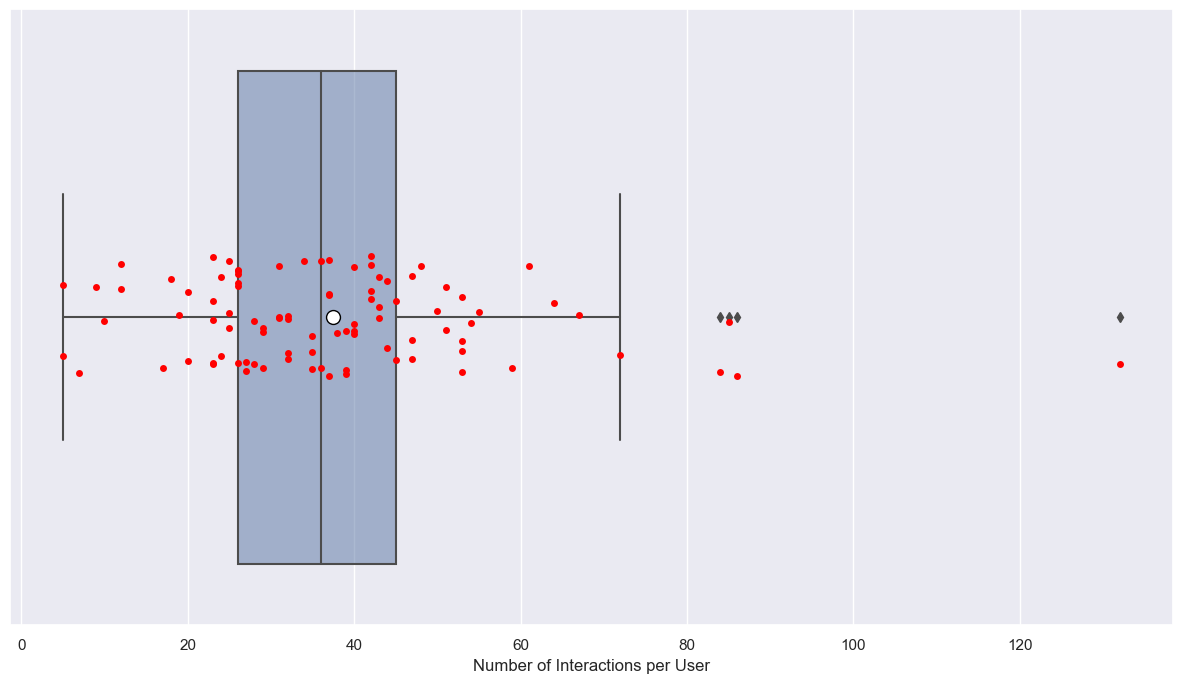

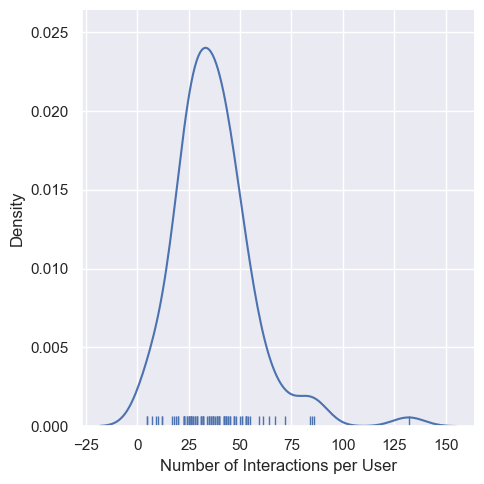

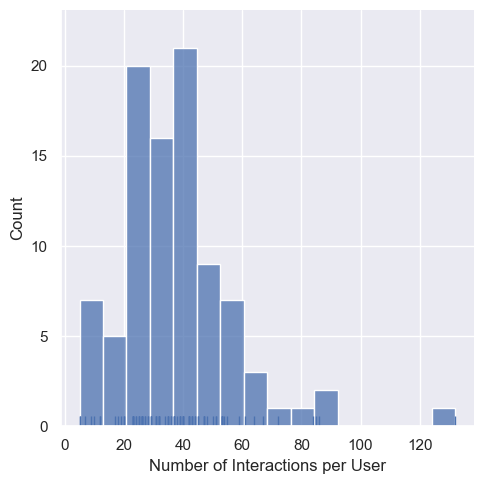

****************************************************************************************************
****************************************************************************************************
----------------------------------------------------------------------------------------------------
Number of Unique Topics per User:
----------------------------------------------------------------------------------------------------
mean: Number of Unique Topics per User: 4.32258064516129
median: Number of Unique Topics per User: 5.0
max: Number of Unique Topics per User: 5
min: Number of Unique Topics per User: 1
std: Number of Unique Topics per User: 1.1340701067450034
iqr: Number of Unique Topics per User: 1.0


Plots:


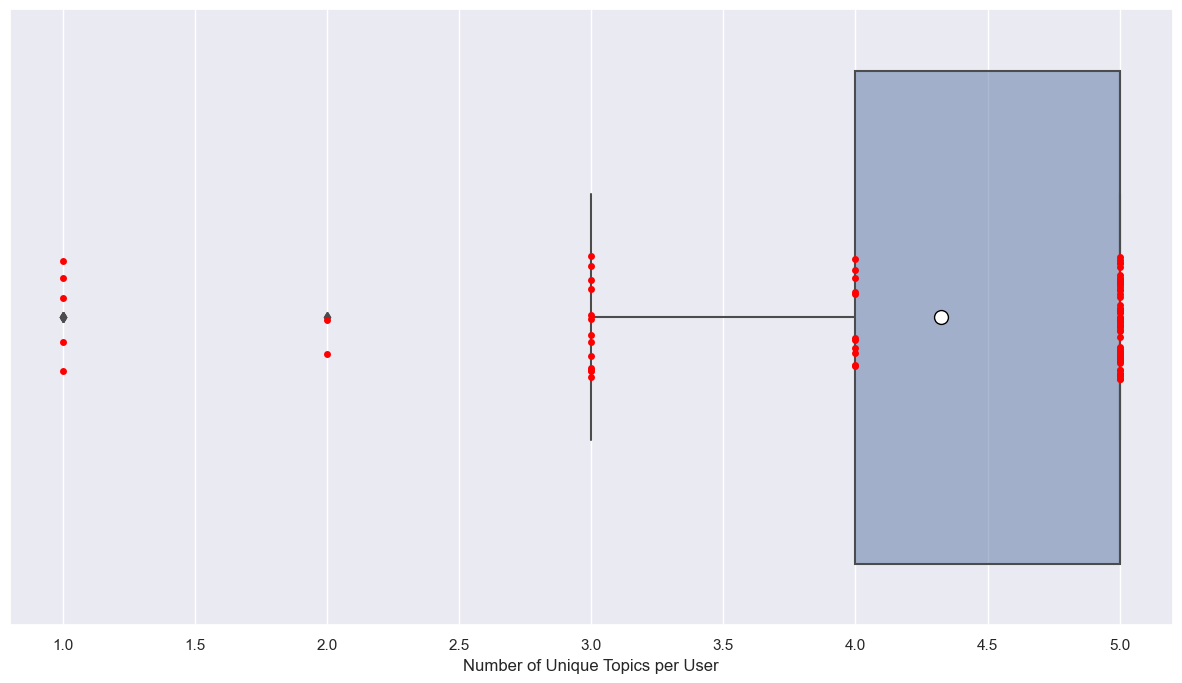

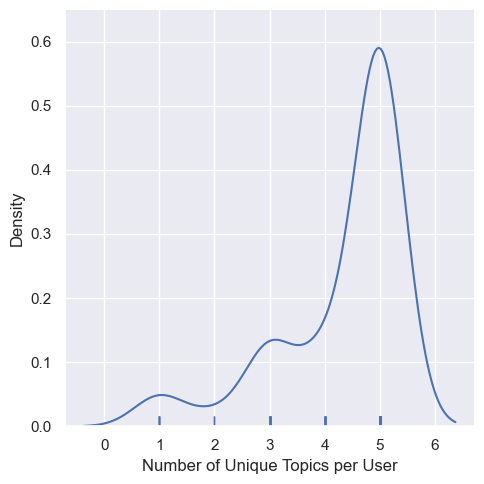

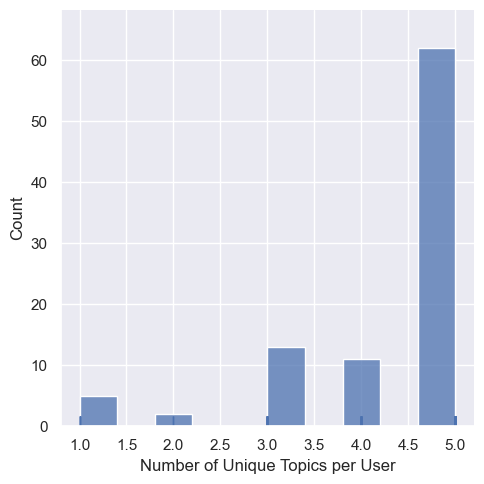

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Number of Unique Learning Resources per User:
----------------------------------------------------------------------------------------------------
mean: Number of Unique Learning Resources per User: 19.0752688172043
median: Number of Unique Learning Resources per User: 21.0
max: Number of Unique Learning Resources per User: 26
min: Number of Unique Learning Resources per User: 4
std: Number of Unique Learning Resources per User: 5.242461583985193
iqr: Number of Unique Learning Resources per User: 5.0


Plots:


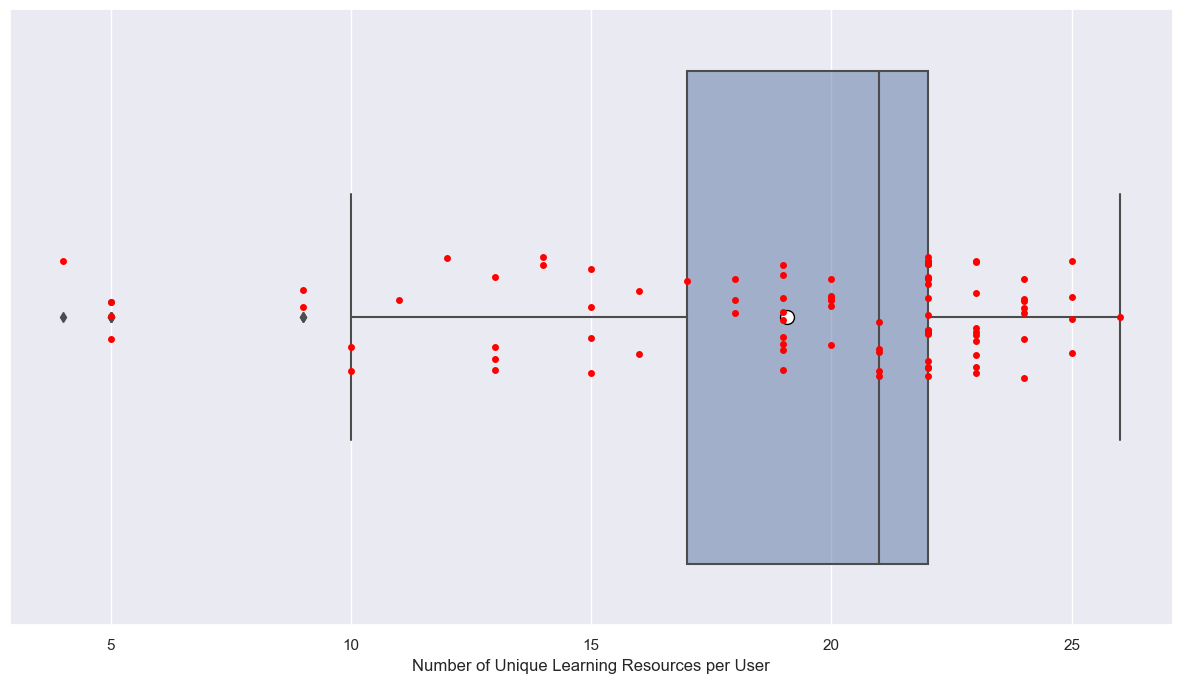

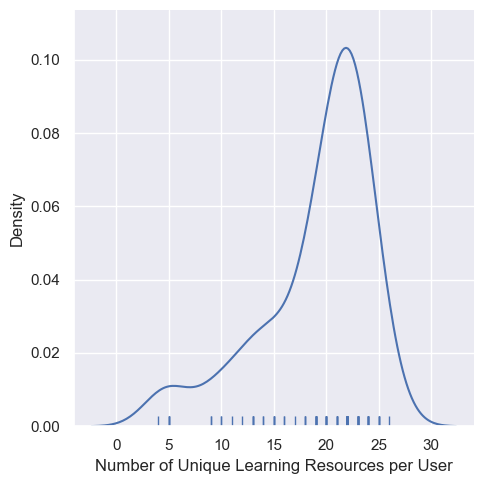

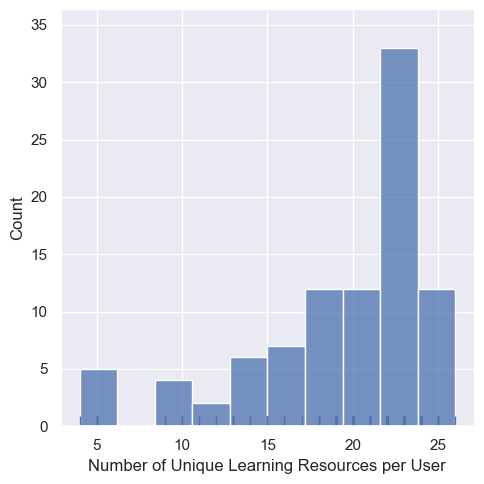

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Number of Unique Users per Topic:
----------------------------------------------------------------------------------------------------
mean: Number of Unique Users per Topic: 80.4
median: Number of Unique Users per Topic: 79.0
max: Number of Unique Users per Topic: 87
min: Number of Unique Users per Topic: 75
std: Number of Unique Users per Topic: 4.979959839195493
iqr: Number of Unique Users per Topic: 7.0


Plots:


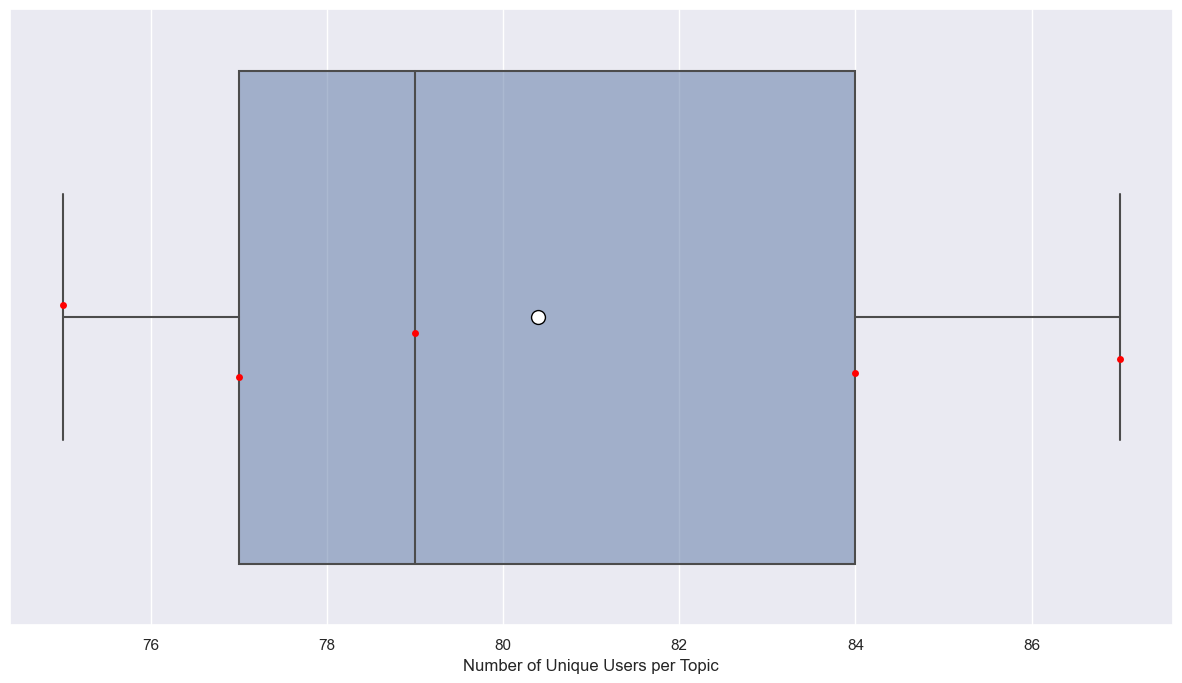

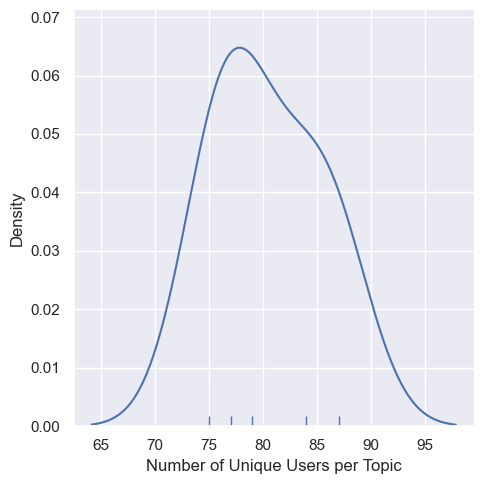

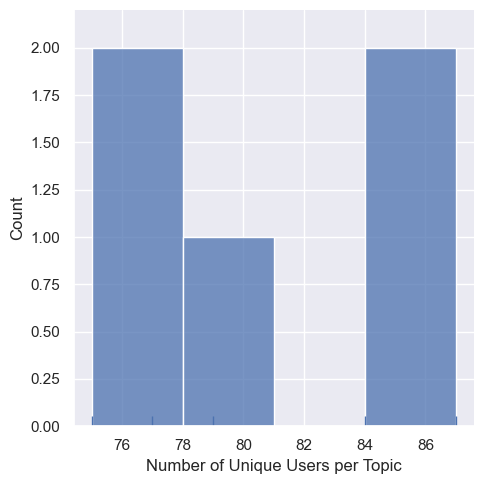

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Number of Unique Learning Resources per Topic:
----------------------------------------------------------------------------------------------------
mean: Number of Unique Learning Resources per Topic: 9.6
median: Number of Unique Learning Resources per Topic: 10.0
max: Number of Unique Learning Resources per Topic: 13
min: Number of Unique Learning Resources per Topic: 7
std: Number of Unique Learning Resources per Topic: 2.3021728866442674
iqr: Number of Unique Learning Resources per Topic: 2.0


Plots:


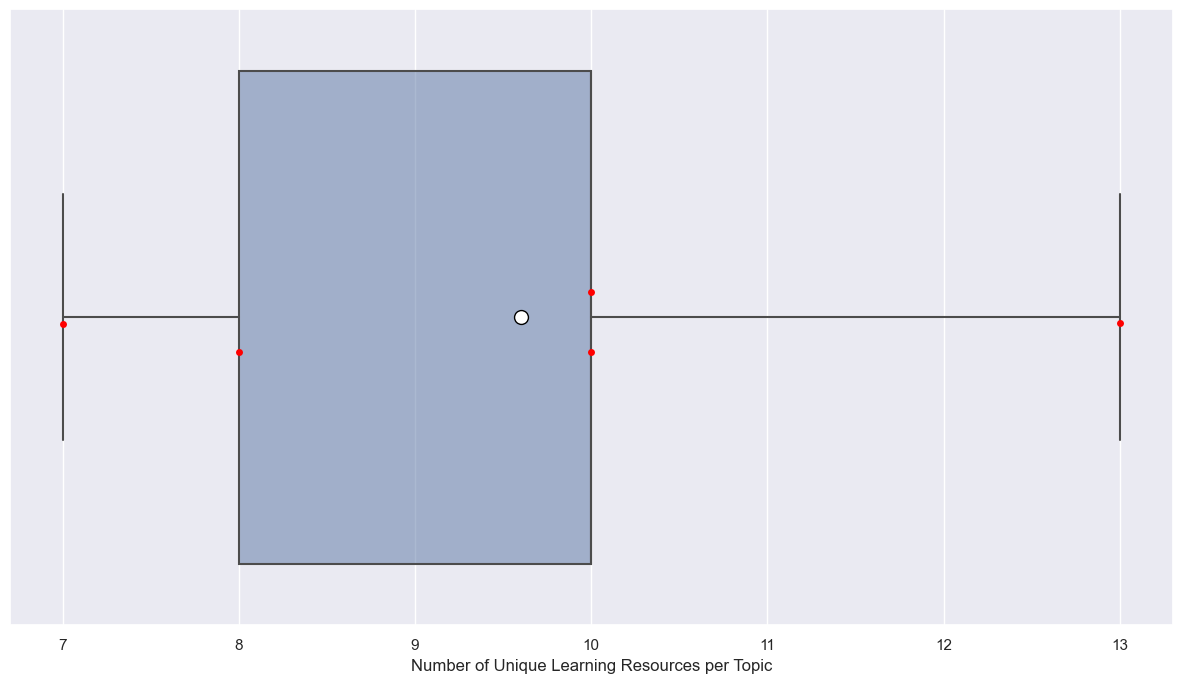

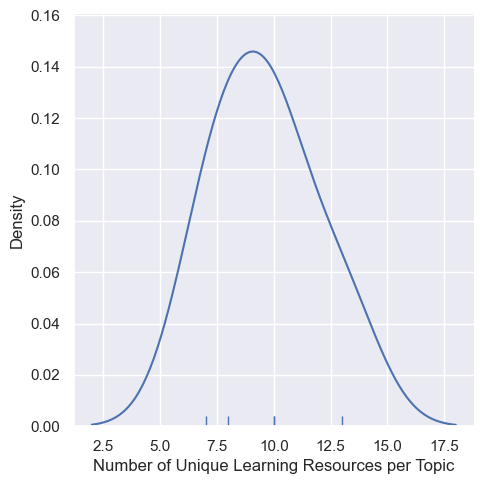

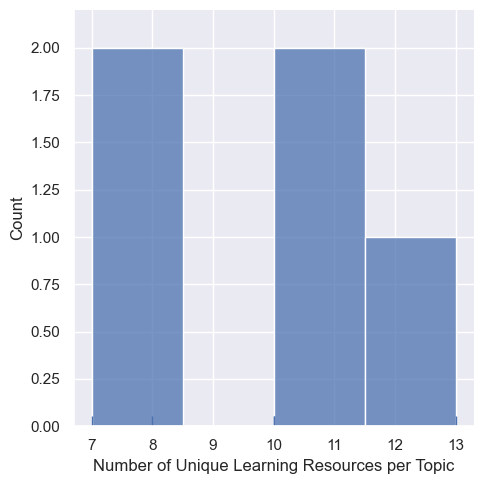

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Number of Unique Users per Learning Resource:
----------------------------------------------------------------------------------------------------
mean: Number of Unique Users per Learning Resource: 61.172413793103445
median: Number of Unique Users per Learning Resource: 74.0
max: Number of Unique Users per Learning Resource: 87
min: Number of Unique Users per Learning Resource: 1
std: Number of Unique Users per Learning Resource: 30.069050255224752
iqr: Number of Unique Users per Learning Resource: 34.0


Plots:


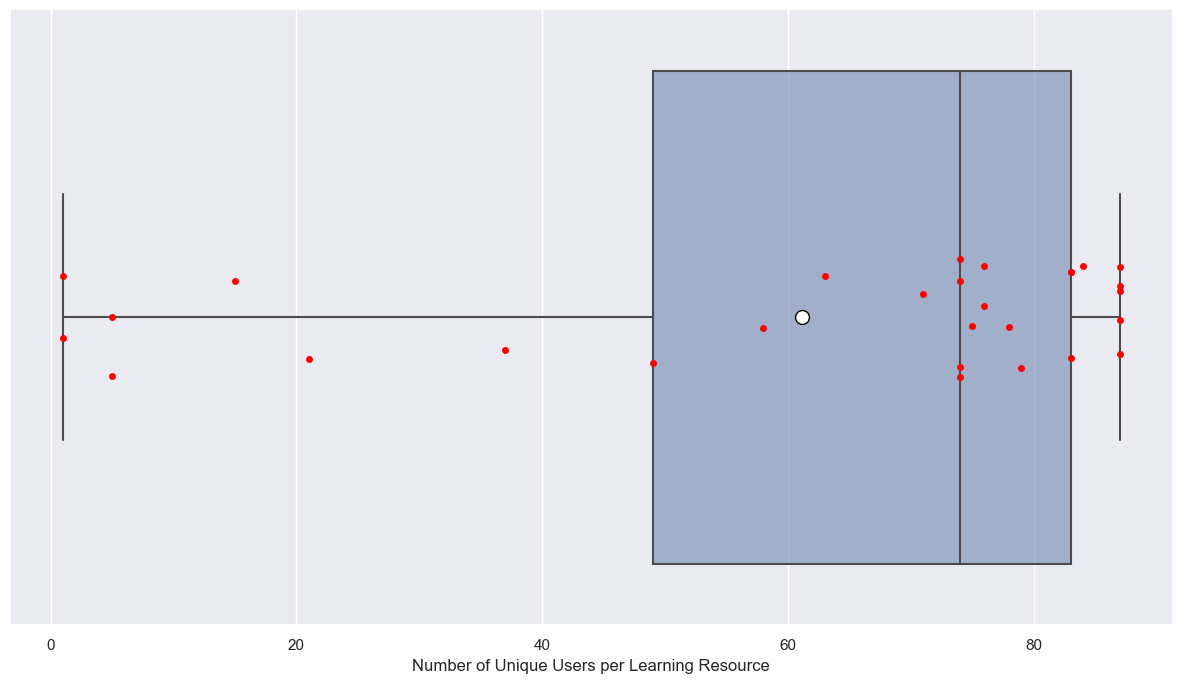

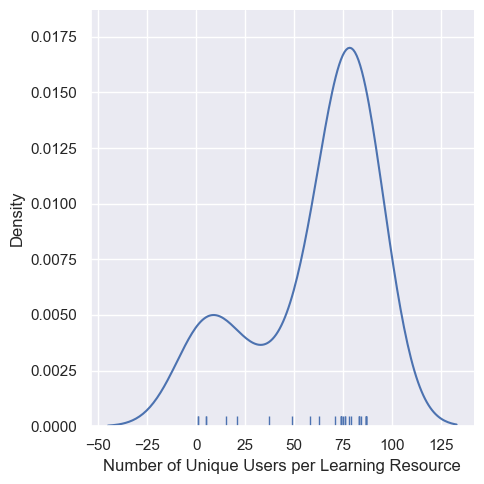

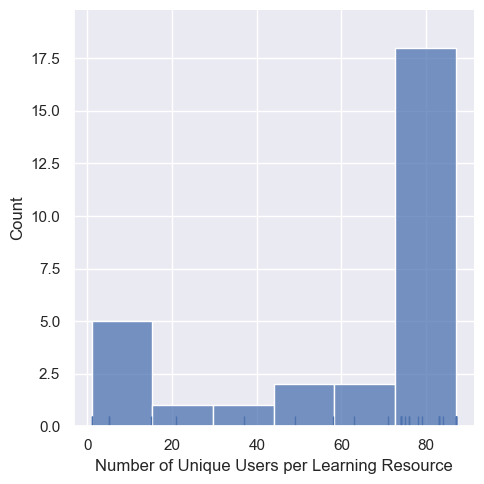

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Number of Unique Topics per Learning Resource:
----------------------------------------------------------------------------------------------------
mean: Number of Unique Topics per Learning Resource: 1.6551724137931034
median: Number of Unique Topics per Learning Resource: 2.0
max: Number of Unique Topics per Learning Resource: 4
min: Number of Unique Topics per Learning Resource: 1
std: Number of Unique Topics per Learning Resource: 0.7688517444384896
iqr: Number of Unique Topics per Learning Resource: 1.0


Plots:


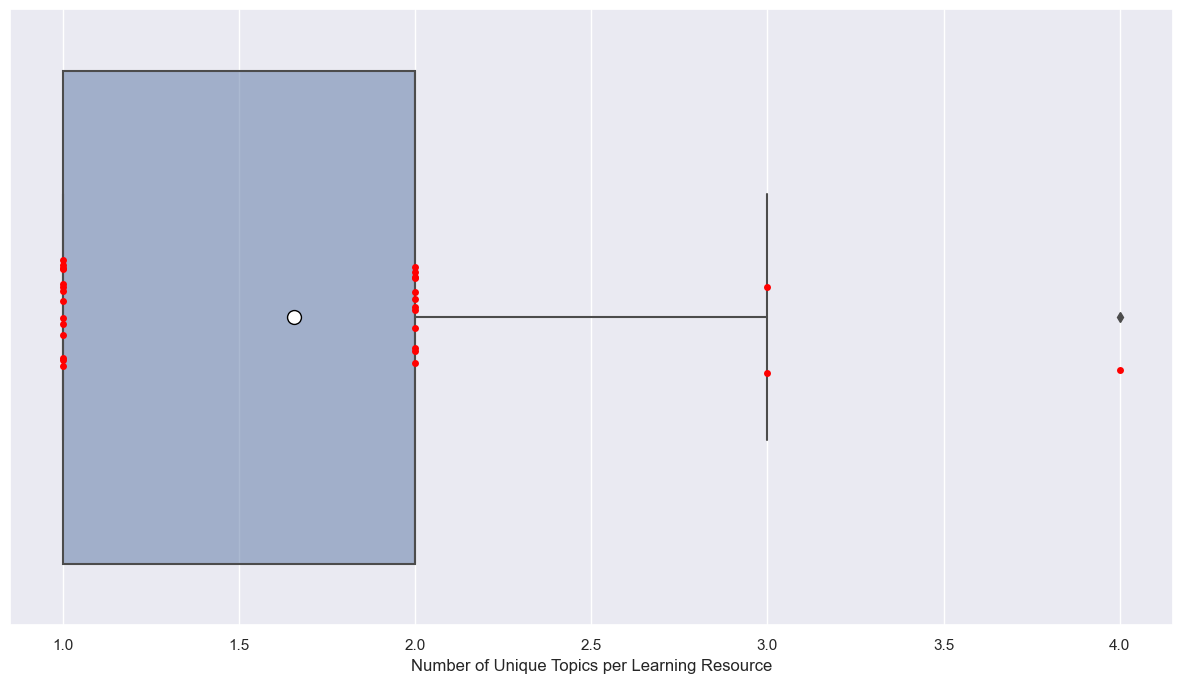

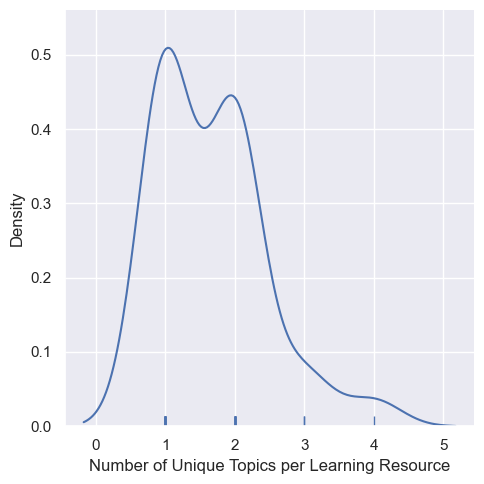

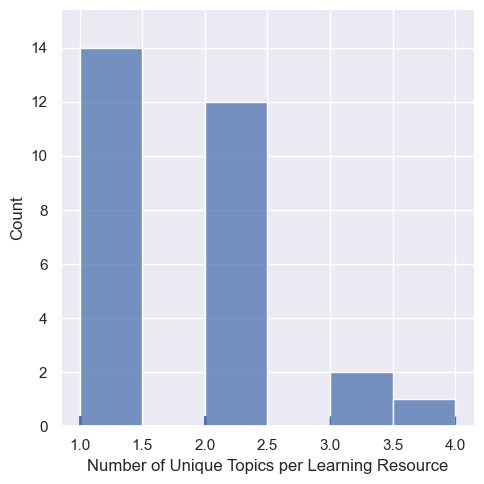

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Mean/Median Number of Interactions per Topic for a User:
----------------------------------------------------------------------------------------------------
mean of Mean Number of Interactions per Topic for a User: 8.629749103942652
median of Mean Number of Interactions per Topic for a User: 8.0
max of Mean Number of Interactions per Topic for a User: 26.4
min of Mean Number of Interactions per Topic for a User: 3.0
std of Mean Number of Interactions per Topic for a User: 3.495798763421309
iqr of Mean Number of Interactions per Topic for a User: 3.8666666666666663

____________________________________________________________________________________________________

mean of Median Numbe

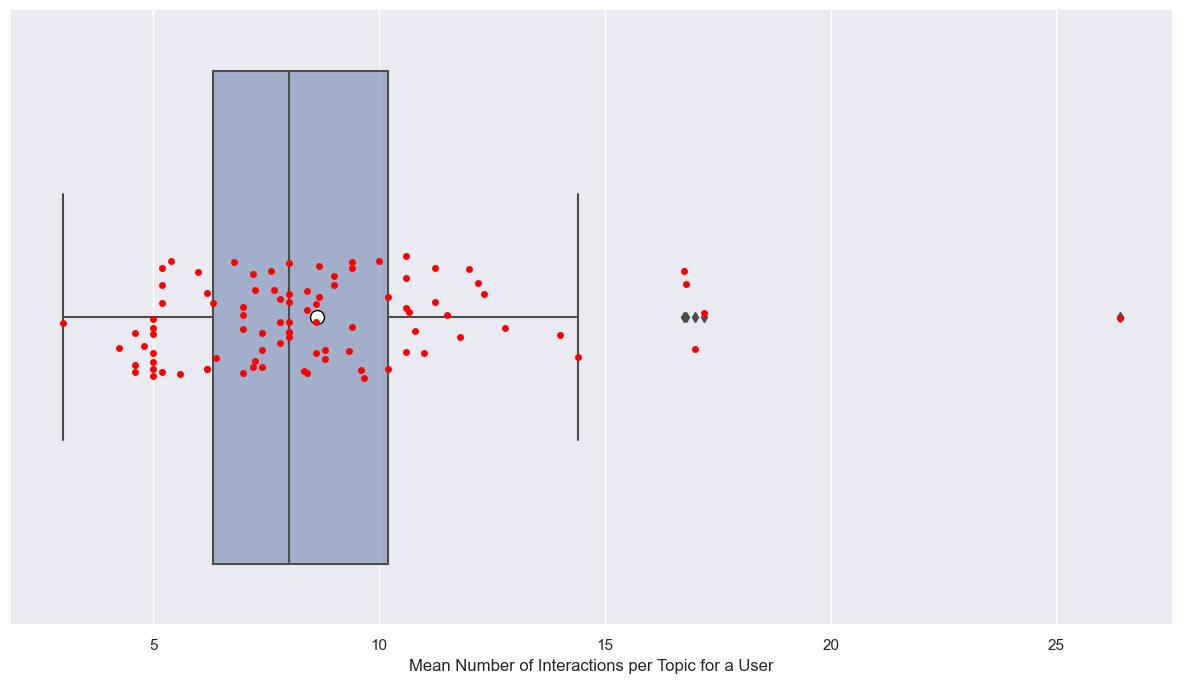

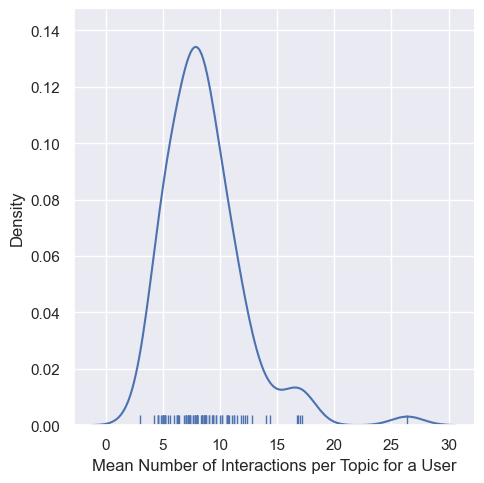

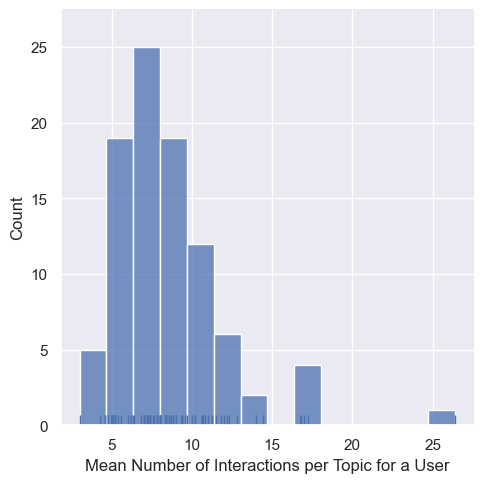



Median:


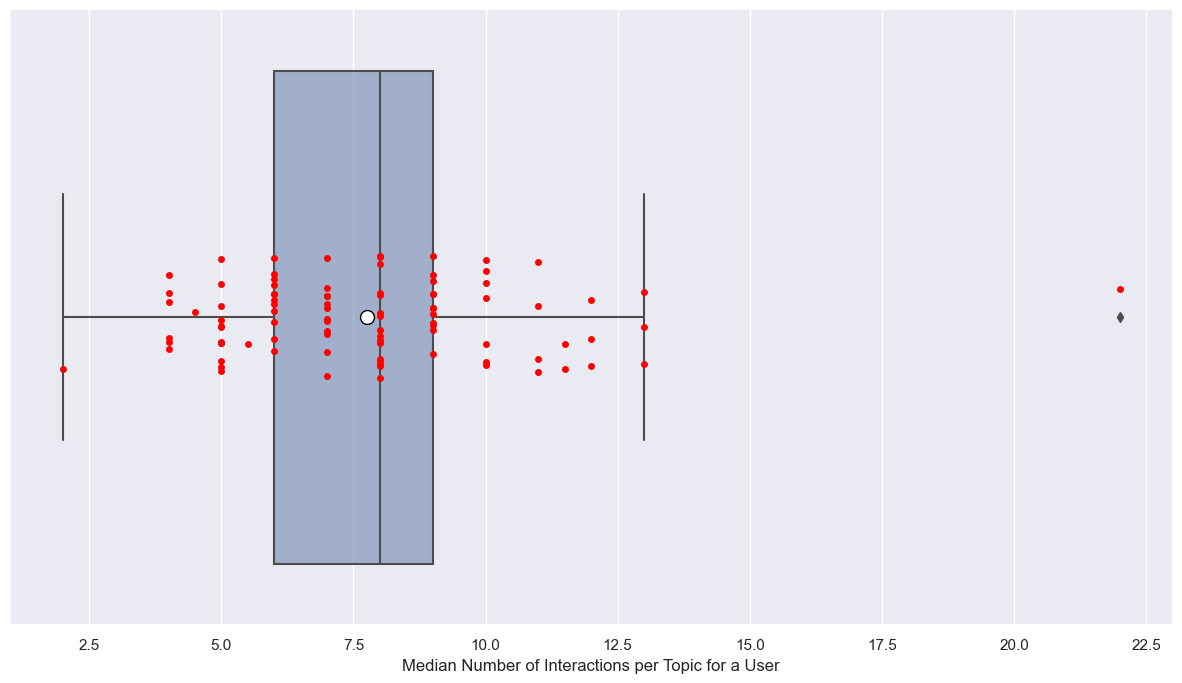

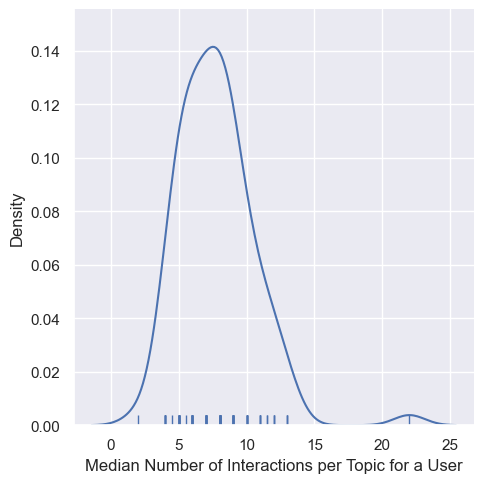

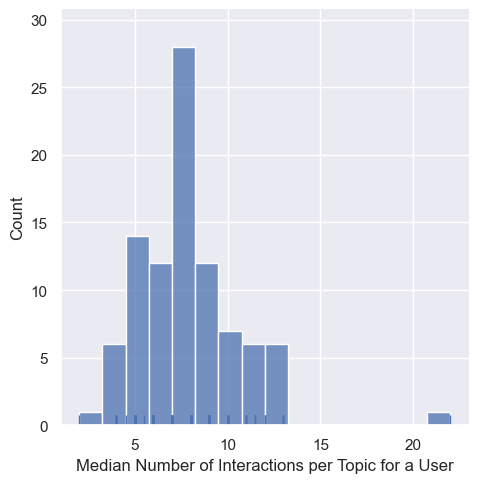

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Mean/Median Number of Interactions per User for a Topic:
----------------------------------------------------------------------------------------------------
mean of Mean Number of Interactions per User for a Topic: 8.699532029152284
median of Mean Number of Interactions per User for a Topic: 7.476190476190476
max of Mean Number of Interactions per User for a Topic: 12.533333333333333
min of Mean Number of Interactions per User for a Topic: 6.8734177215189876
std of Mean Number of Interactions per User for a Topic: 2.4255062534065788
iqr of Mean Number of Interactions per User for a Topic: 2.7186147186147176

______________________________________________________________________________

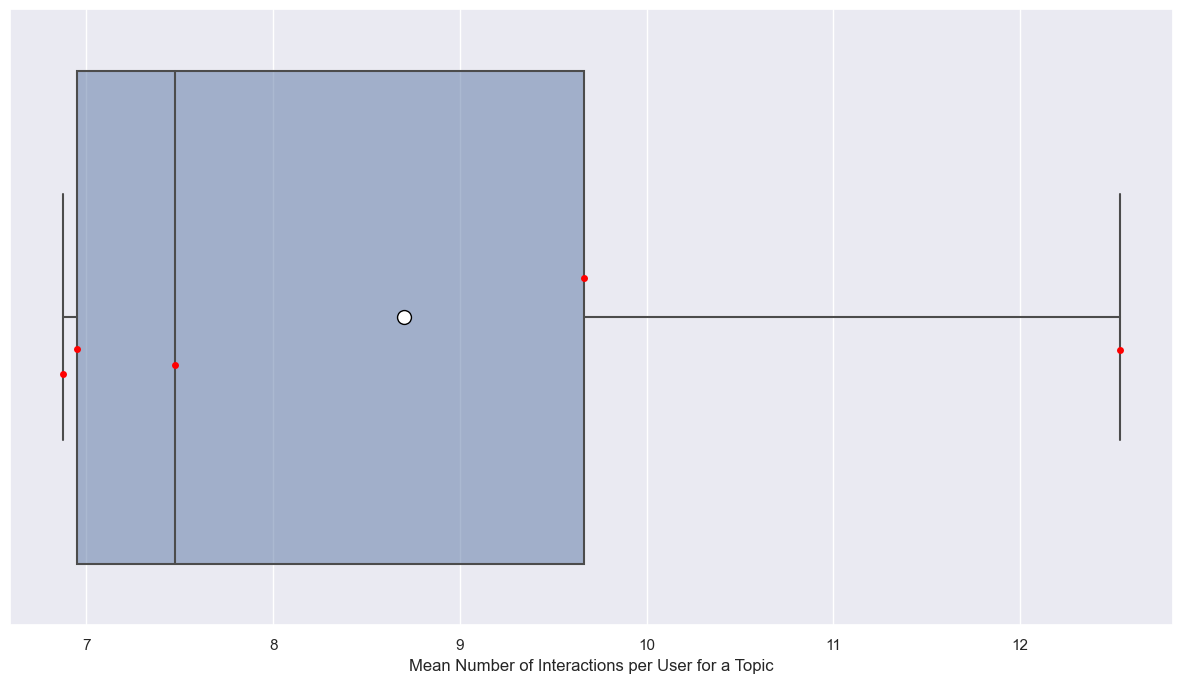

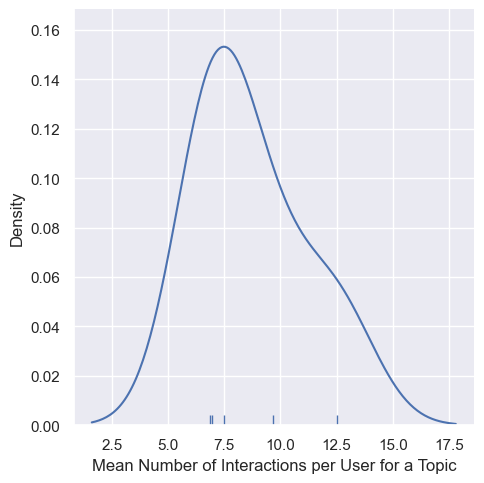

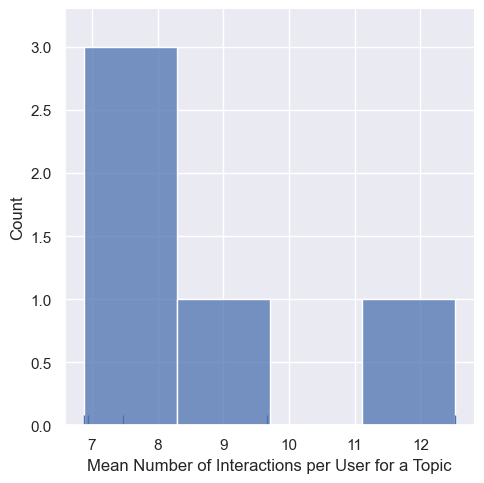



Median:


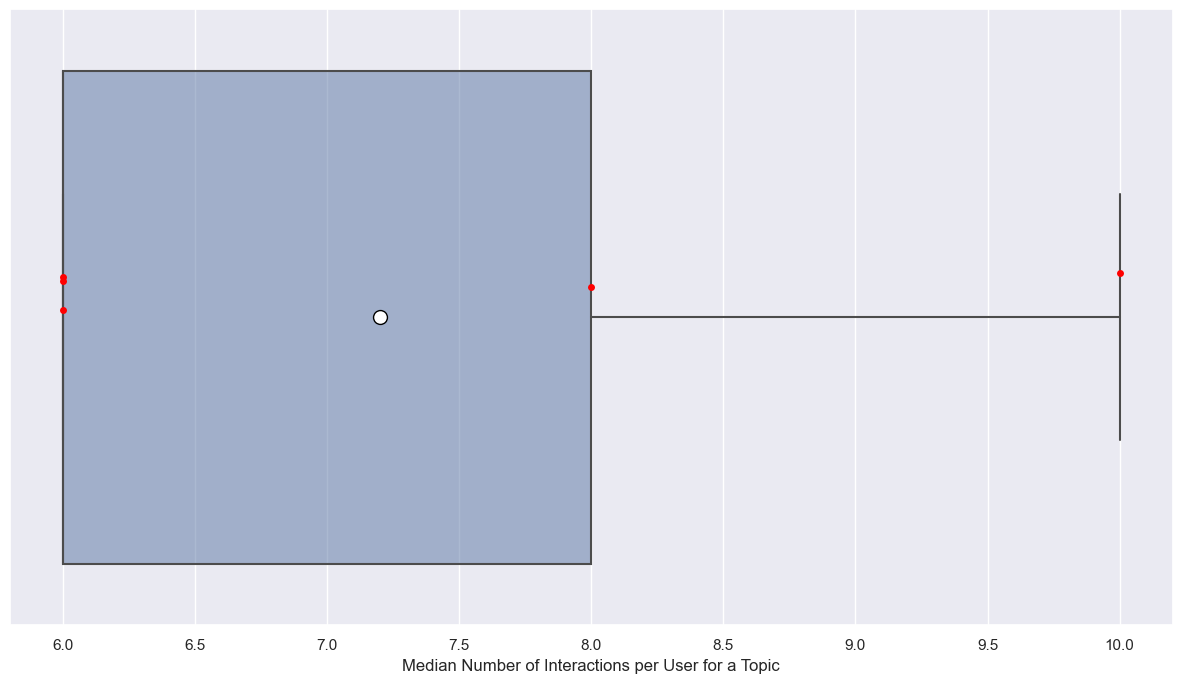

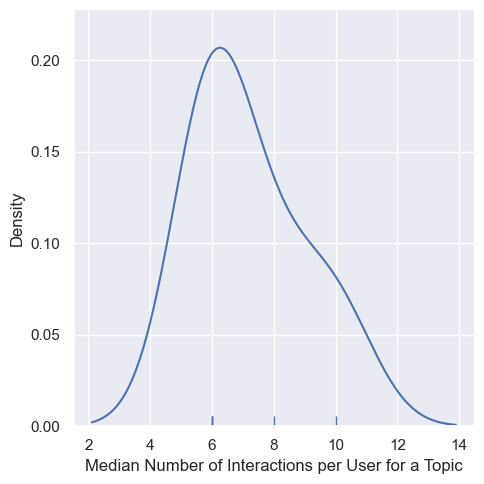

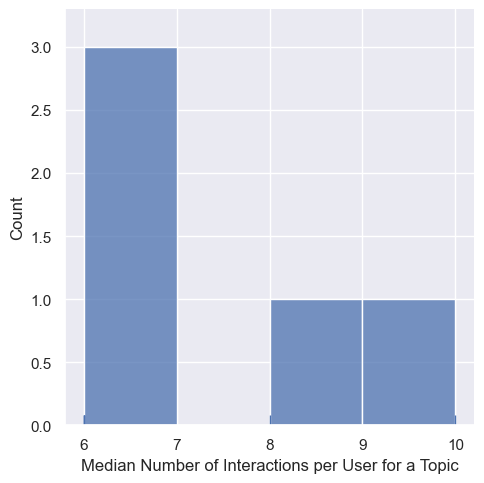

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Mean/Median Number of Unique Learning Resources per Topic for a User:
----------------------------------------------------------------------------------------------------
mean of Mean Number of Unique Learning Resources per Topic for a User: 4.474551971326165
median of Mean Number of Unique Learning Resources per Topic for a User: 4.5
max of Mean Number of Unique Learning Resources per Topic for a User: 5.5
min of Mean Number of Unique Learning Resources per Topic for a User: 2.5

____________________________________________________________________________________________________

mean of Median Number of Unique Learning Resources per Topic for a User: 4.413978494623656
median of Median

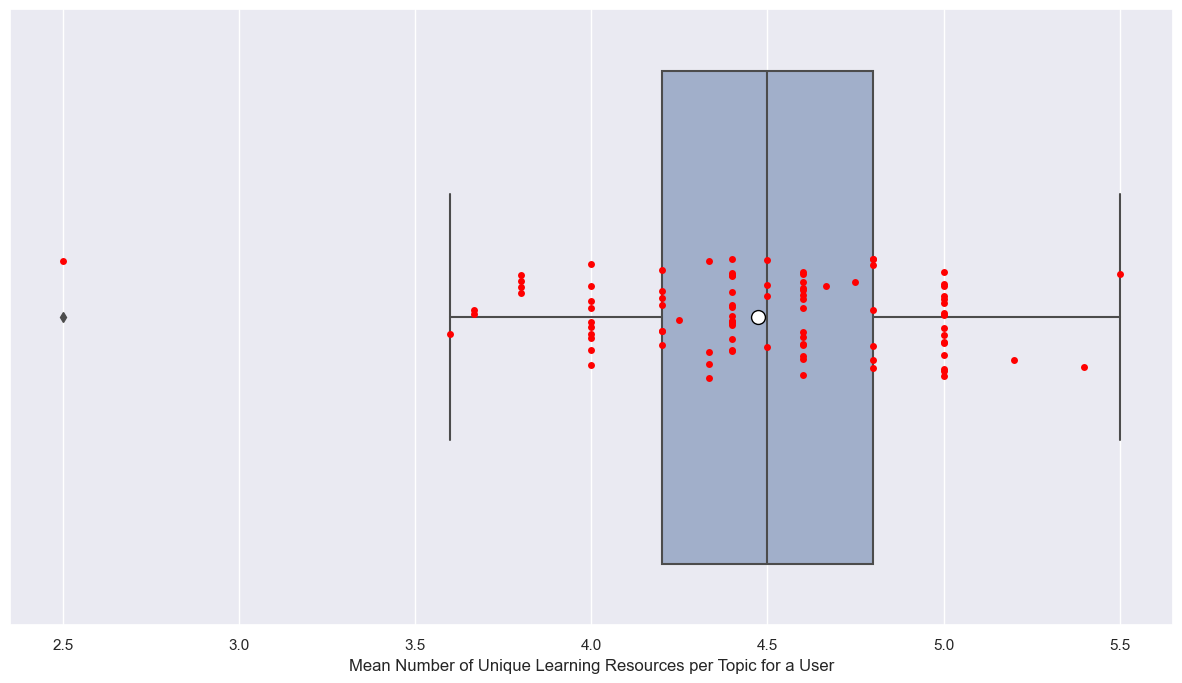

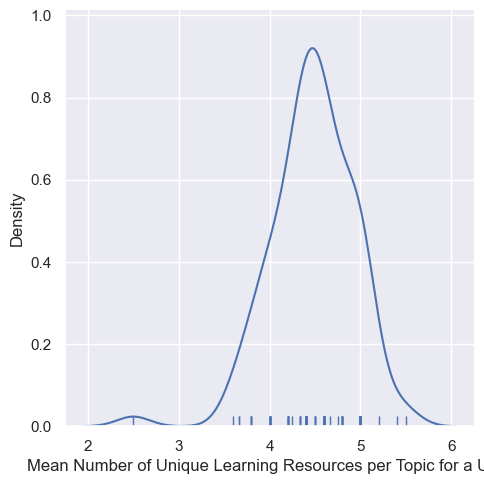

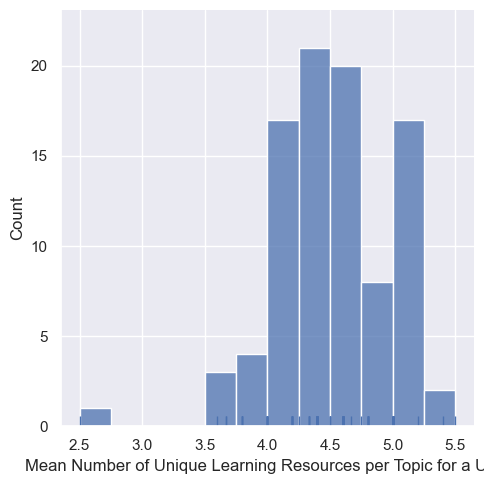



Median:


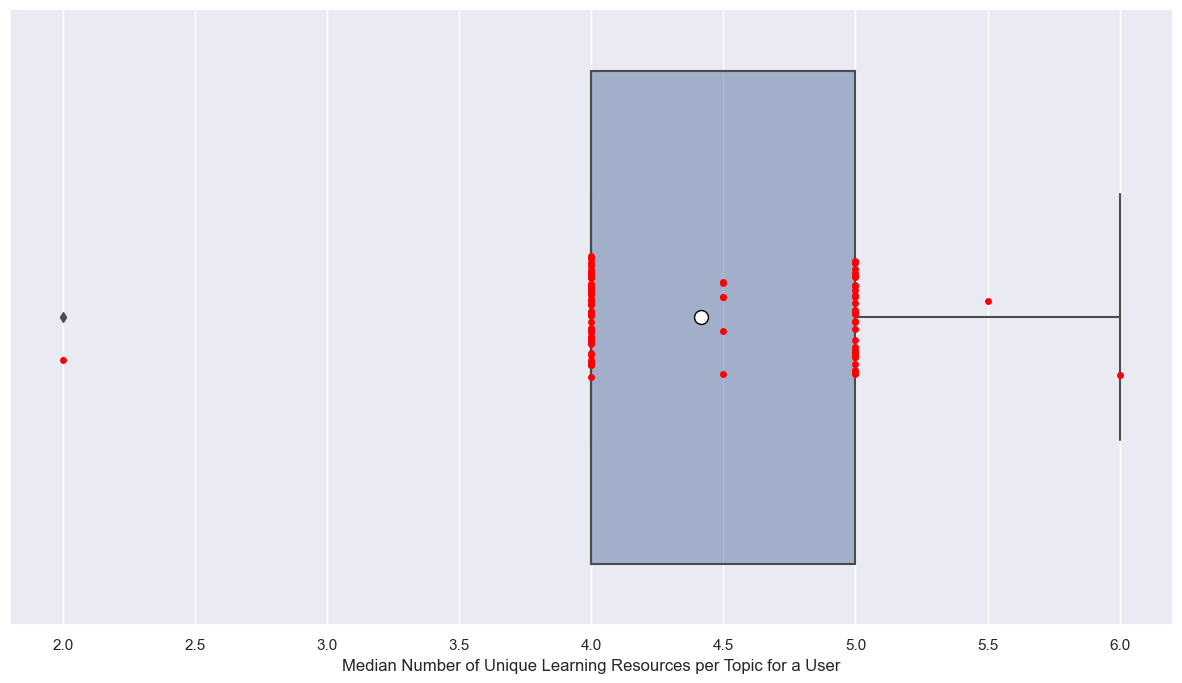

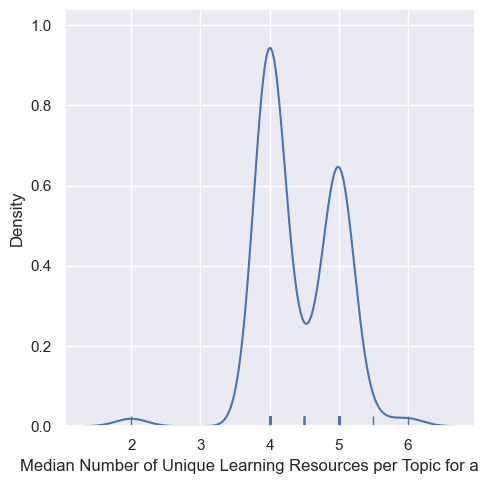

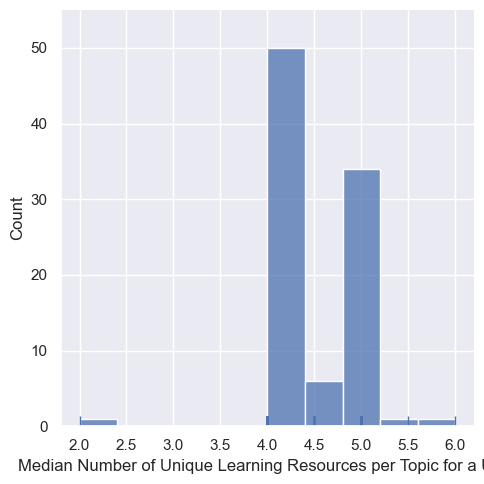

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Mean/Median Number of Unique Learning Resources per User for a Topic:
----------------------------------------------------------------------------------------------------
mean of Mean Number of Unique Learning Resources per User for a Topic: 4.4579116361595625
median of Mean Number of Unique Learning Resources per User for a Topic: 4.083333333333333
max of Mean Number of Unique Learning Resources per User for a Topic: 5.453333333333333
min of Mean Number of Unique Learning Resources per User for a Topic: 3.831168831168831

____________________________________________________________________________________________________

mean of Median Number of Unique Learning Resources per User for 

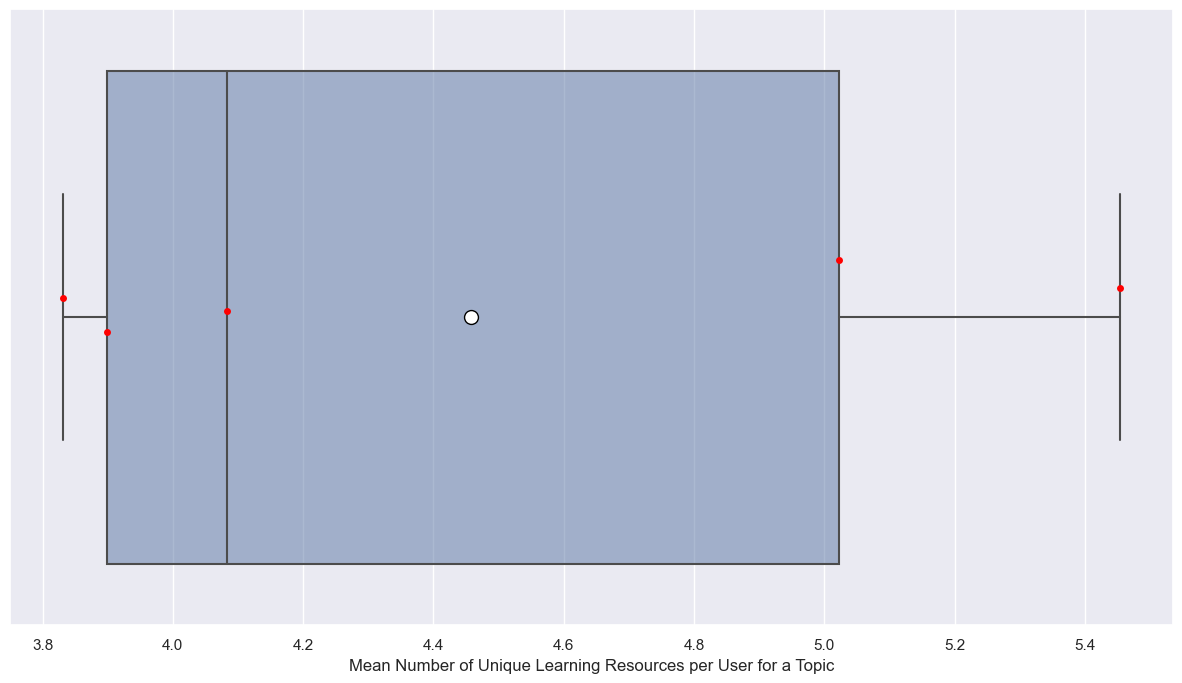

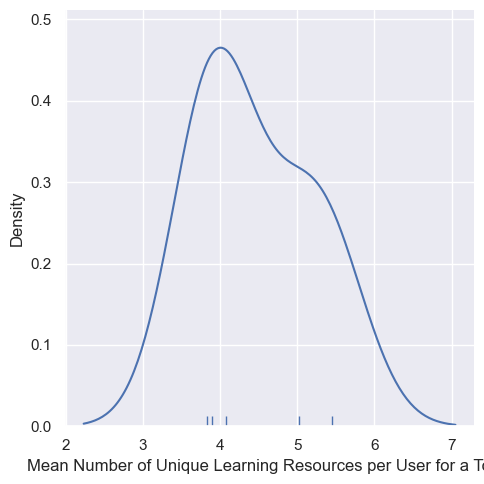

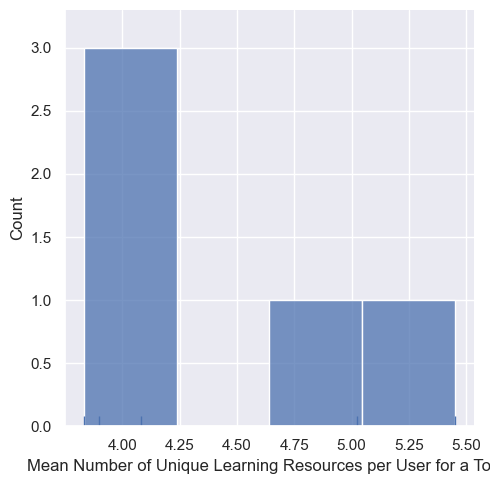



Median:


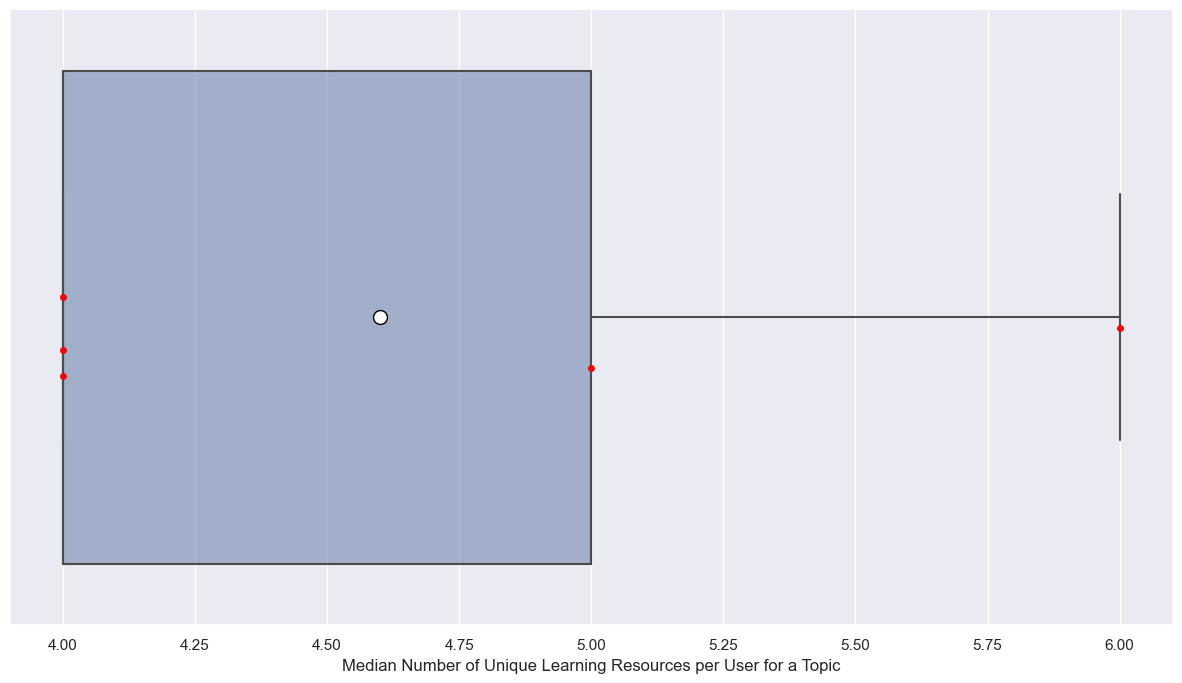

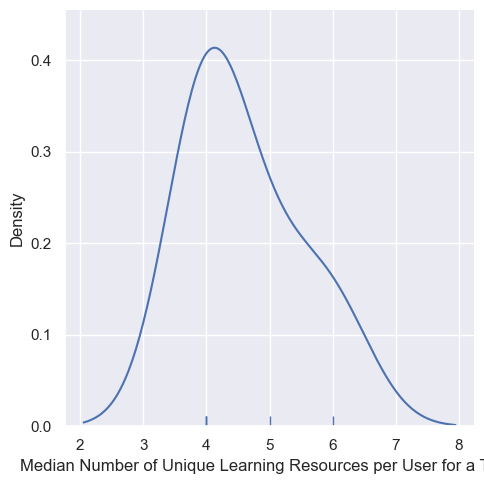

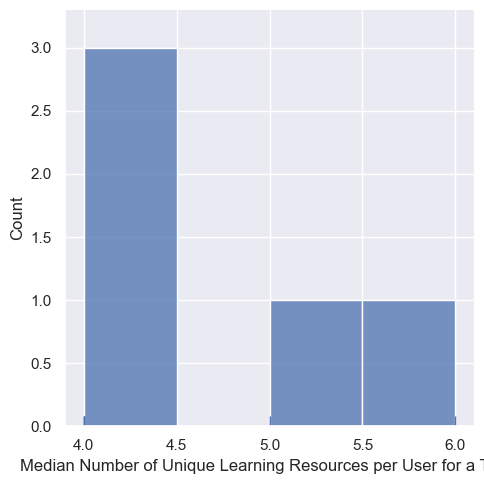

****************************************************************************************************
****************************************************************************************************
 


In [29]:
print_and_plot_group_user_learning_activity_relationship(interactions,
                                                         GROUP_FIELD,
                                                         False)

## Unique Sequence Statistics

In [30]:
learning_activity_sequence_stats_per_group = return_learning_activity_sequence_stats_over_user_per_group(interactions,
                                                                                                         DATASET_NAME,
                                                                                                         GROUP_FIELD_NAME_STR, 
                                                                                                         USER_FIELD_NAME_STR, 
                                                                                                         LEARNING_ACTIVITY_FIELD_NAME_STR,
                                                                                                         TIMESTAMP_FIELD_NAME_STR)

In [31]:
pickle_write(learning_activity_sequence_stats_per_group,
             PATH_TO_SEQUENCE_STATISTICS_PICKLE_FOLDER,
             DATASET_NAME + SEQUENCE_STATISTICS_TABLES_PICKLE_NAME)

### Unique Sequence Statistics

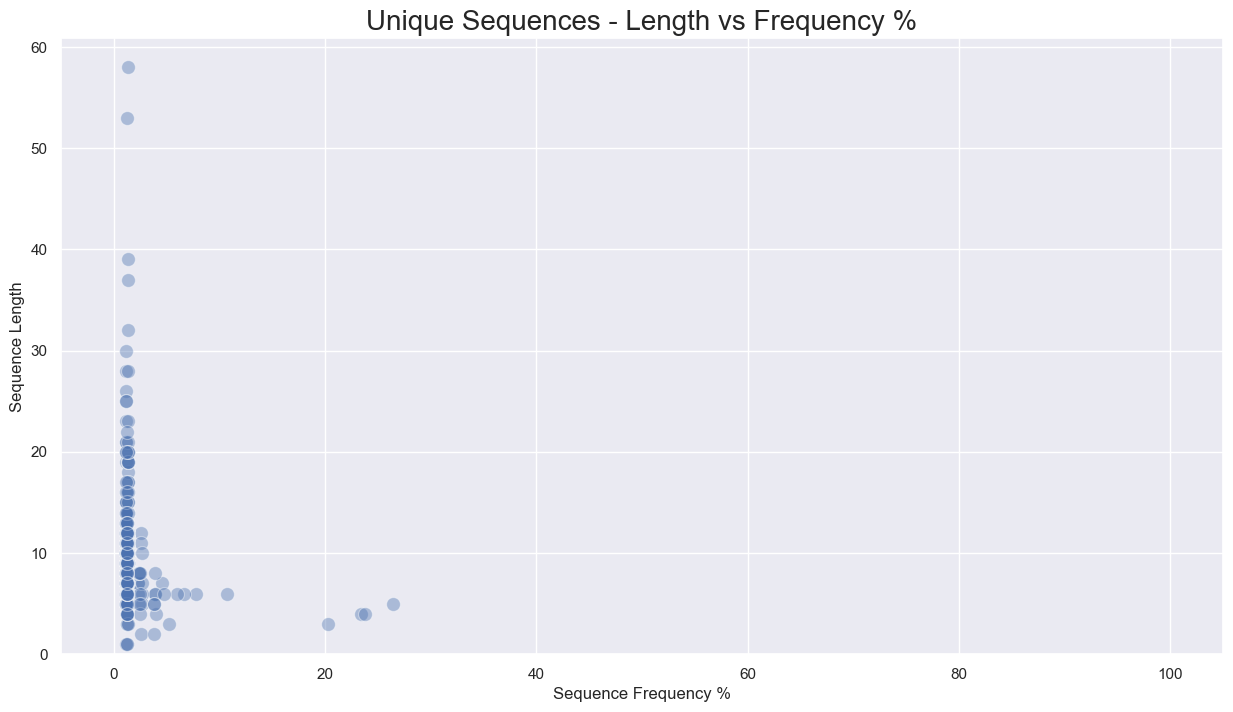

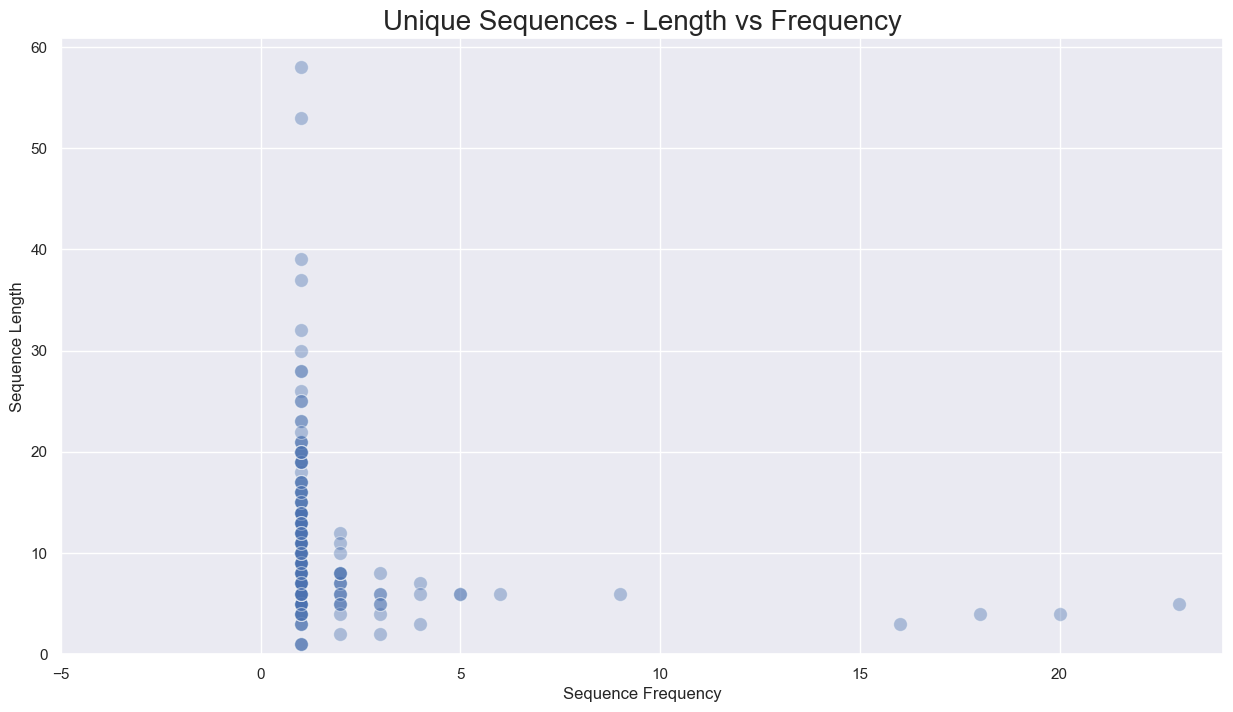

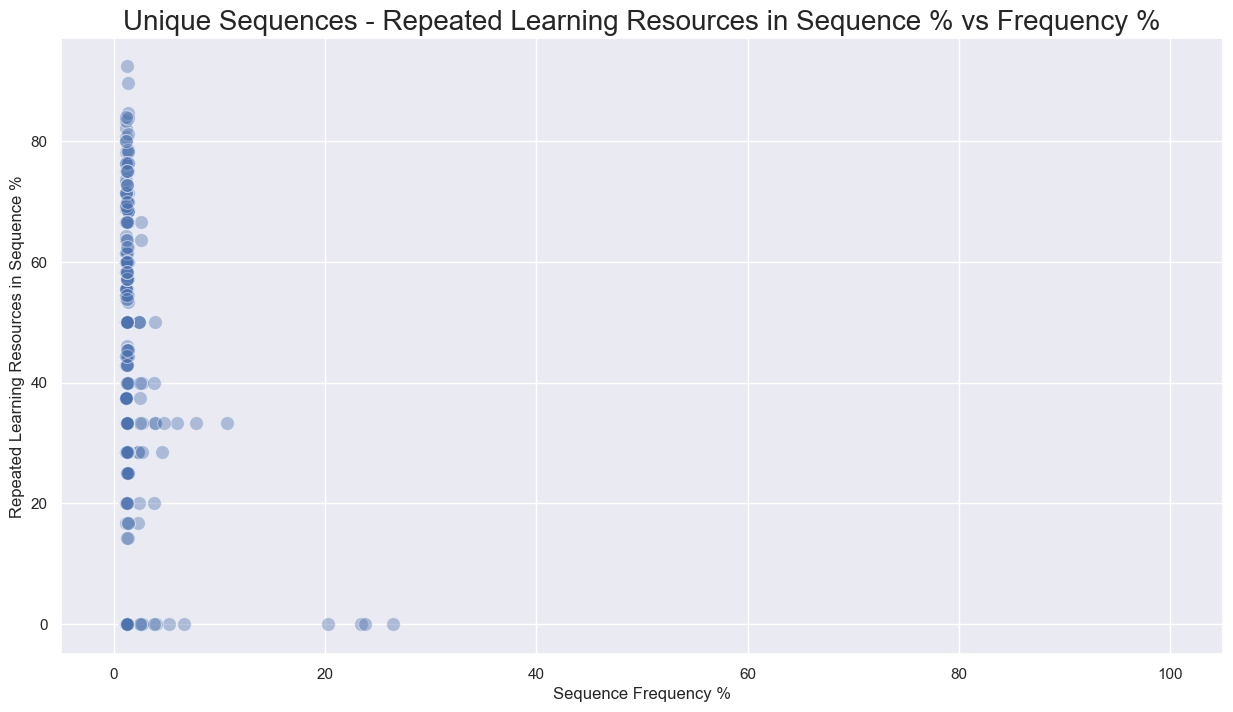

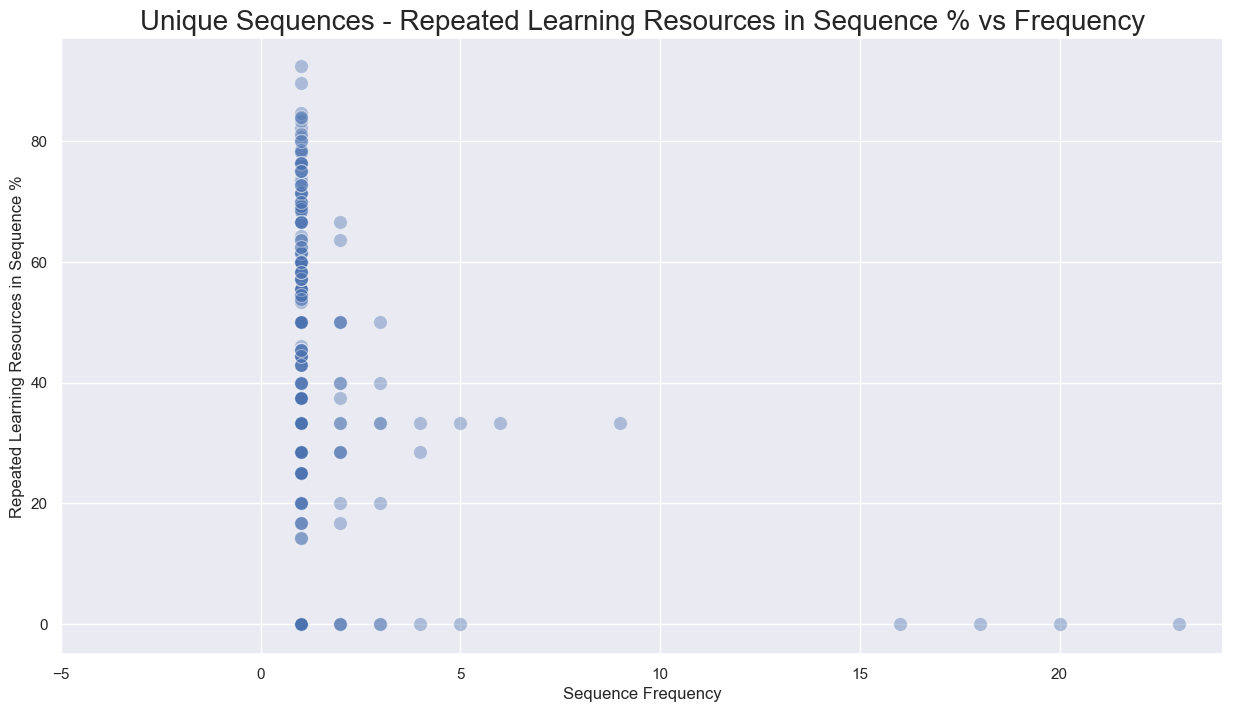

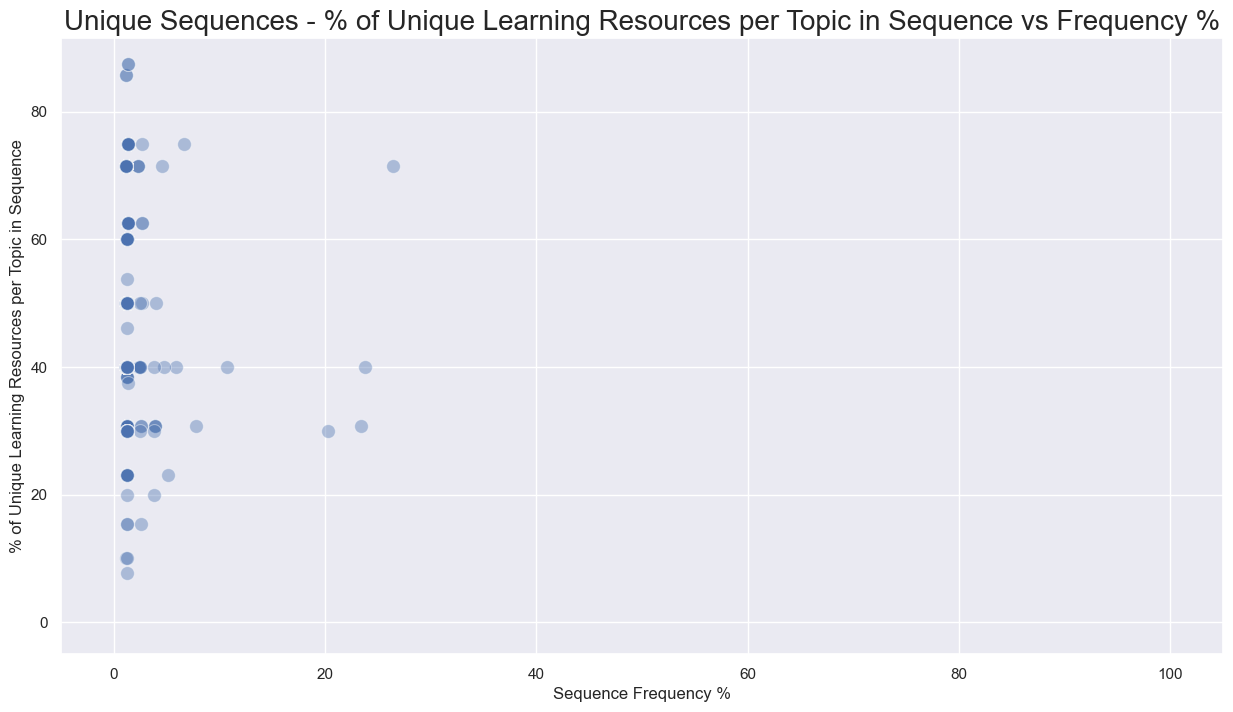

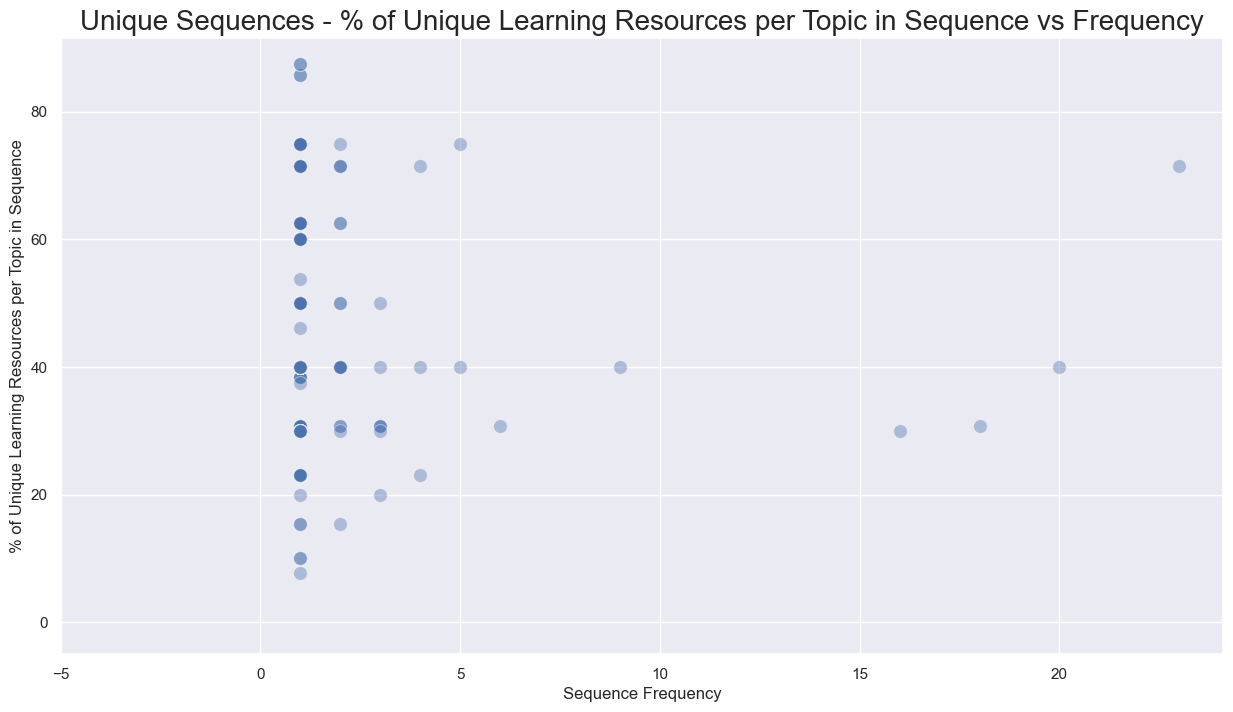

In [32]:
plot_sequence_stats(learning_activity_sequence_stats_per_group)

### Unique Sequence Statistics per Group

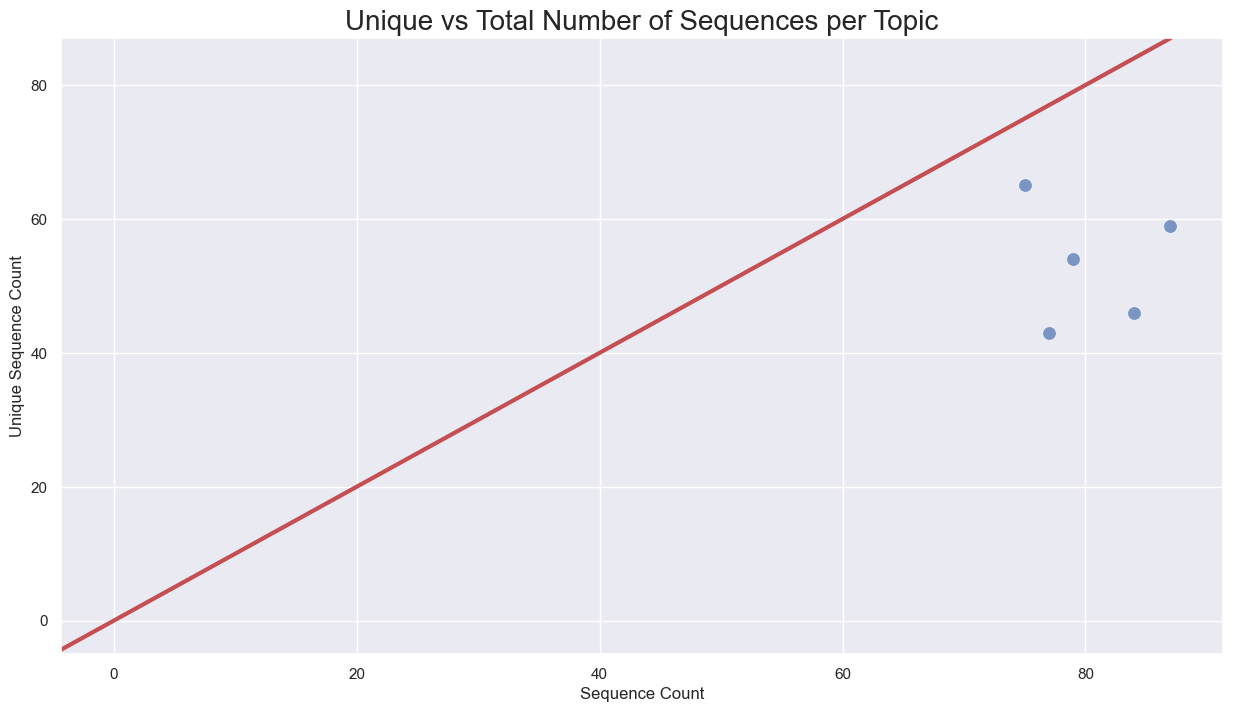

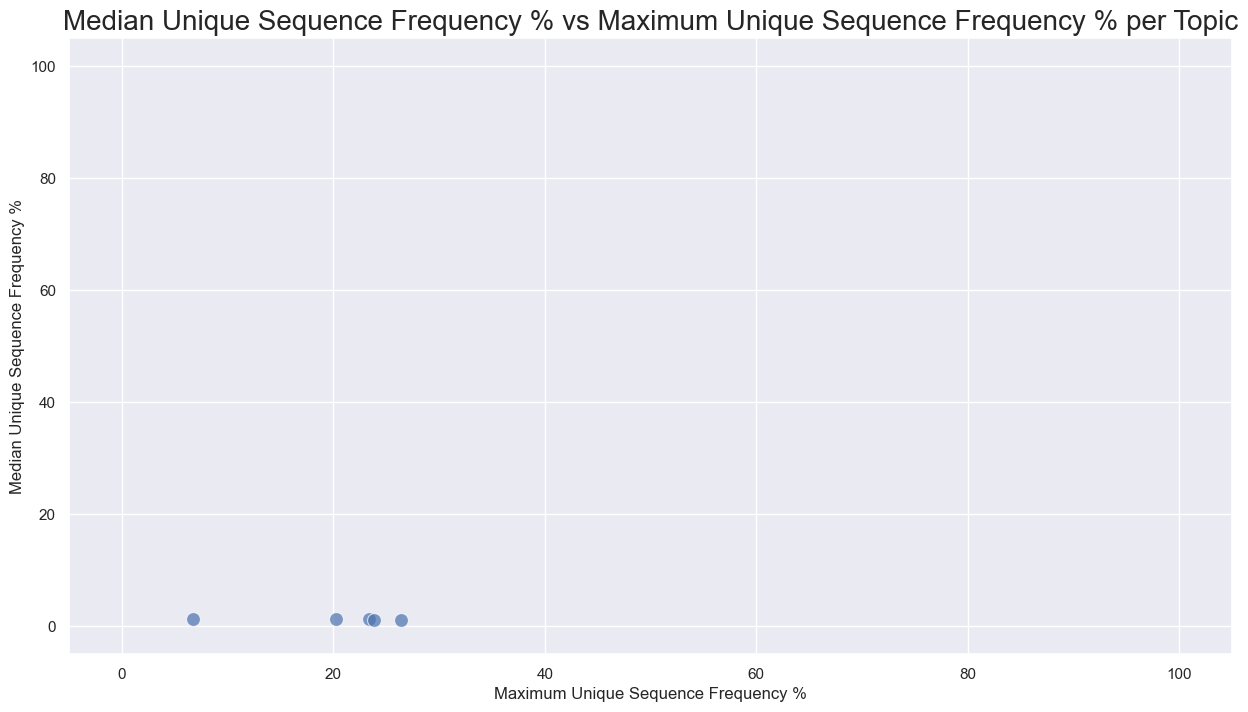

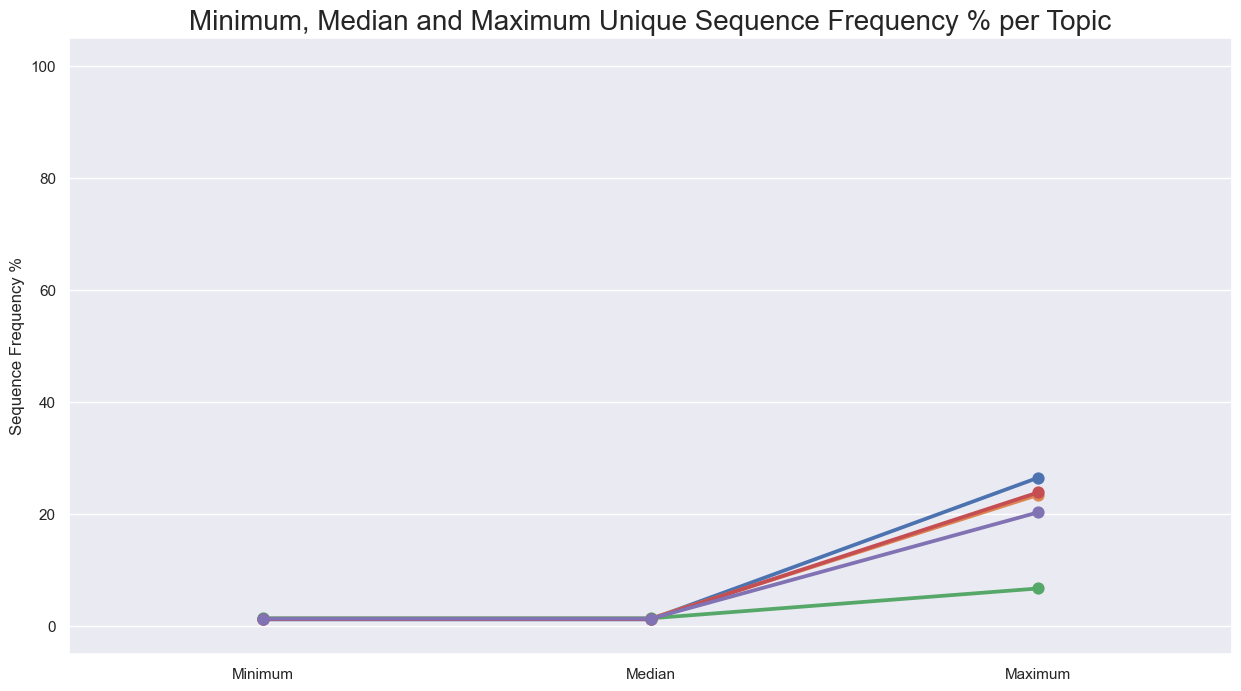

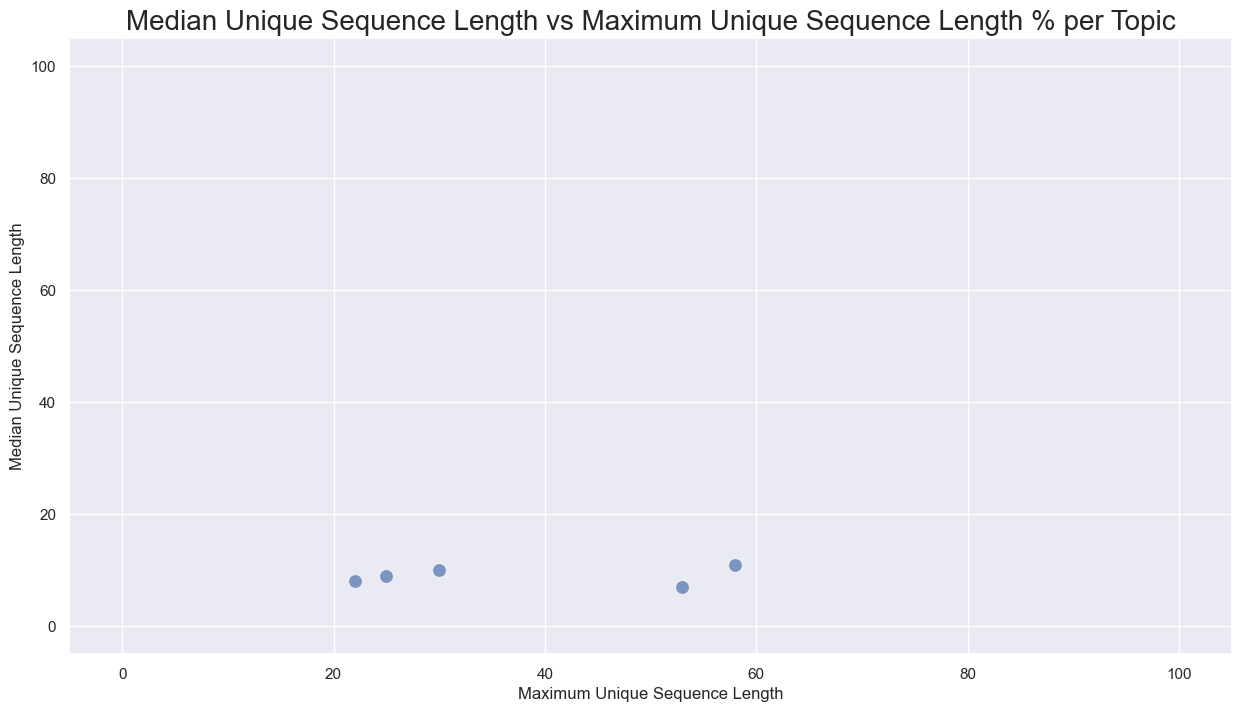

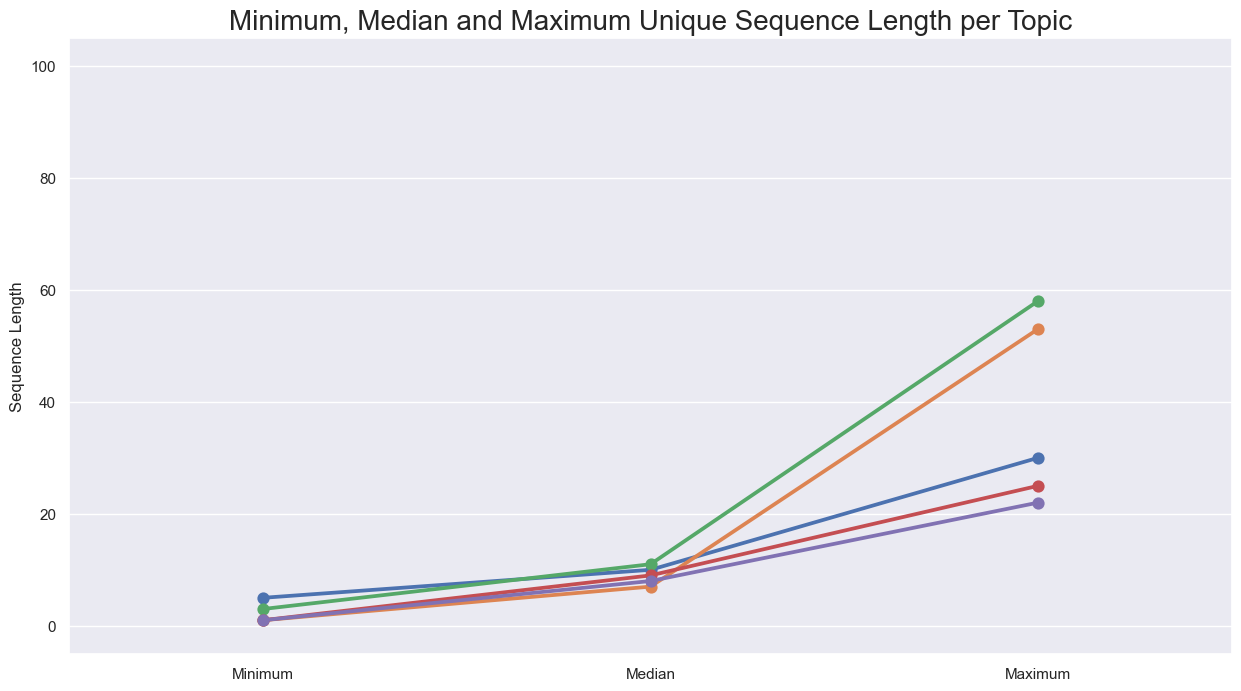

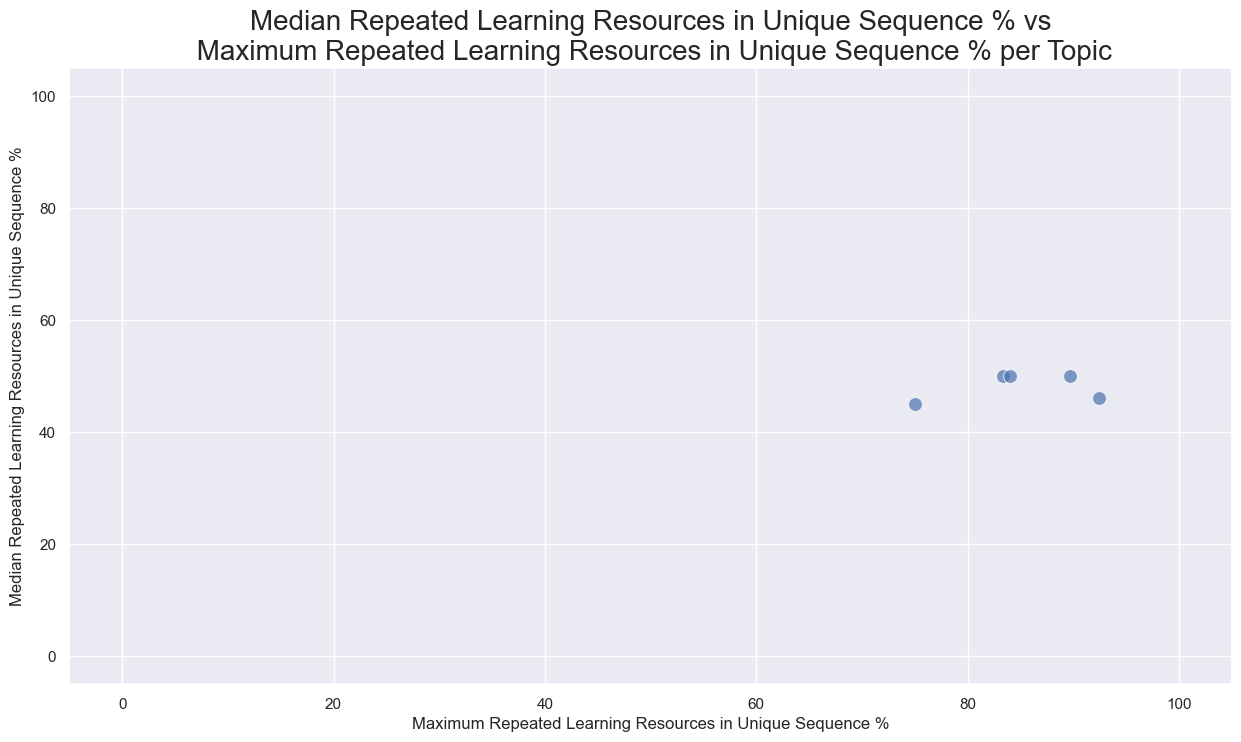

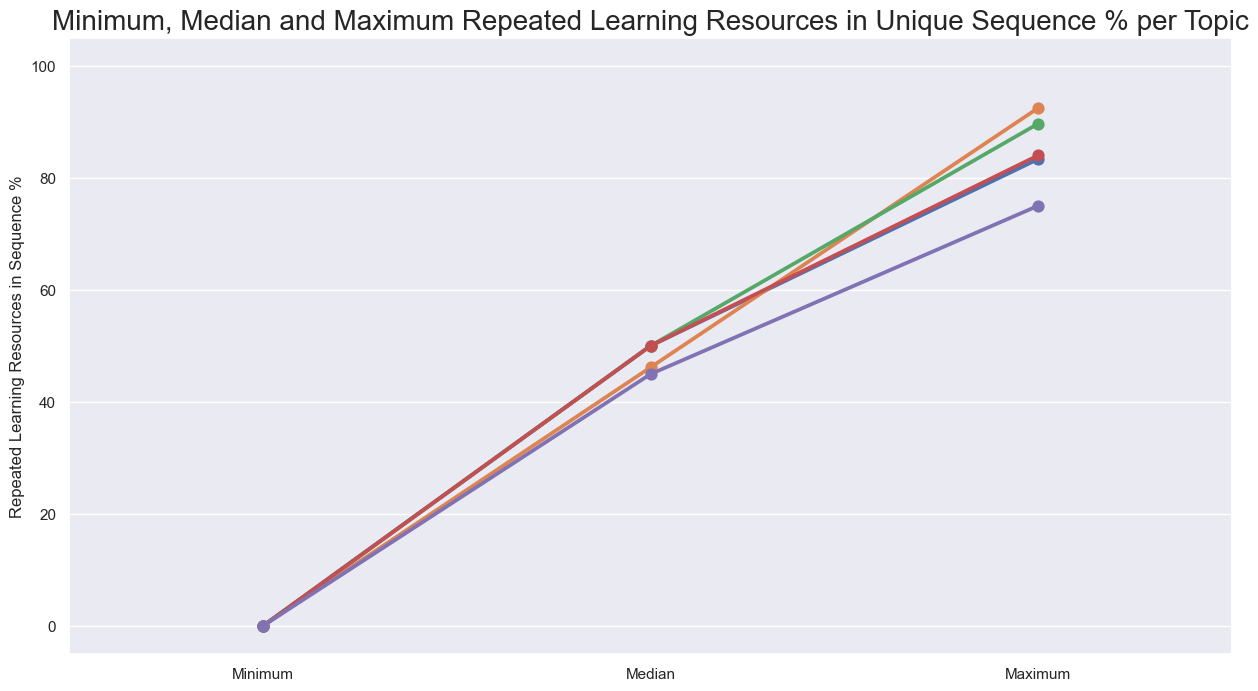

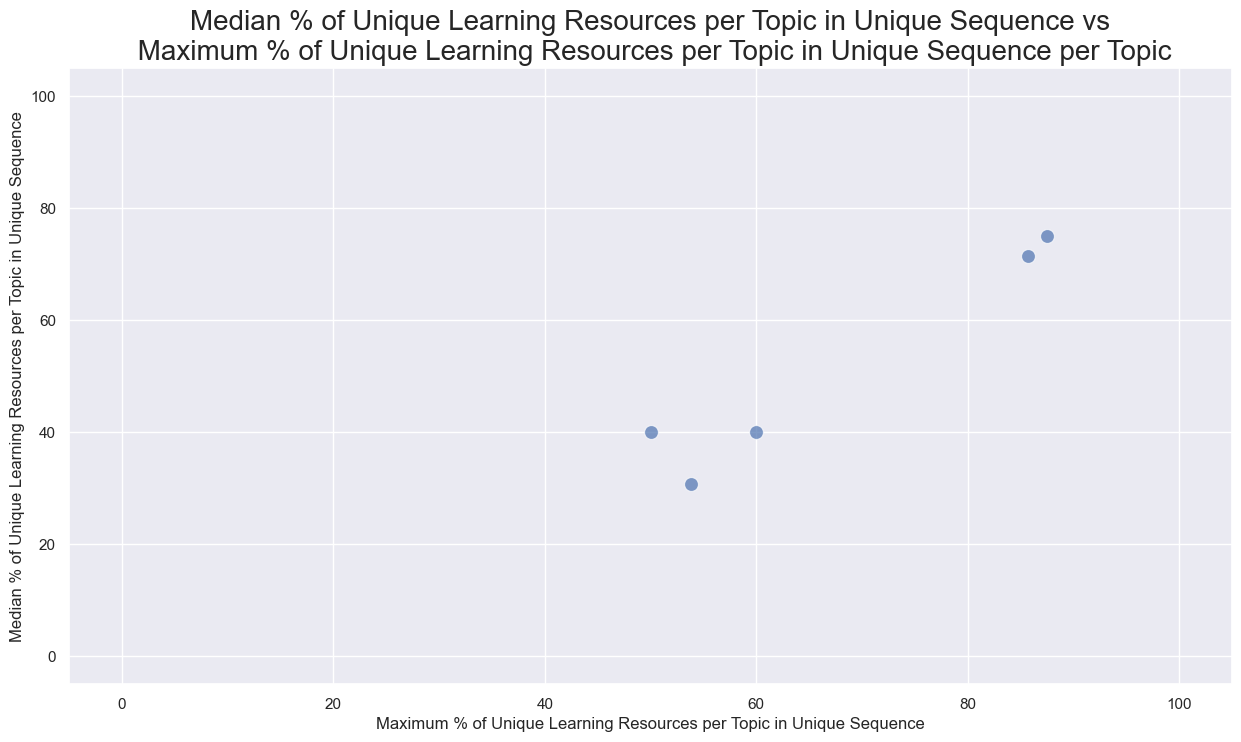

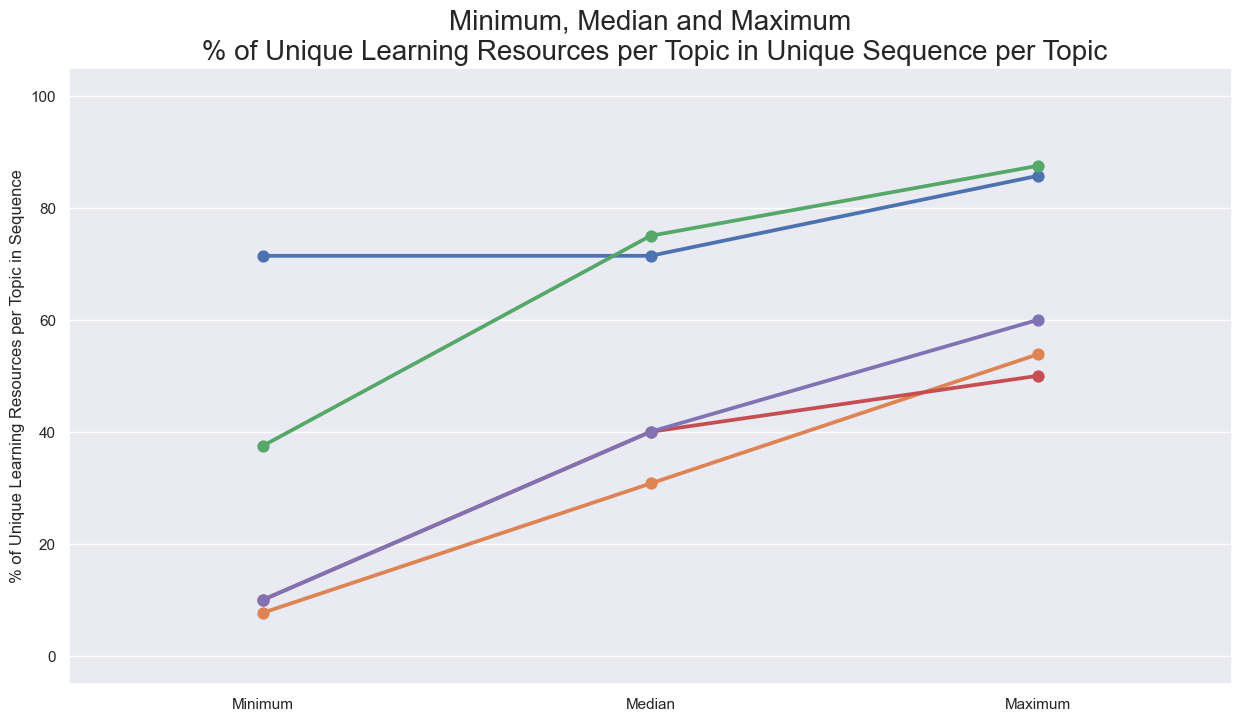

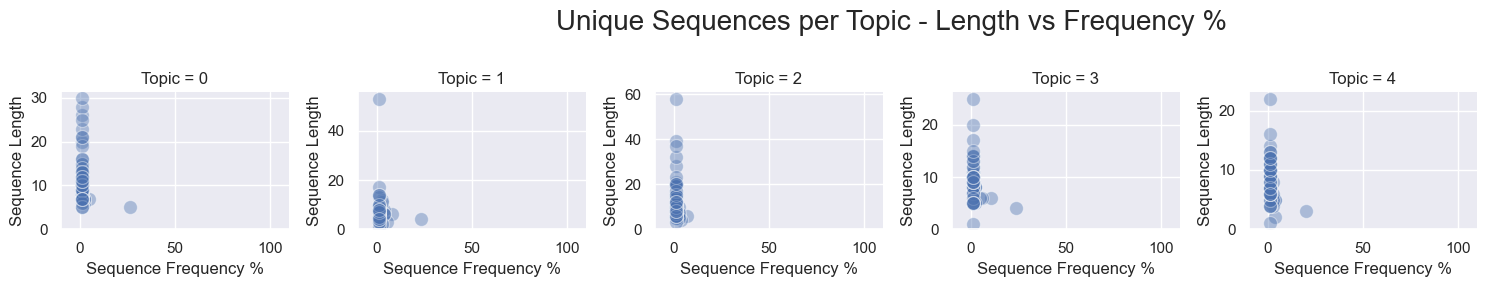

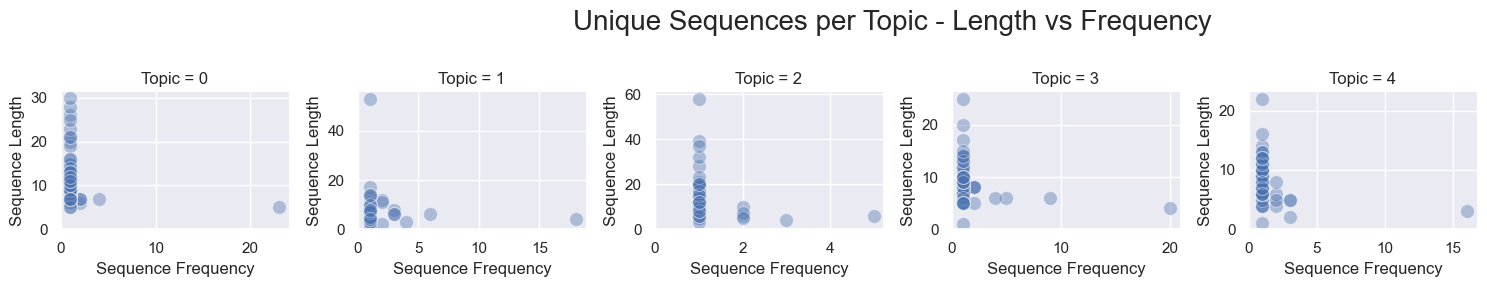

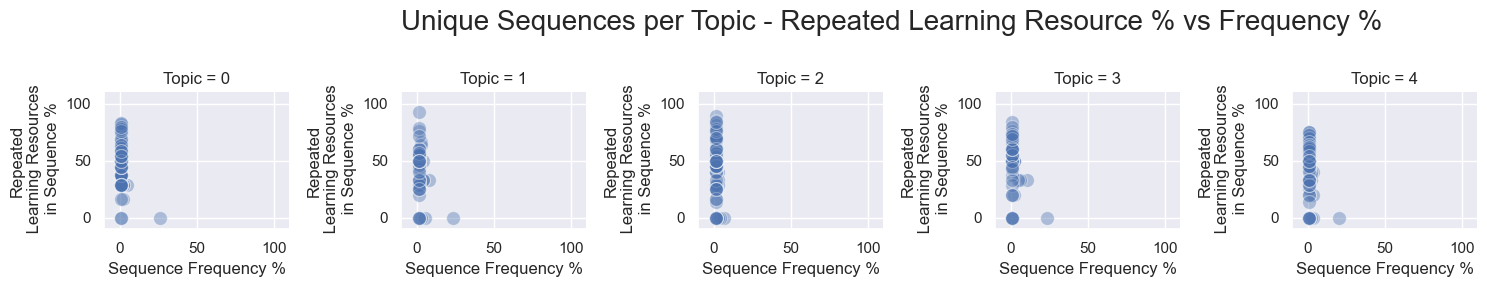

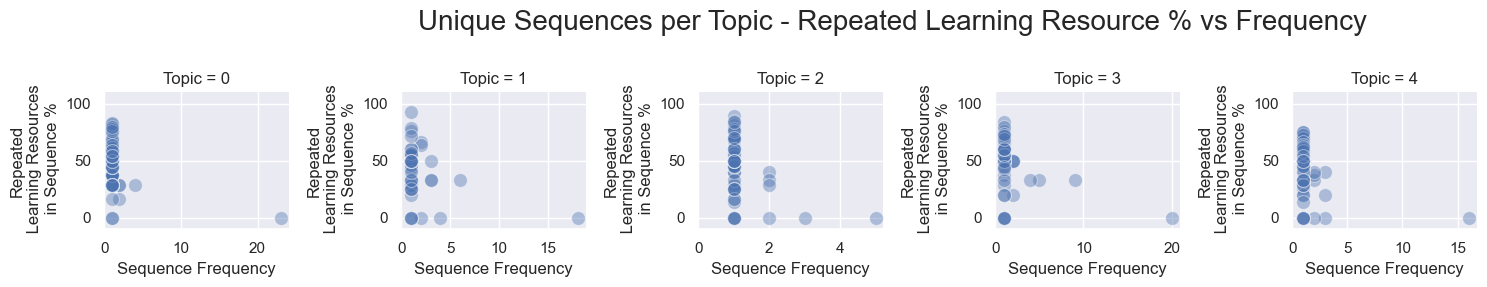

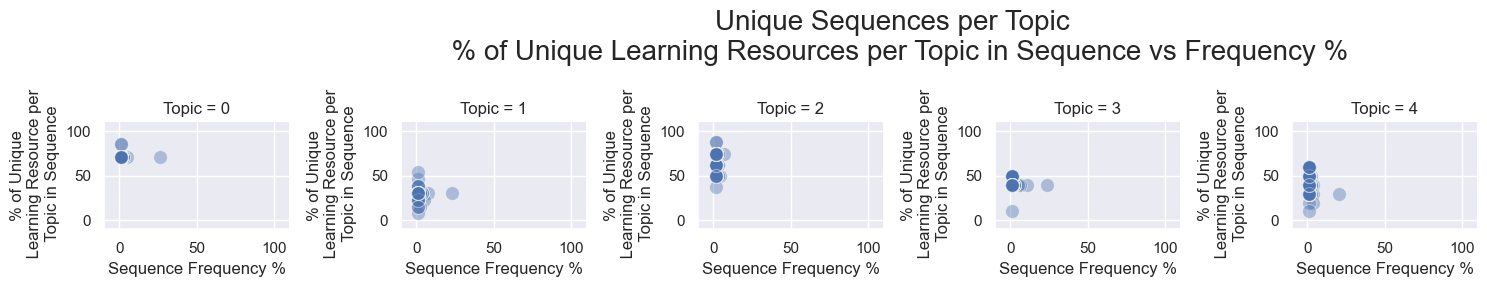

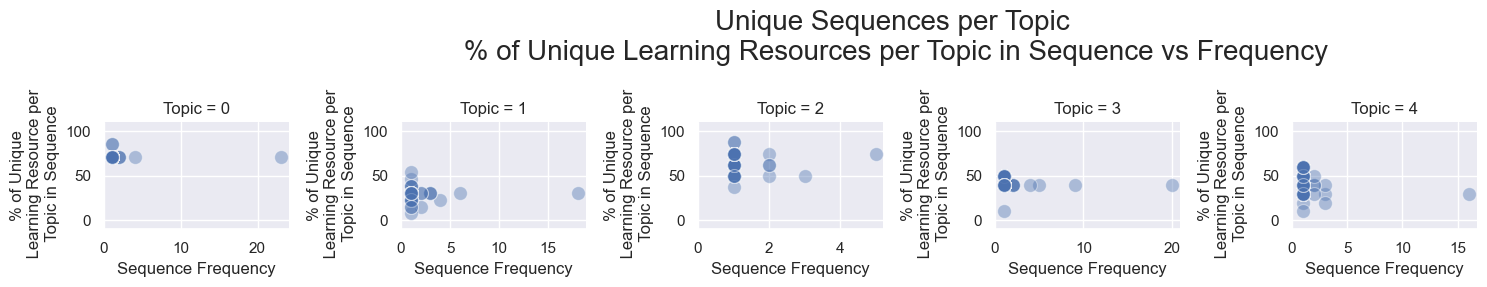

In [33]:
plot_sequence_stats_per_group(learning_activity_sequence_stats_per_group,
                              GROUP_FIELD_NAME_STR)

## Sequence Distance

In [34]:
seq_distances = calculate_sequence_distances(interactions, 
                                             USER_FIELD_NAME_STR, 
                                             GROUP_FIELD_NAME_STR, 
                                             LEARNING_ACTIVITY_FIELD_NAME_STR, 
                                             SEQUENCE_ID_FIELD_NAME_STR)

--------------------
Topic-Field Available:
Calulate Sequence Distances for each Topic
--------------------
--------------------------------------------------
Total number of Topic: 5
--------------------------------------------------
--------------------------------------------------
Final number of Topics: 5
Final number of Users: 93
Final number of interactions: 3487
--------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 191.24it/s]

--------------------------------------------------
Duration in seconds: 0.02889227867126465
--------------------------------------------------


In [35]:
pickle_write(seq_distances,
             PATH_TO_SEQUENCE_DISTANCES_PICKLE_FOLDER,
             DATASET_NAME + SEQUENCE_DISTANCE_DICT_PER_GROUP_PICKLE_NAME)

100%|██████████| 5/5 [00:00<00:00, 4409.49it/s]

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Sequence Distance per Topic:
Base: All User-Sequence Combinations
----------------------------------------------------------------------------------------------------


Plots:


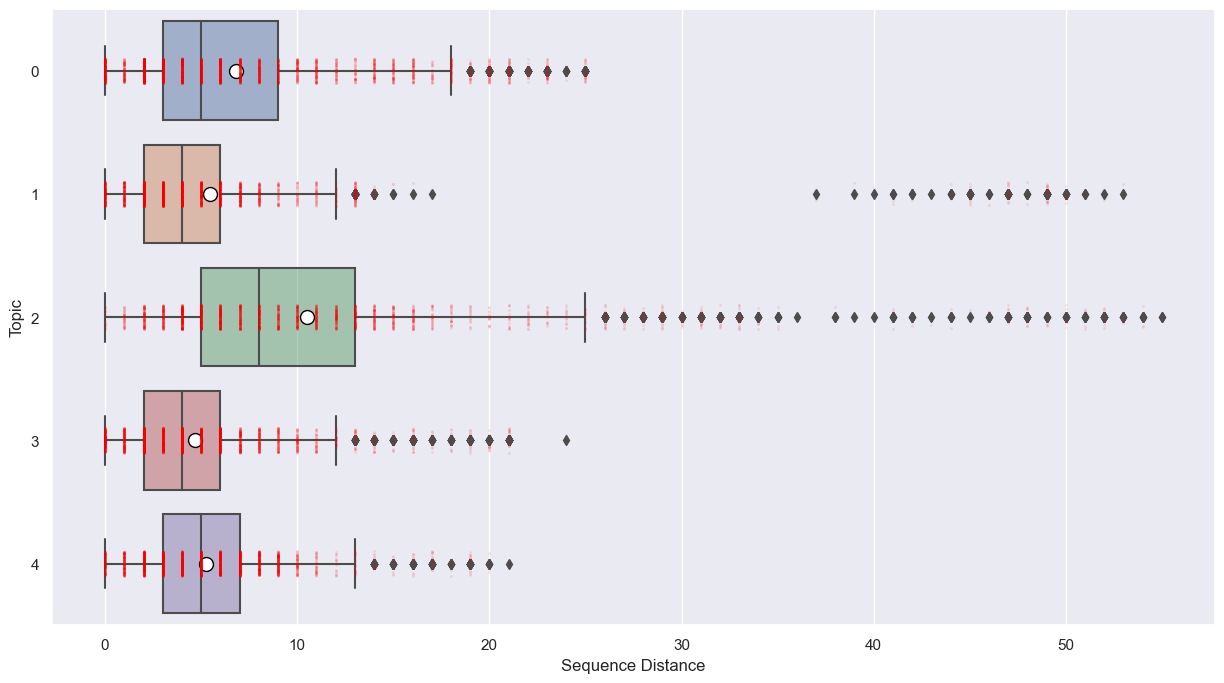

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Normalized Sequence Distance per Topic:
Base: All User-Sequence Combinations
----------------------------------------------------------------------------------------------------


Plots:


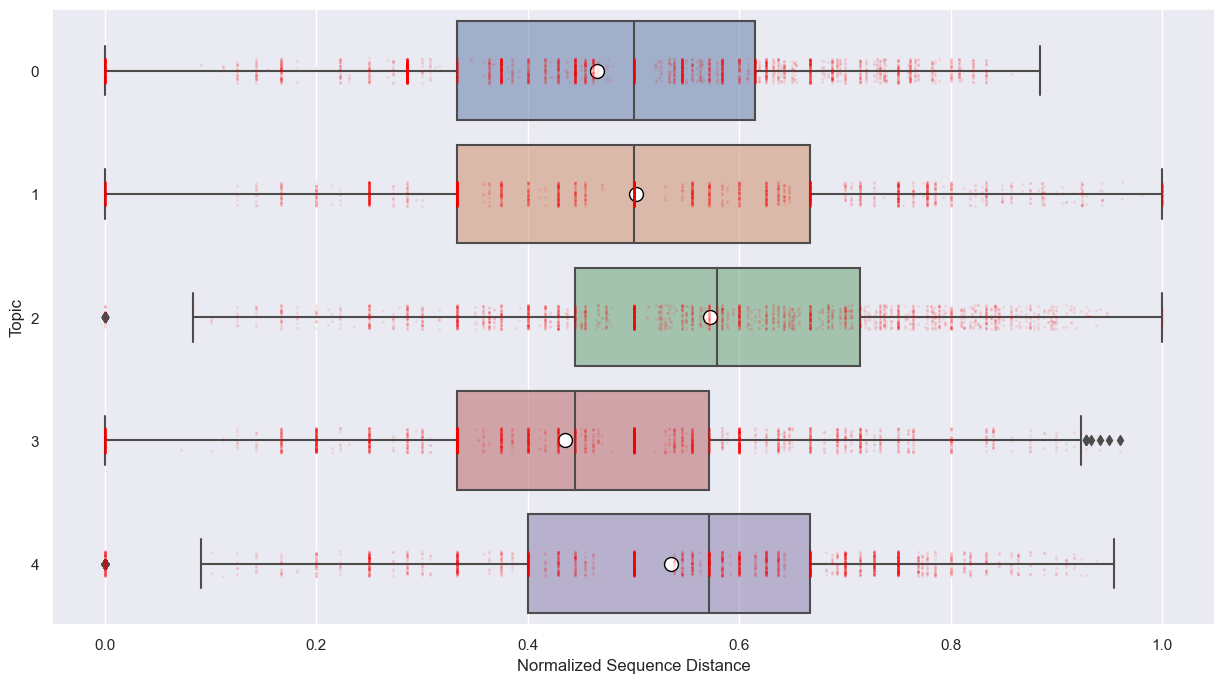

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Mean Sequence Distance per Topic:
----------------------------------------------------------------------------------------------------


Plots:


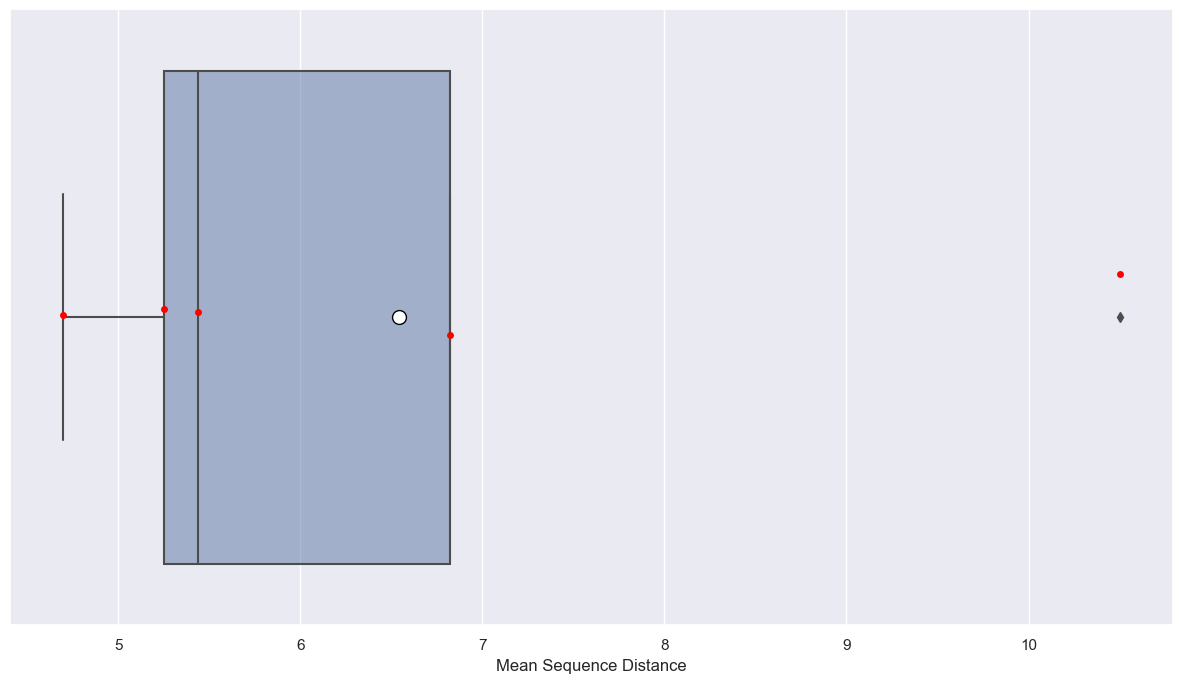

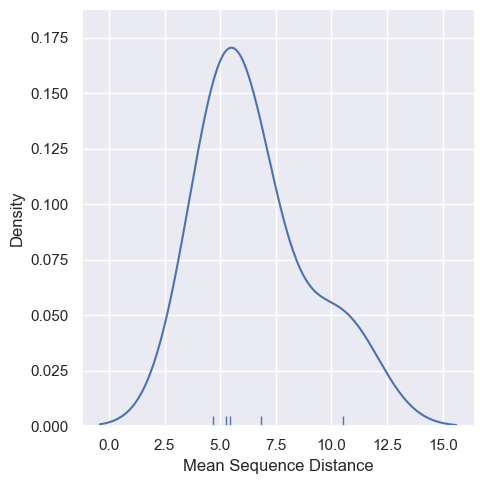

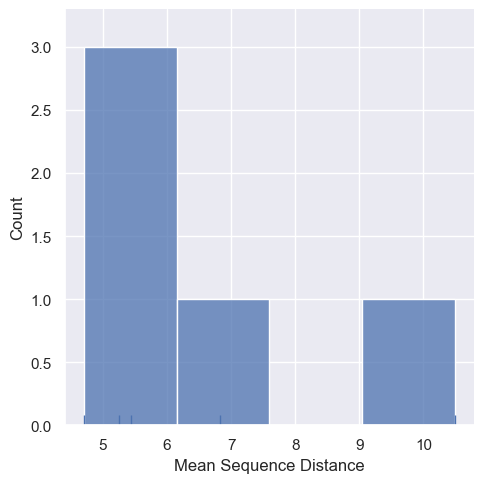

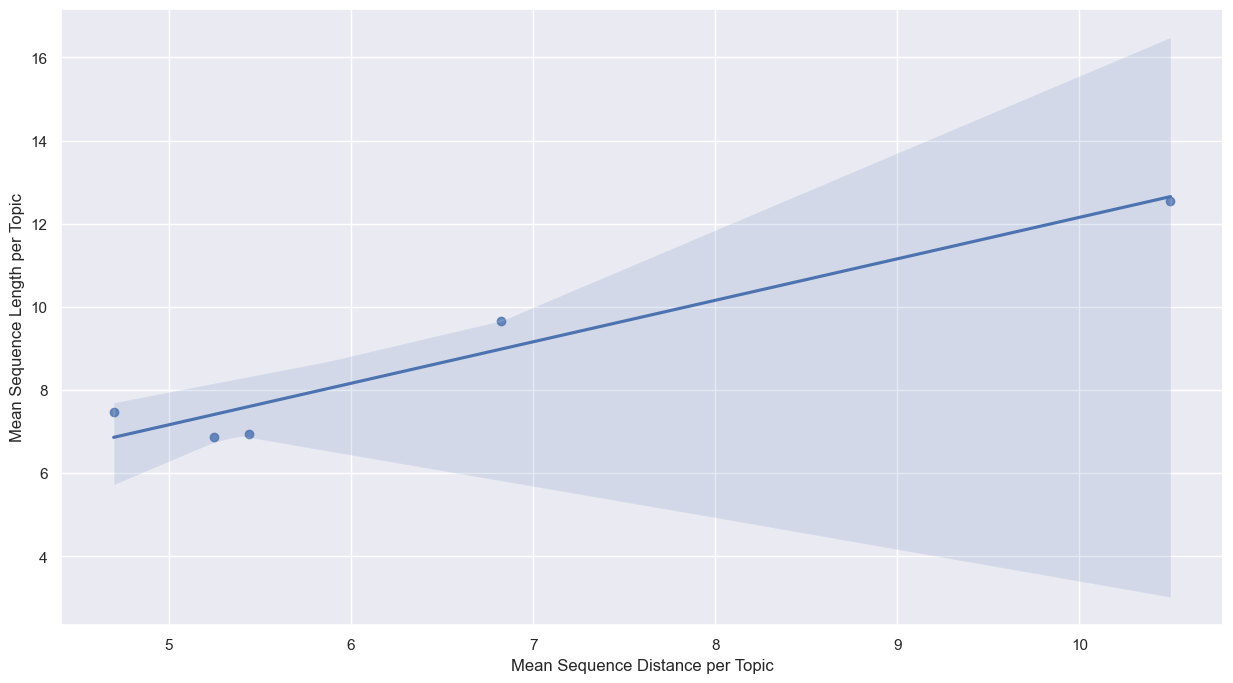

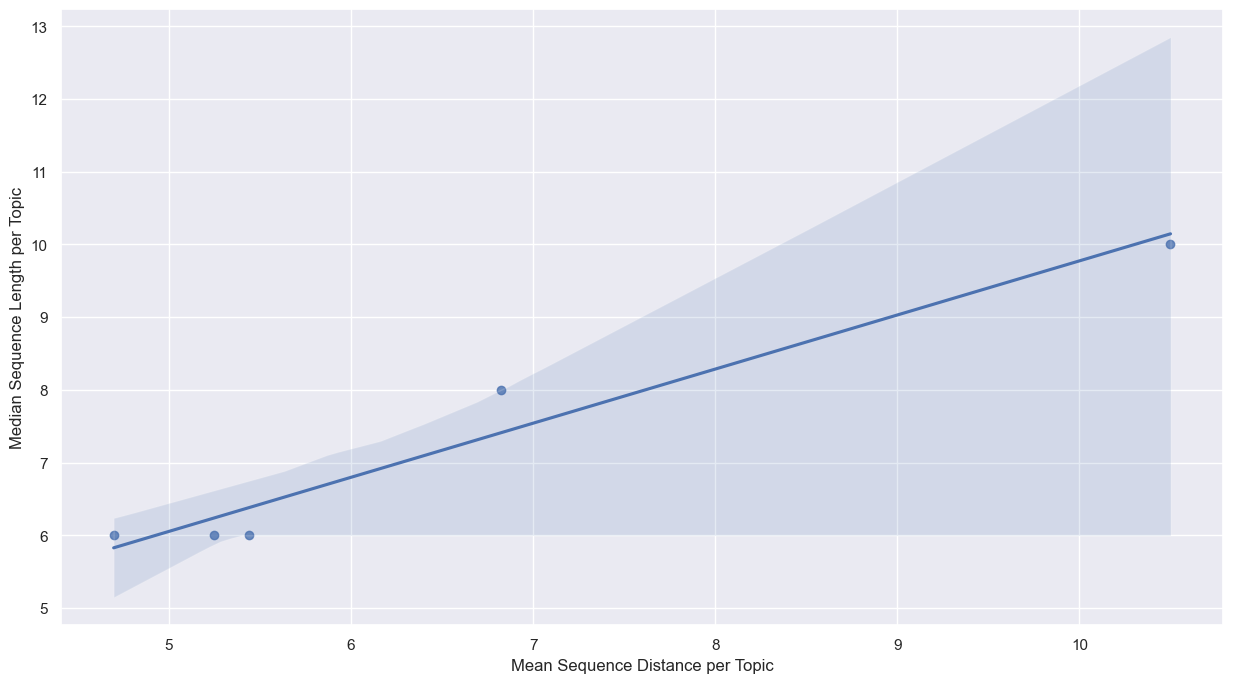

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Median Sequence Distance per Topic:
----------------------------------------------------------------------------------------------------


Plots:


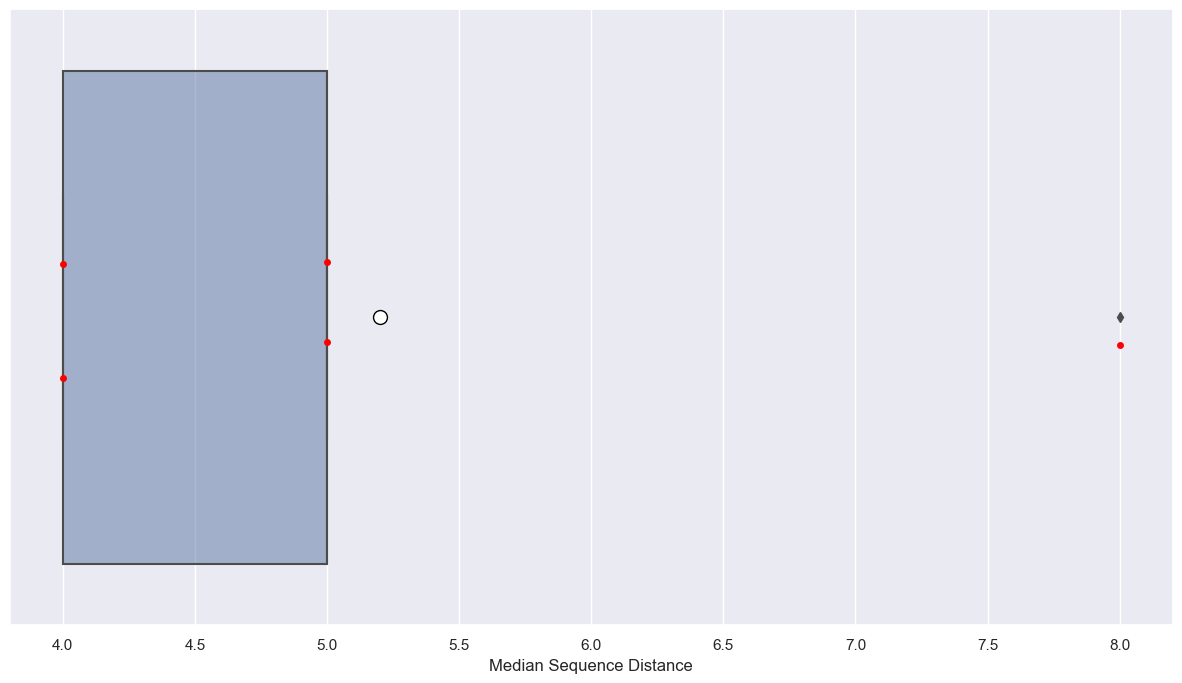

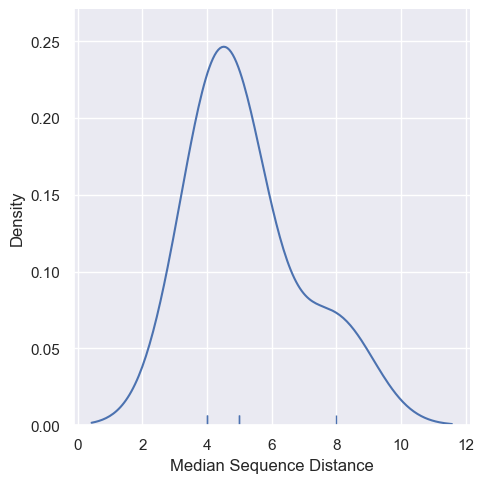

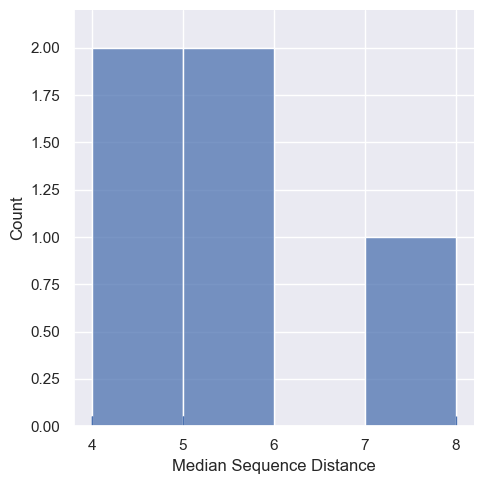

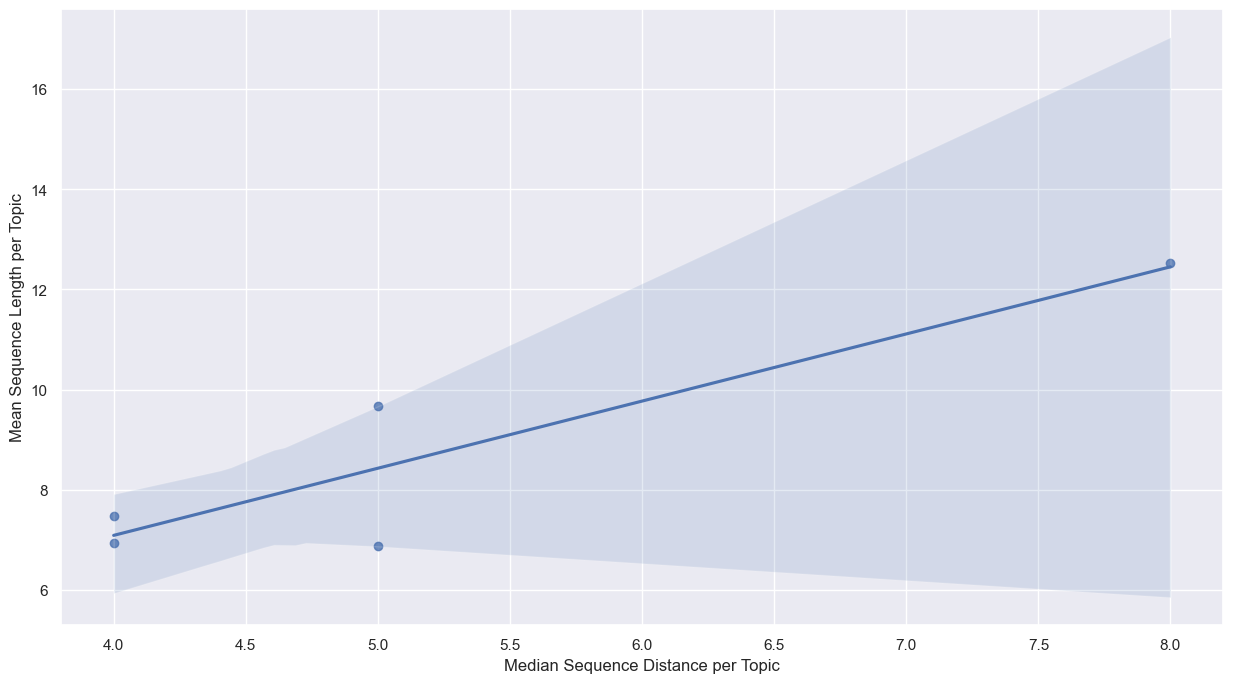

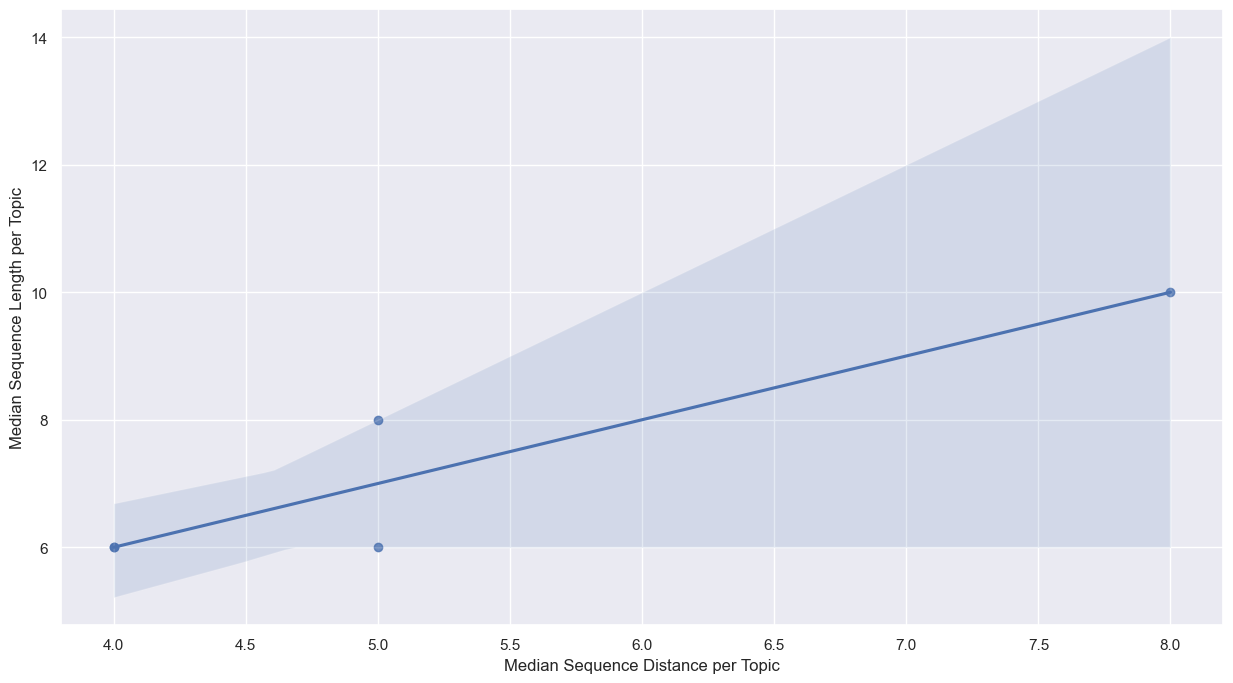

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Mean Normalized Sequence Distance per Topic:
----------------------------------------------------------------------------------------------------


Plots:


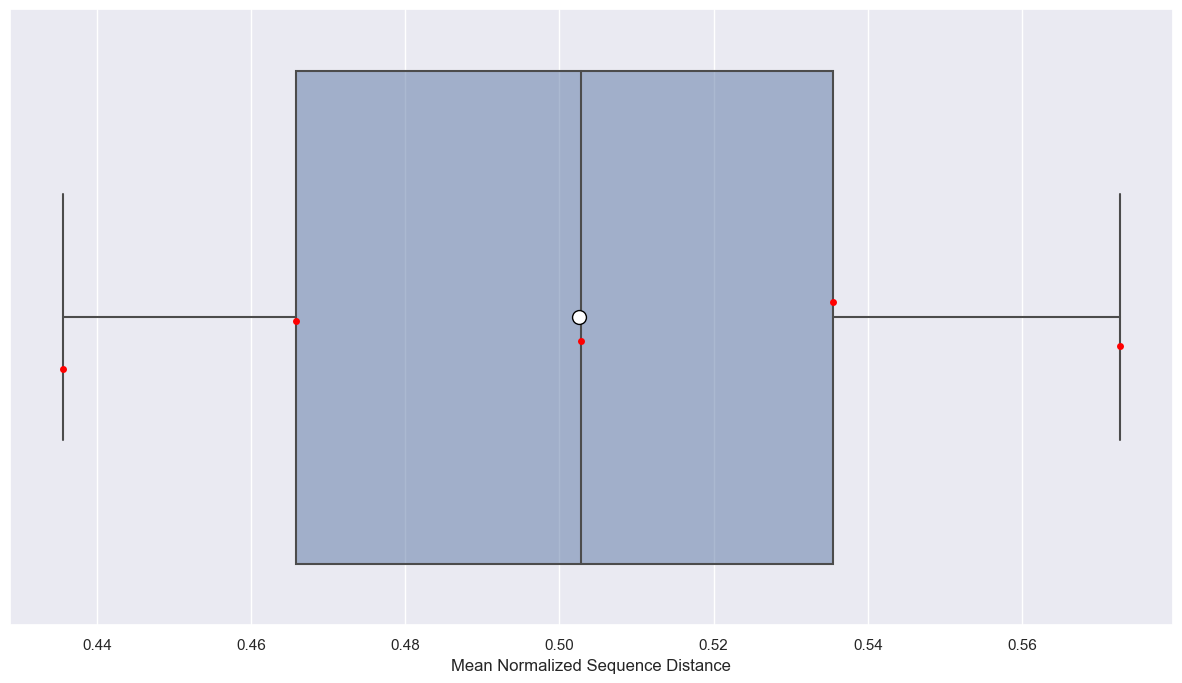

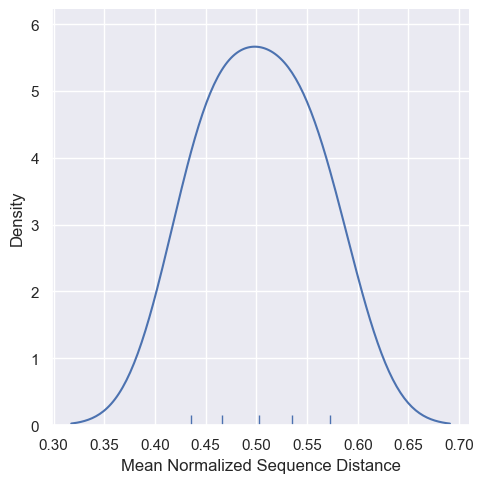

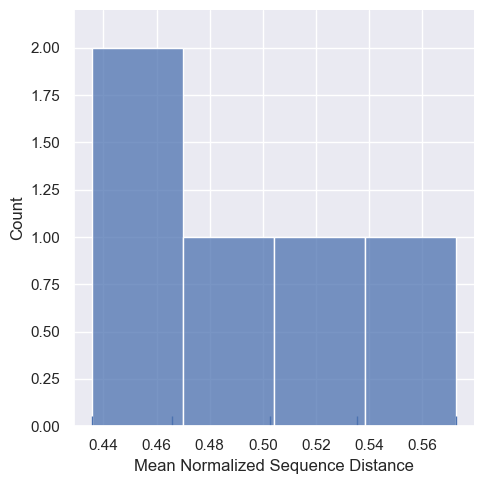

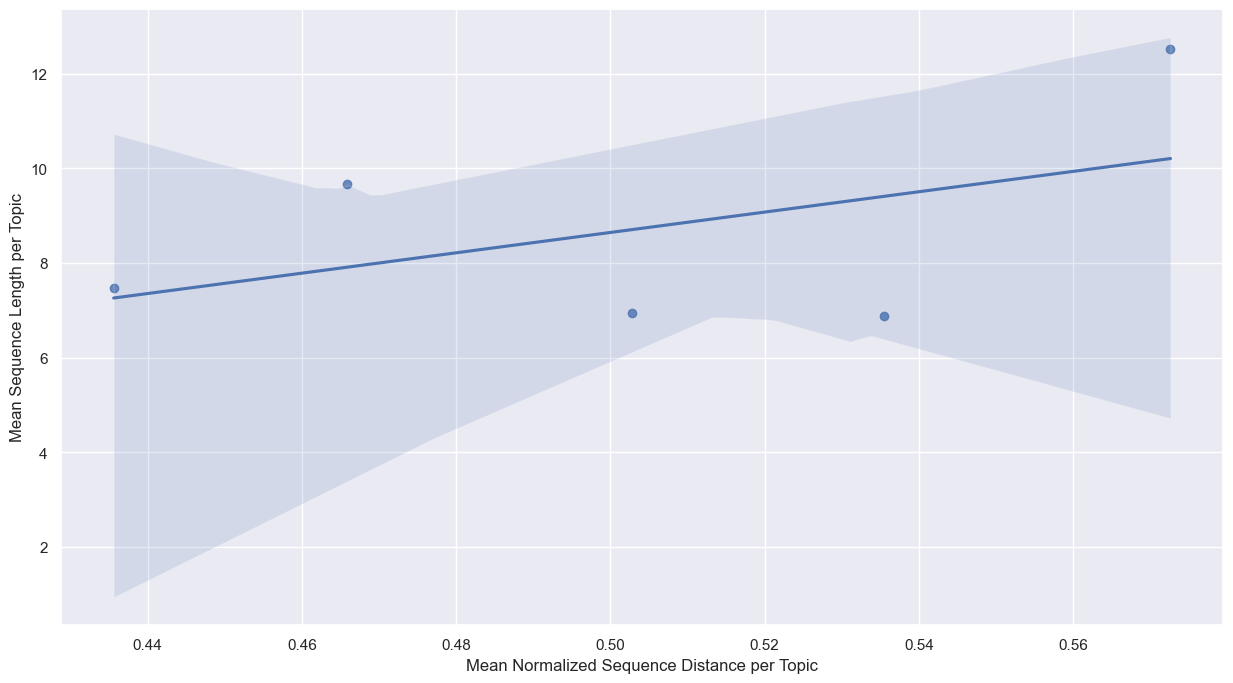

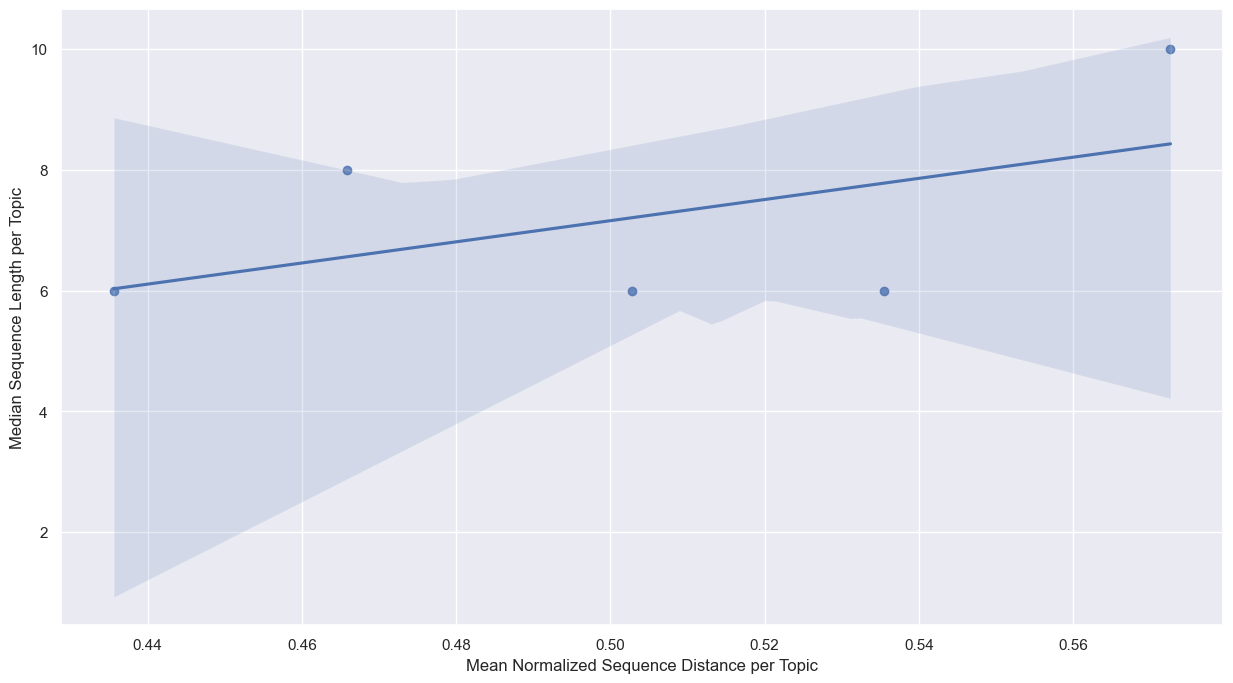

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Median Normalized Sequence Distance per Topic:
----------------------------------------------------------------------------------------------------


Plots:


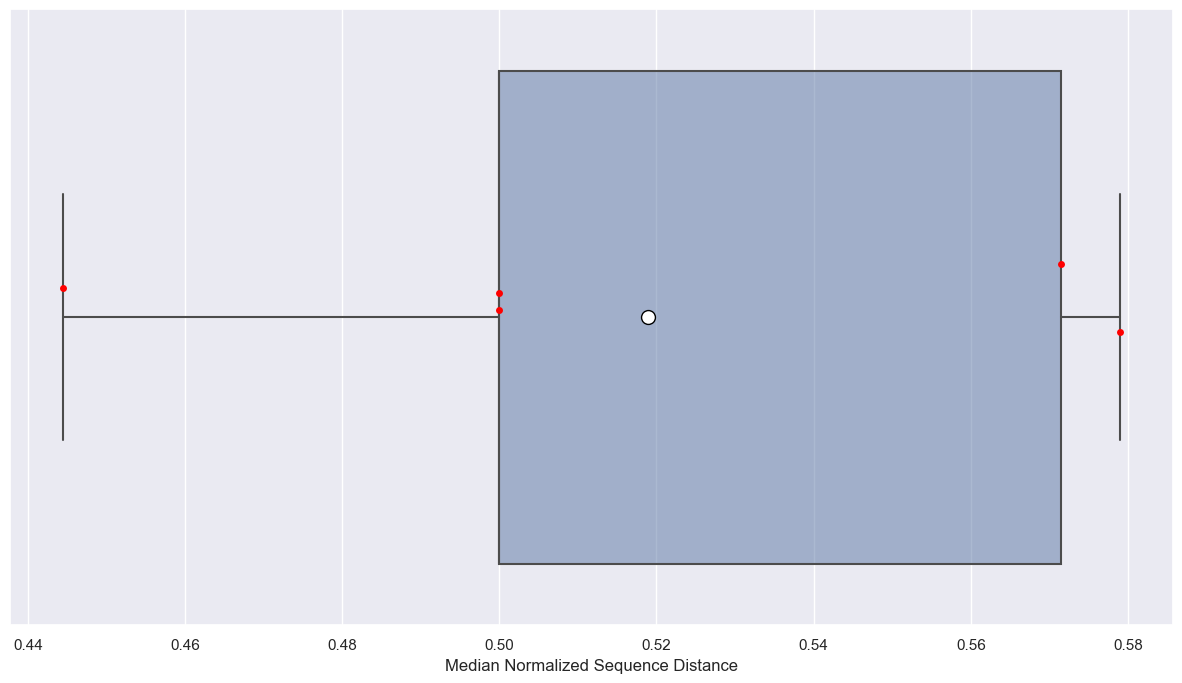

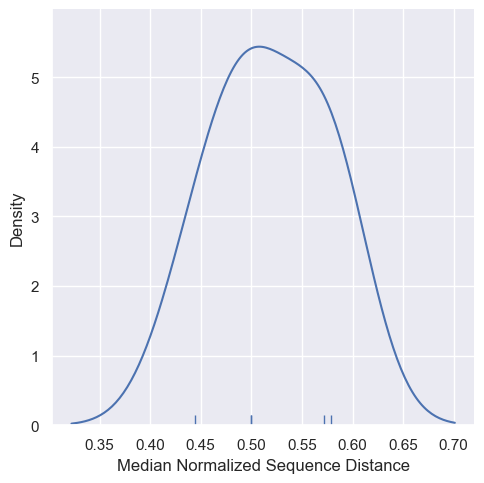

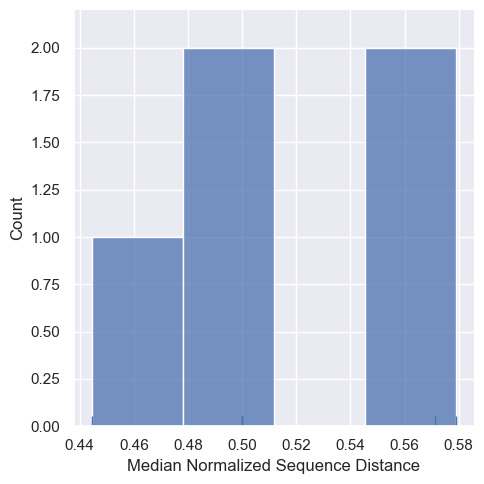

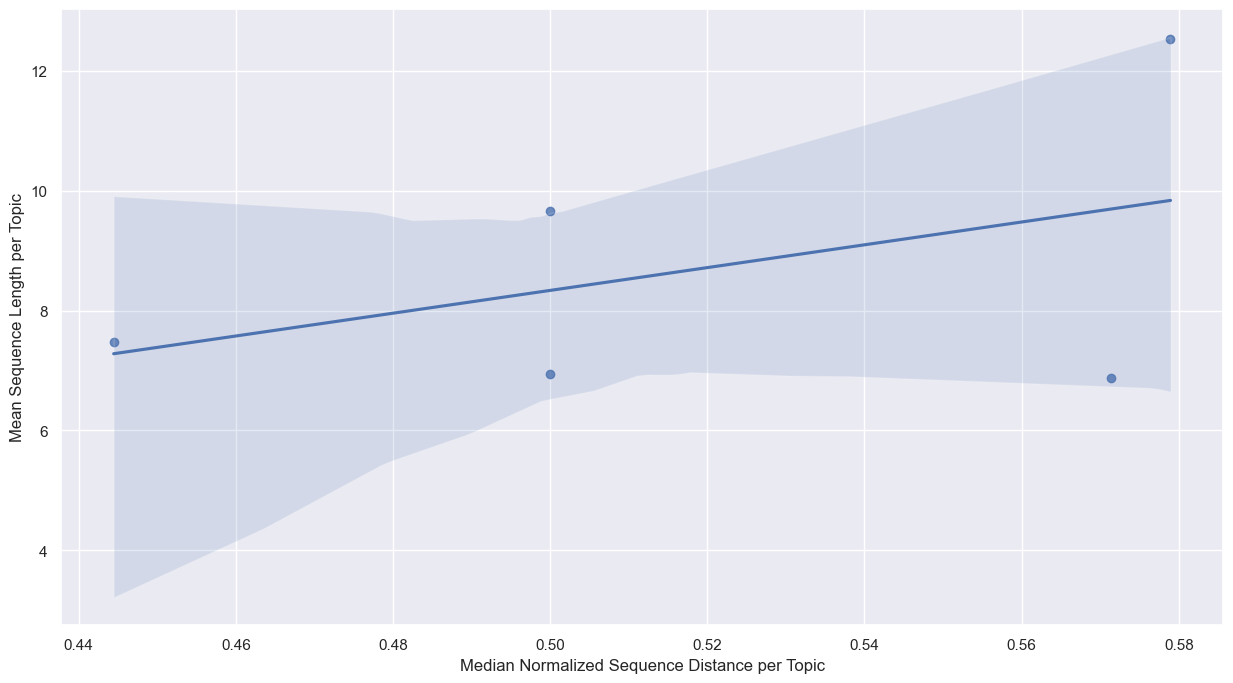

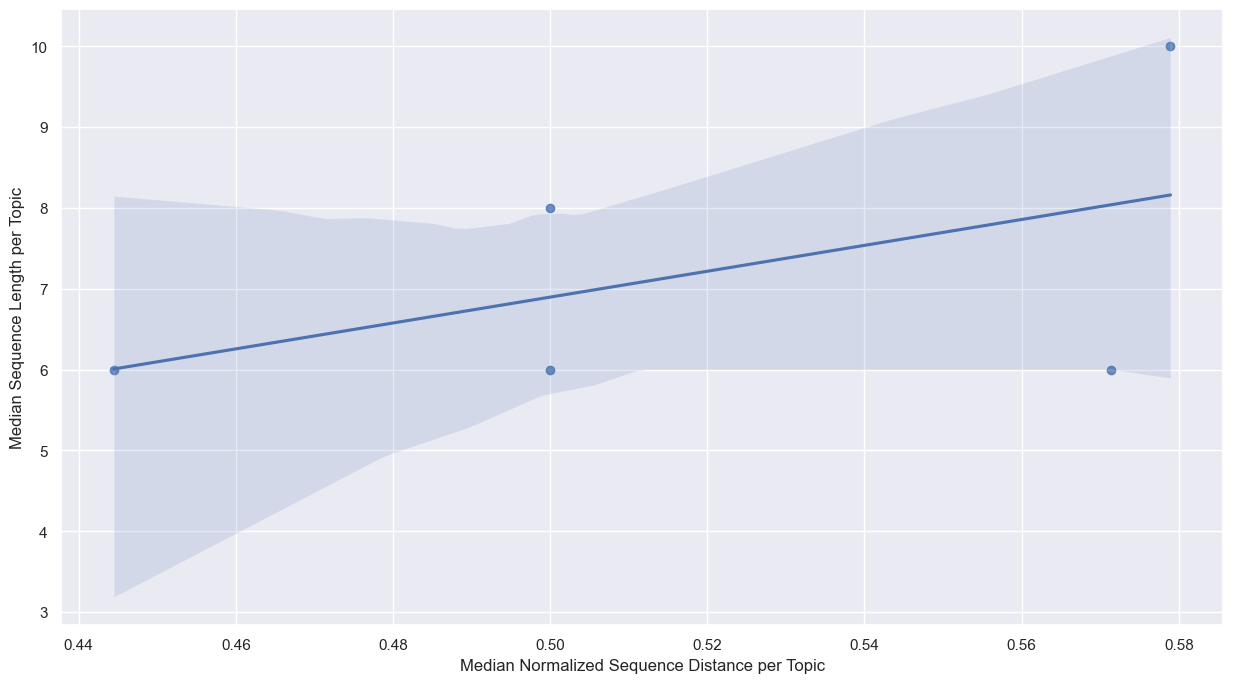

****************************************************************************************************
****************************************************************************************************
 


In [36]:
plot_sequence_distances(seq_distances)

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Sequence Distance Matrix per Topic:
----------------------------------------------------------------------------------------------------


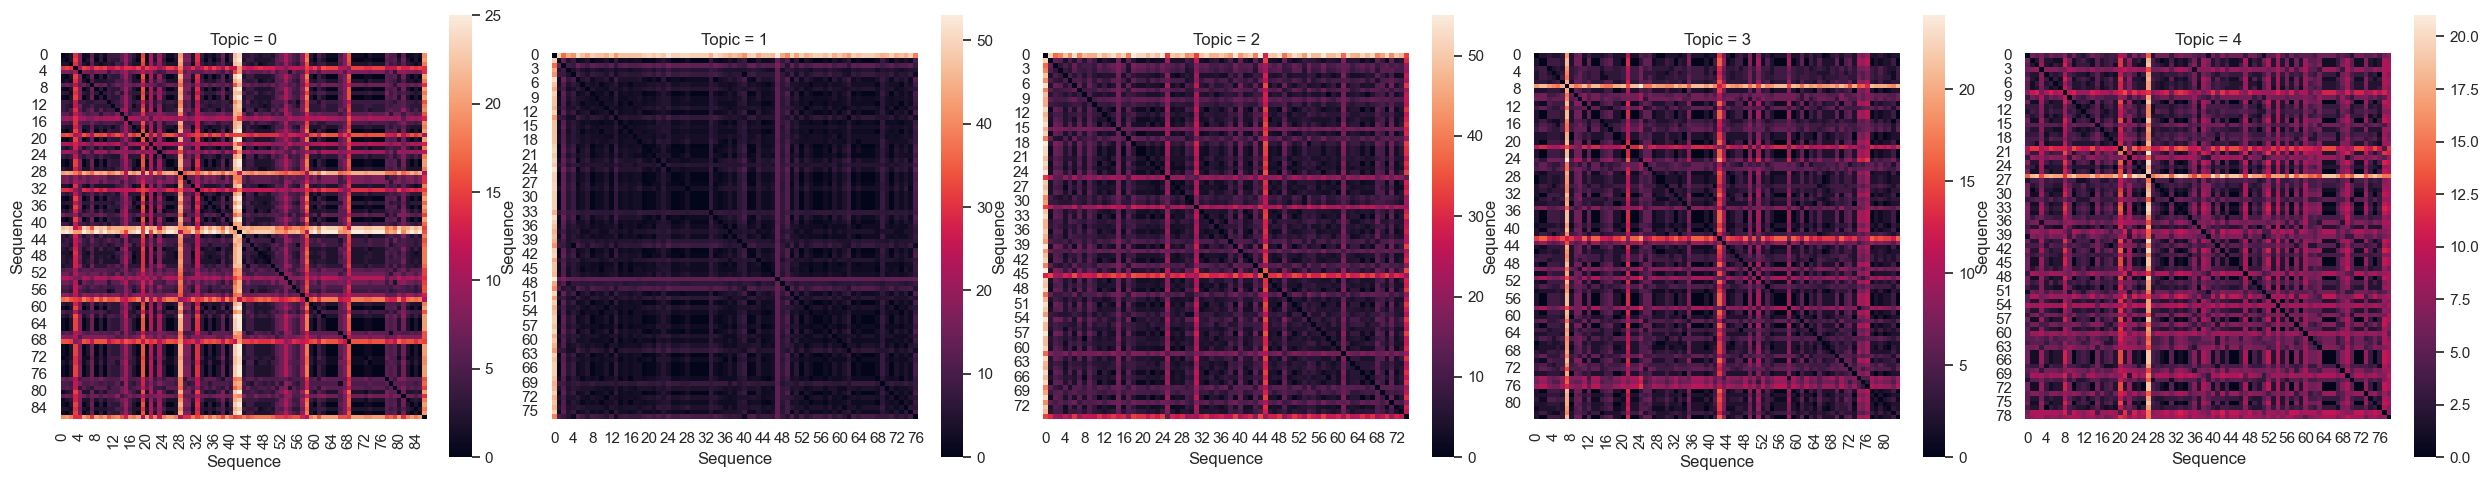

In [37]:
plot_sequence_distance_matrix_all_group(seq_distances,
                                        False,
                                        5)

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Normalized Sequence Distance Matrix per Topic:
----------------------------------------------------------------------------------------------------


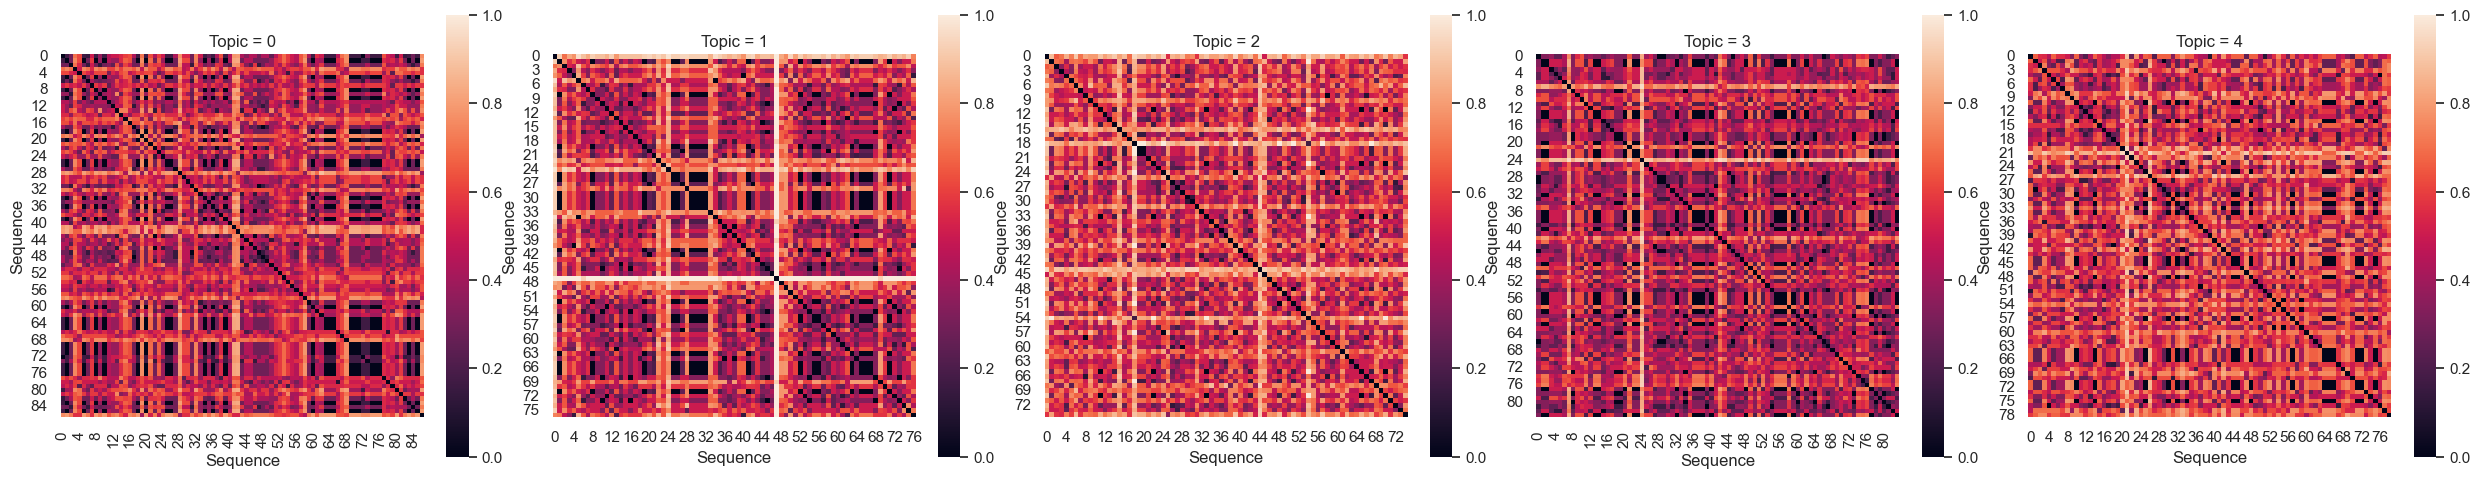

In [38]:
plot_sequence_distance_matrix_all_group(seq_distances,
                                        True,
                                        5)

## Clustering of Sequence Distances and Testing for Evaluation Metric Central Tendency Differences between Clusters 

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Cluster Analysis - Topic Selection Criteria
----------------------------------------------------------------------------------------------------
 
Unique vs Total Number of Sequences per Topic:


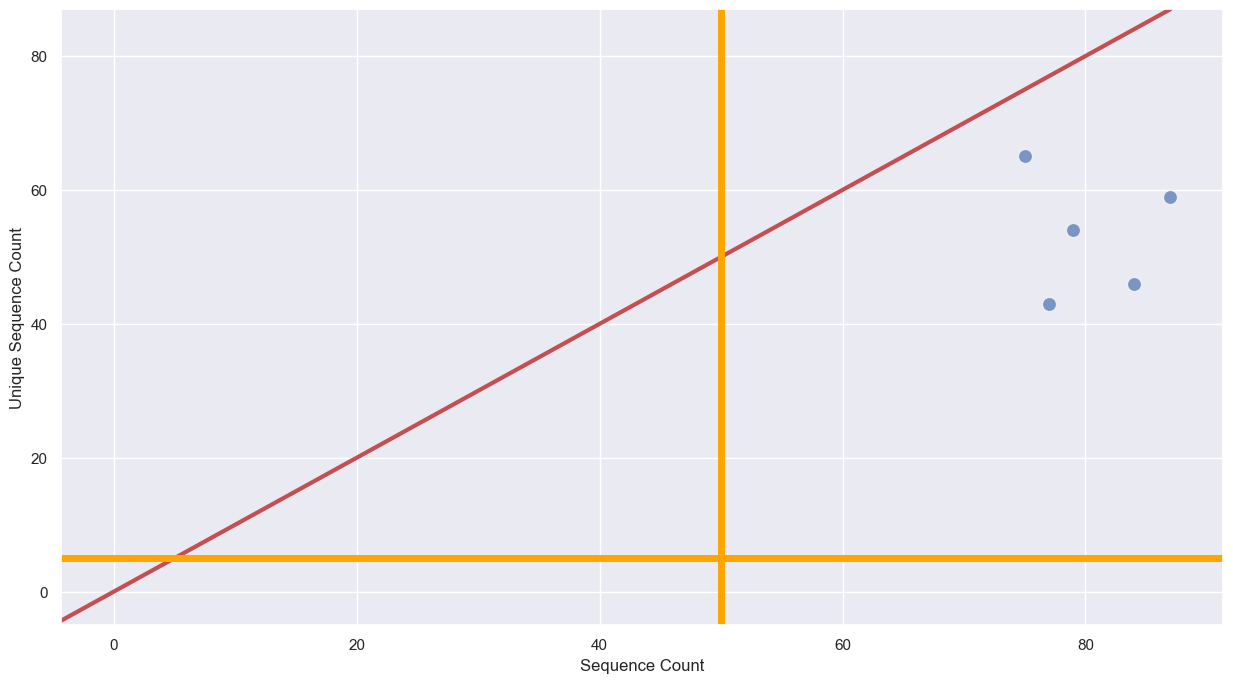

Normalized Sequence Distance per Topic:
Base: All User-Sequence Combinations


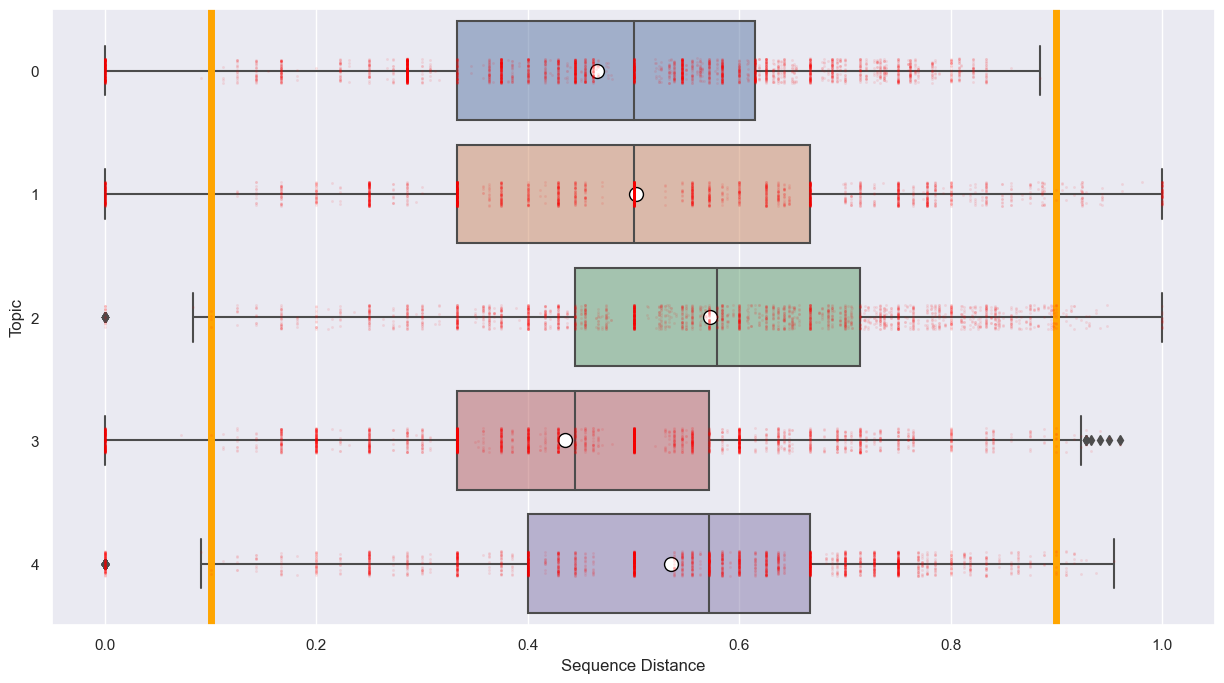

 
****************************************************************************************************
****************************************************************************************************


In [39]:
ClusterAnalysisPlotGroupSelectionCriteria(DATASET_NAME,
                                          learning_activity_sequence_stats_per_group,
                                          seq_distances,
                                          True,
                                          50,
                                          5,
                                          (0.1, 0.9)).display_group_selection_criteria()

In [40]:
cluster_eval = ClusterEvaluation(DATASET_NAME, 
                                 interactions, 
                                 USER_FIELD_NAME_STR, 
                                 GROUP_FIELD_NAME_STR, 
                                 EVALUATION_GROUP_SCORE_FIELD_NAME_STR,
                                 seq_distances,
                                 True,
                                 50,
                                 5,
                                 (0.1, 0.9),
                                 hdbscan.HDBSCAN,
                                 0.05,
                                 0.05,
                                 0.05,
                                 metric='precomputed',
                                 cluster_selection_method='eom',
                                 min_samples=1)

In [41]:
cluster_eval.cluster_sequences_and_test_eval_metric_diff()
cluster_eval.aggregate_sequence_clustering_and_eval_metric_diff_test_over_groups()

100%|██████████| 5/5 [00:00<00:00, 100.10it/s]


In [42]:
pickle_write(cluster_eval,
             PATH_TO_SEQUENCE_CLUSTER_EVALUATION_METRIC_ANALYSIS_PICKLE_FOLDER,
             DATASET_NAME + SEQUENCE_CLUSTER_EVALUATION_METRIC_ANALYSIS_PER_GROUP_OBJECT_PICKLE_NAME)

In [43]:
cluster_stats_per_group = cluster_eval.cluster_stats_per_group
cluster_eval_metric_central_tendency_differences_per_group = cluster_eval.cluster_eval_metric_central_tendency_differences_per_group
aggregate_sequence_clustering_and_eval_metric_diff_test = cluster_eval.aggregate_sequence_clustering_and_eval_metric_diff_test
group_cluster_analysis_inclusion_status = cluster_eval.group_cluster_analysis_inclusion_status
min_cluster_size_correction_df = cluster_eval.min_cluster_size_correction_df

In [44]:
cluster_stats_per_group.head(1)

Dataset Name Topic  Number of Sequences  \
0  educational_process_mining     0                   87   

   Number of Unique Sequences  Percentage Clustered Cluster  \
0                          59             70.114943      -1   

   Number of Sequences per Cluster  Number of Unique Sequences per Cluster  \
0                               26                                      26   

                                                User  \
0  [11, 12, 15, 21, 22, 23, 28, 3, 35, 36, 38, 45...   

                                         Sequence ID  \
0  [3, 4, 6, 11, 12, 13, 16, 18, 22, 23, 25, 28, ...   

                                     Sequence Length  \
0  [20, 13, 12, 11, 15, 8, 16, 15, 13, 13, 19, 11...   

                                      Sequence Array  Mean Evaluation Metric  \
0  [(0, 1, 2, 1, 2, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2,...                4.442308   

   Median Evaluation Metrice  Min Evaluation Metric Value  \
0                        4.5                          4.0   

   Max Evaluation Metric Value  STD Evaluation Metric Value  \
0                          5.0                     0.294174   

   IQR Evaluation Metric Value  
0                          0.0

In [45]:
cluster_eval_metric_central_tendency_differences_per_group.head(1)

Dataset Name Topic  Number of Sequences  \
0  educational_process_mining     0                   87   

   Number of Unique Sequences  Mean Normalized Sequence Distance  \
0                          59                           0.465815   

   Median Normalized Sequence Distance  Min Normalized Sequence Distance  \
0                                  0.5                               0.0   

   Max Normalized Sequence Distance  STD Normalized Sequence Distance  \
0                          0.884615                          0.205726   

   IQR Normalized Sequence Distance Clustering Algorithm  \
0                          0.282051              HDBSCAN   

   HDBSCAN Min Cluster Size  Number of Clusters  Percentage Clustered  \
0                         4                   6             70.114943   

   Mean Cluster Size  Median Cluster Size  Min Cluster Size  Max Cluster Size  \
0          10.166667                  7.5                 4                24   

   STD Cluster Size  IQR Cluster Size Cluster Comparision Evaluation Metric  \
0          6.817054              6.25                           Topic Score   

   Normality Test Shapiro P-Value  Normality Test Jarque-Bera P-Value  \
0                        0.000261                            0.078799   

   Normality Test D'Agostion-Pearson P-Value  \
0                                   0.052684   

   Homoscedasticity Test Levene P-Value  \
0                              0.522849   

   Homoscedasticity Test Bartlett P-Value  \
0                                     NaN   

  Central Tendency Differences Test Type  \
0                    kruskal_wallis_test   

   Central Tendency Differences Test P-Value  
0                                   0.091542

In [46]:
aggregate_sequence_clustering_and_eval_metric_diff_test.head(1)

Unfiltered Number of Topics  Number of Topics  \
Dataset Name                                                                
educational_process_mining                            5                 5   

                            Percentage of Unfiltered Topics  \
Dataset Name                                                  
educational_process_mining                              1.0   

                            Number of Topics with Multiple Clusters  \
Dataset Name                                                          
educational_process_mining                                        5   

                            Mean Number of Sequences per Topic  \
Dataset Name                                                     
educational_process_mining                                80.4   

                            Median Number of Sequences per Topic  \
Dataset Name                                                       
educational_process_mining                                  79.0   

                            Min Number of Sequences per Topic  \
Dataset Name                                                    
educational_process_mining                                 75   

                            Max Number of Sequences per Topic  \
Dataset Name                                                    
educational_process_mining                                 87   

                            STD Number of Sequences per Topic  \
Dataset Name                                                    
educational_process_mining                            4.97996   

                            IQR Number of Sequences per Topic  \
Dataset Name                                                    
educational_process_mining                                7.0   

                            Mean Number of Unique Sequences per Topic  \
Dataset Name                                                            
educational_process_mining                                       53.4   

                            Median Number of Unique Sequences per Topic  \
Dataset Name                                                              
educational_process_mining                                         54.0   

                            Min Number of Unique Sequences per Topic  \
Dataset Name                                                           
educational_process_mining                                        43   

                            Max Number of Unique Sequences per Topic  \
Dataset Name                                                           
educational_process_mining                                        65   

                            STD Number of Unique Sequences per Topic  \
Dataset Name                                                           
educational_process_mining                                  9.071935   

                            IQR Number of Unique Sequences per Topic  \
Dataset Name                                                           
educational_process_mining                                      13.0   

                            Mean Number of Clusters per Topic  \
Dataset Name                                                    
educational_process_mining                                6.2   

                            Median Number of Clusters per Topic  \
Dataset Name                                                      
educational_process_mining                                  6.0   

                            Min Number of Clusters per Topic  \
Dataset Name                                                   
educational_process_mining                                 6   

                            Max Number of Clusters per Topic  \
Dataset Name                                                   
educational_process_mining                                 7   

                            STD Number of Clusters per Topic  \
Dataset Name                              

In [47]:
group_cluster_analysis_inclusion_status.head(1)

Dataset Name Topic  Topic Included in Cluster Analysis  \
0  educational_process_mining     0                                True   

   Minium Sequence Number Threshold Value  Minium Sequence Number Violated  \
0                                      50                            False   

   Minium Unique Sequence Number Threshold Value  \
0                                              5   

   Minium Unique Sequence Number Violated  \
0                                   False   

  Sequence Distance Range Threshold Value  Sequence Distance Range Violated  
0                              (0.1, 0.9)                             False

In [48]:
min_cluster_size_correction_df.head(1)

Dataset Name Topic  Minimum Cluster Size Is Corrected  \
0  educational_process_mining     0                              False   

   Uncorrected Minimum Cluster Size  Corrected Minimum Cluster Size  
0                                 4                               4

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Cluster Analysis - Included Topics
----------------------------------------------------------------------------------------------------
 
5 Topics out of 5 are included in Cluster Analysis:


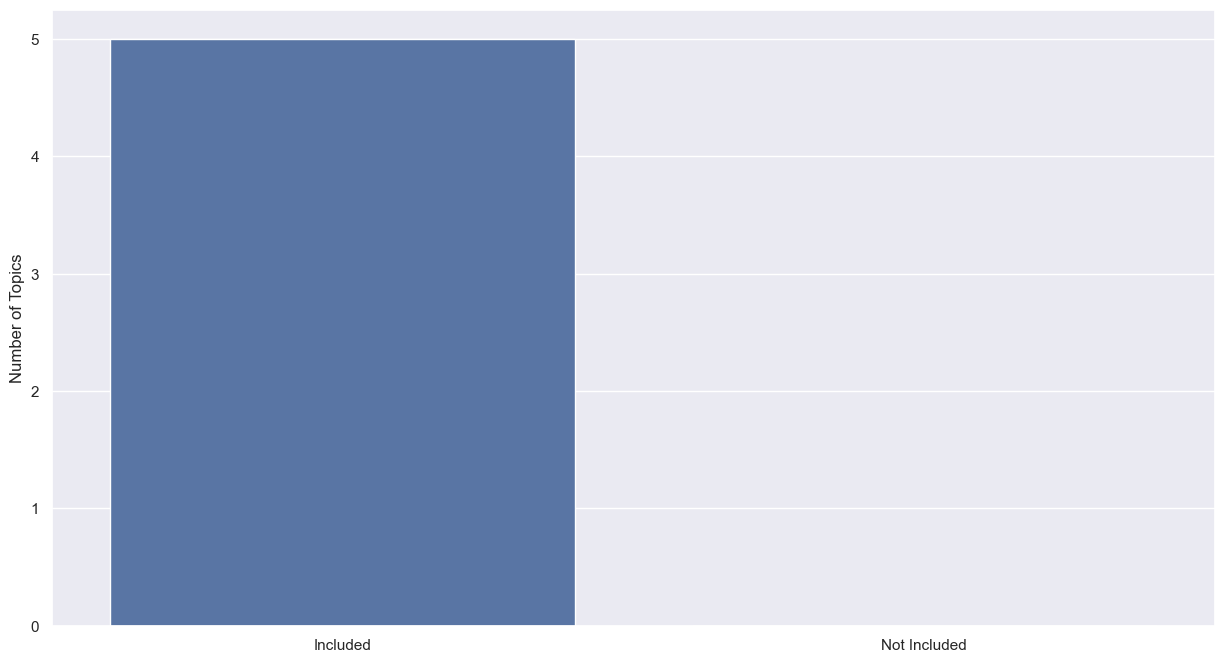

100.0% of Topics are included in Cluster Analysis:


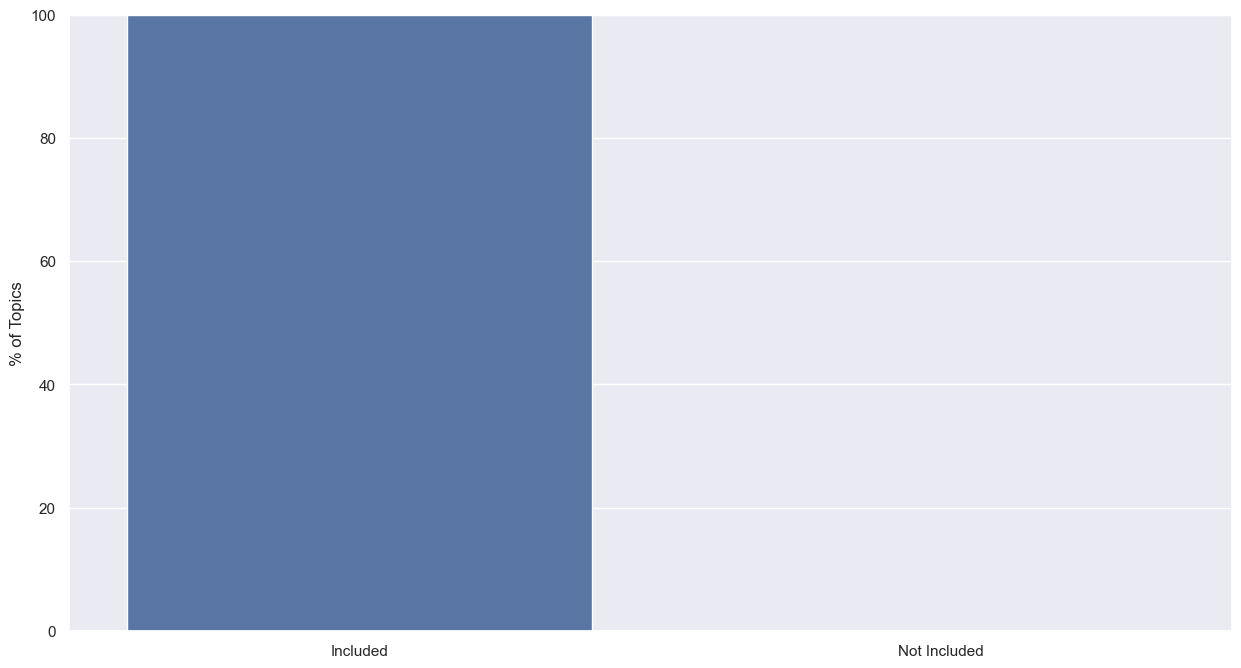

In [49]:
cluster_eval.display_included_groups()

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Number of Clusters per Topic:
----------------------------------------------------------------------------------------------------


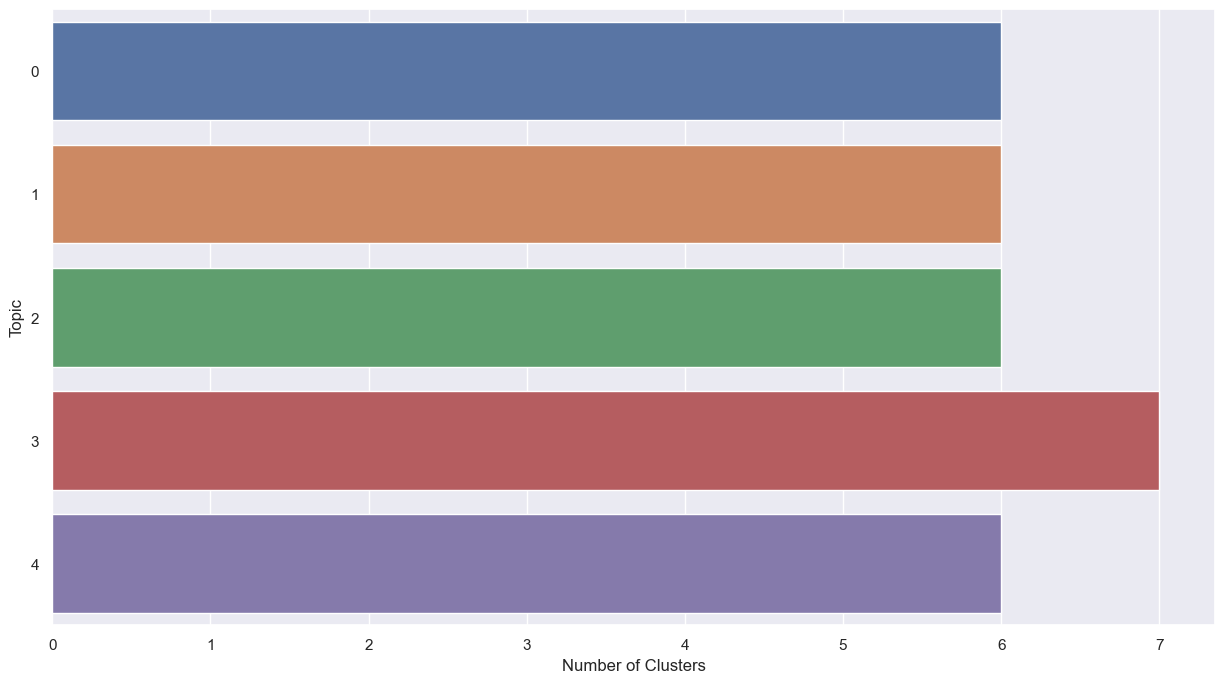

In [50]:
cluster_eval.display_number_of_clusters_all_group()

In [51]:
cluster_eval.print_number_of_clusters_all_group()

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Number of Clusters for each Topic:
----------------------------------------------------------------------------------------------------
Topic  Number of Clusters
    0                   6
    1                   6
    2                   6
    4                   6
    3                   7


****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Min Cluster Size per Topic:
----------------------------------------------------------------------------------------------------


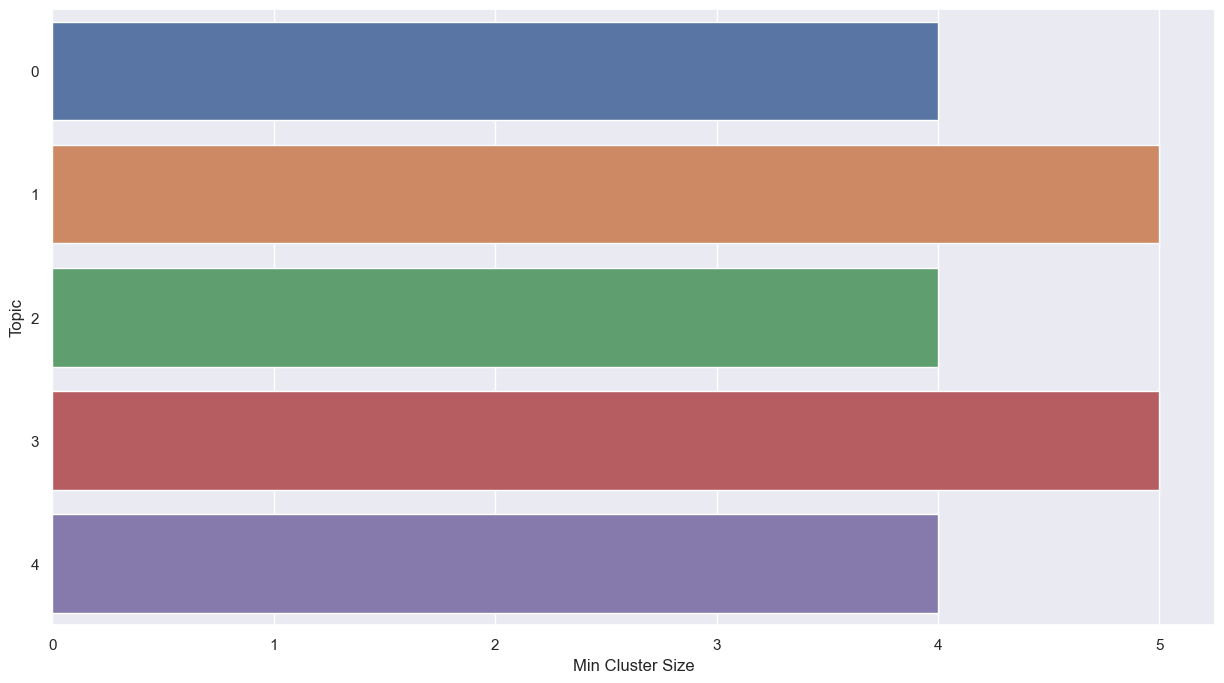

In [52]:
cluster_eval.display_min_cluster_size_all_group()

In [53]:
cluster_eval.print_min_cluster_sizes_all_group()

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Min Cluster Size per Topic:
----------------------------------------------------------------------------------------------------
Topic  Min Cluster Size
    0                 4
    2                 4
    4                 4
    1                 5
    3                 5


****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Percentage Clustered per Topic:
----------------------------------------------------------------------------------------------------


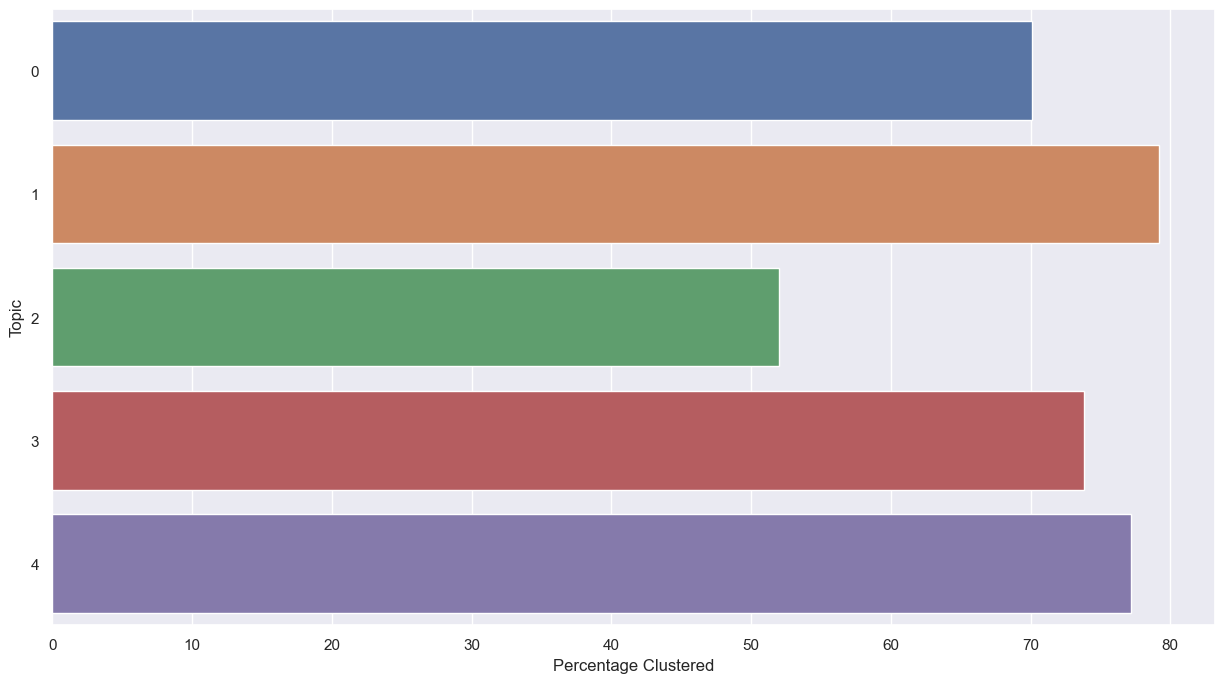

In [54]:
cluster_eval.display_percentage_clustered_all_group()

In [55]:
cluster_eval.print_percentage_clustered_all_group()

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Percentage Clustered per Topic:
----------------------------------------------------------------------------------------------------
Topic  Percentage Clustered
    2             52.000000
    0             70.114943
    3             73.809524
    4             77.215190
    1             79.220779


****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Number of Sequences per Cluster for each Topic:
----------------------------------------------------------------------------------------------------
Plots:


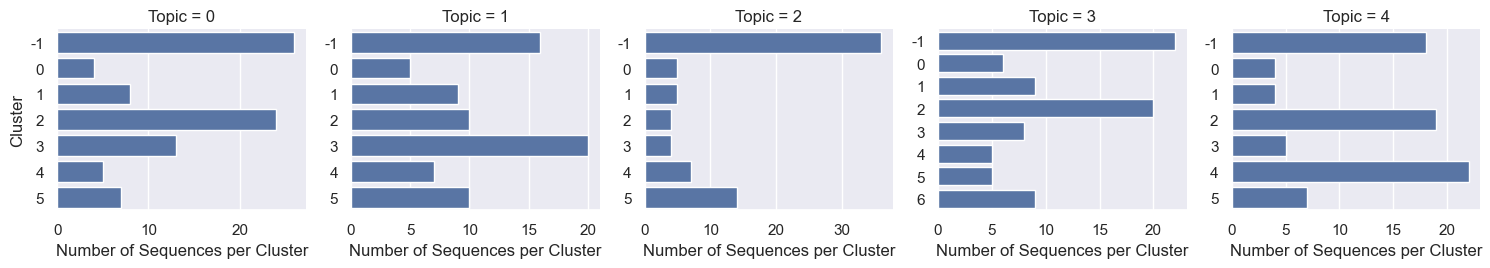

In [56]:
cluster_eval.display_number_sequences_per_cluster_all_group(height=3)

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Number of Unique Sequences per Cluster for each Topic:
----------------------------------------------------------------------------------------------------
Plots:


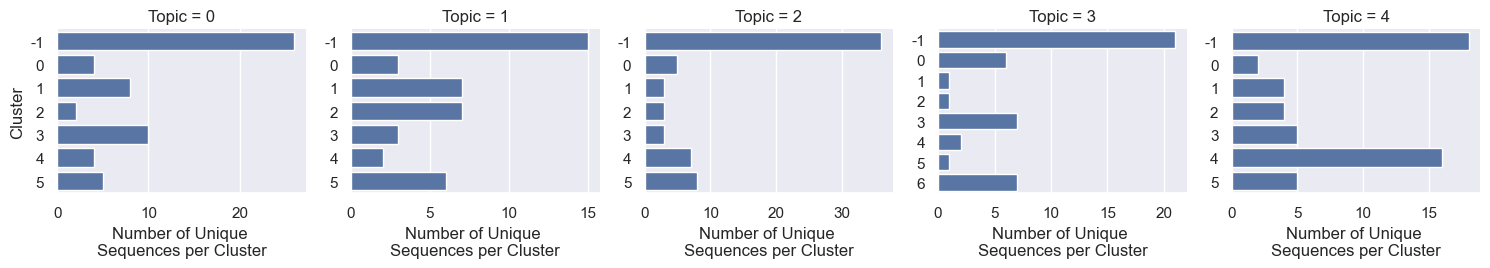

In [57]:
cluster_eval.display_number_unique_sequences_per_cluster_all_group(height=3)

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Number of Unique Sequences vs Number of Sequences per Cluster for each Topic:
----------------------------------------------------------------------------------------------------
Plots:


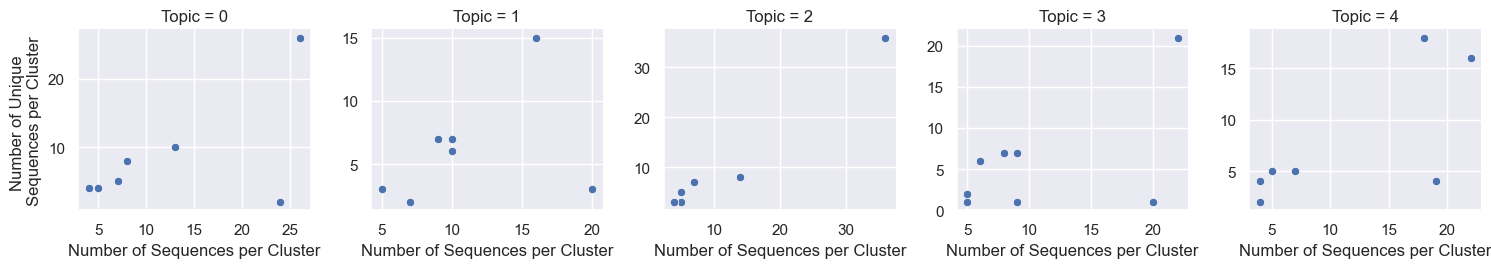

In [58]:
cluster_eval.display_number_unique_sequences_vs_number_sequences_per_cluster_all_group(height=3)

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Central Tendency Differences in Evaluation Metric between Clusters per Topic:
Chosen Evaluation Metric: "Topic Score"
----------------------------------------------------------------------------------------------------


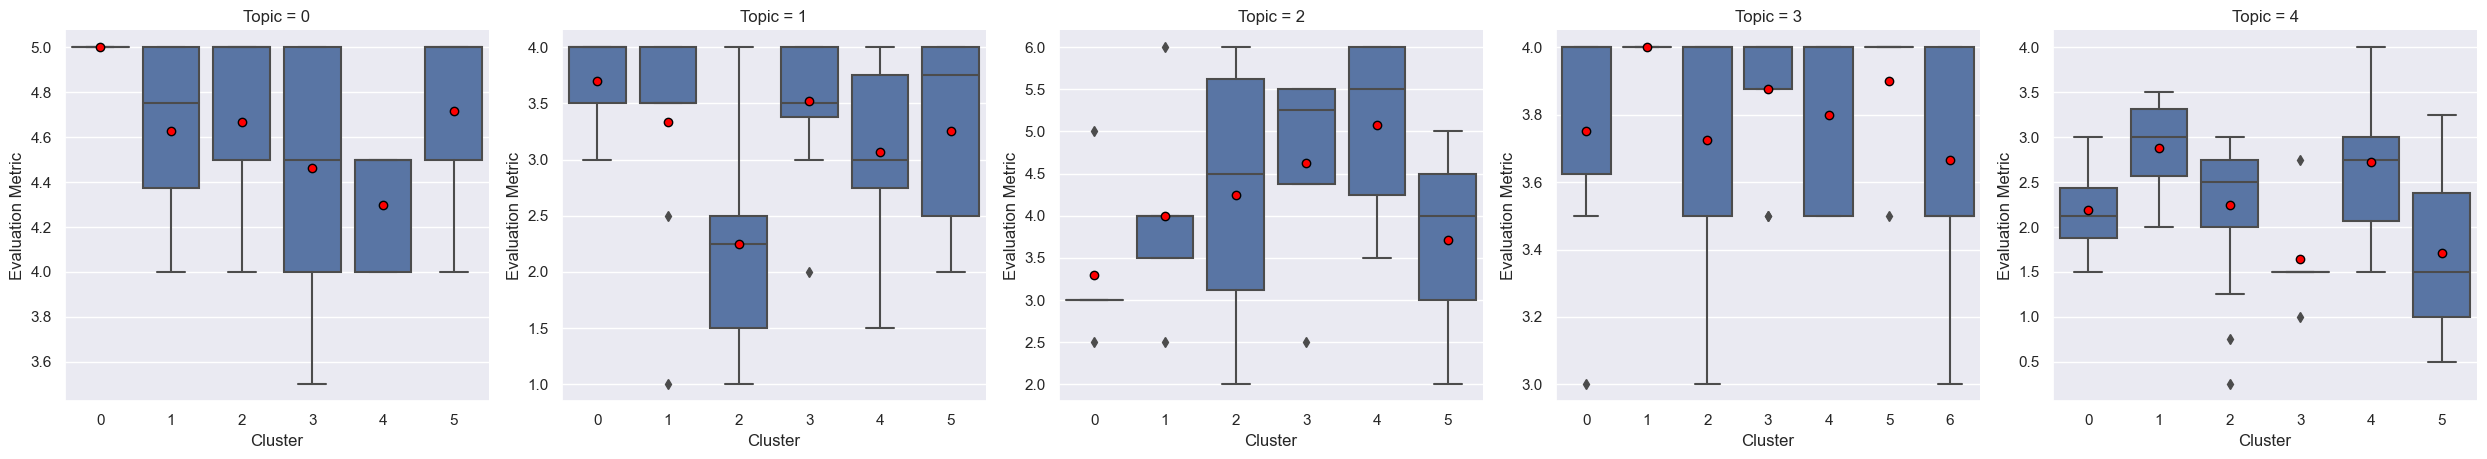

In [59]:
cluster_eval.display_eval_metric_dist_between_cluster_all_groups(height=5)

****************************************************************************************************
****************************************************************************************************
 
----------------------------------------------------------------------------------------------------
Clusters per Topic
Dimensionality Reducer: UMAP
----------------------------------------------------------------------------------------------------


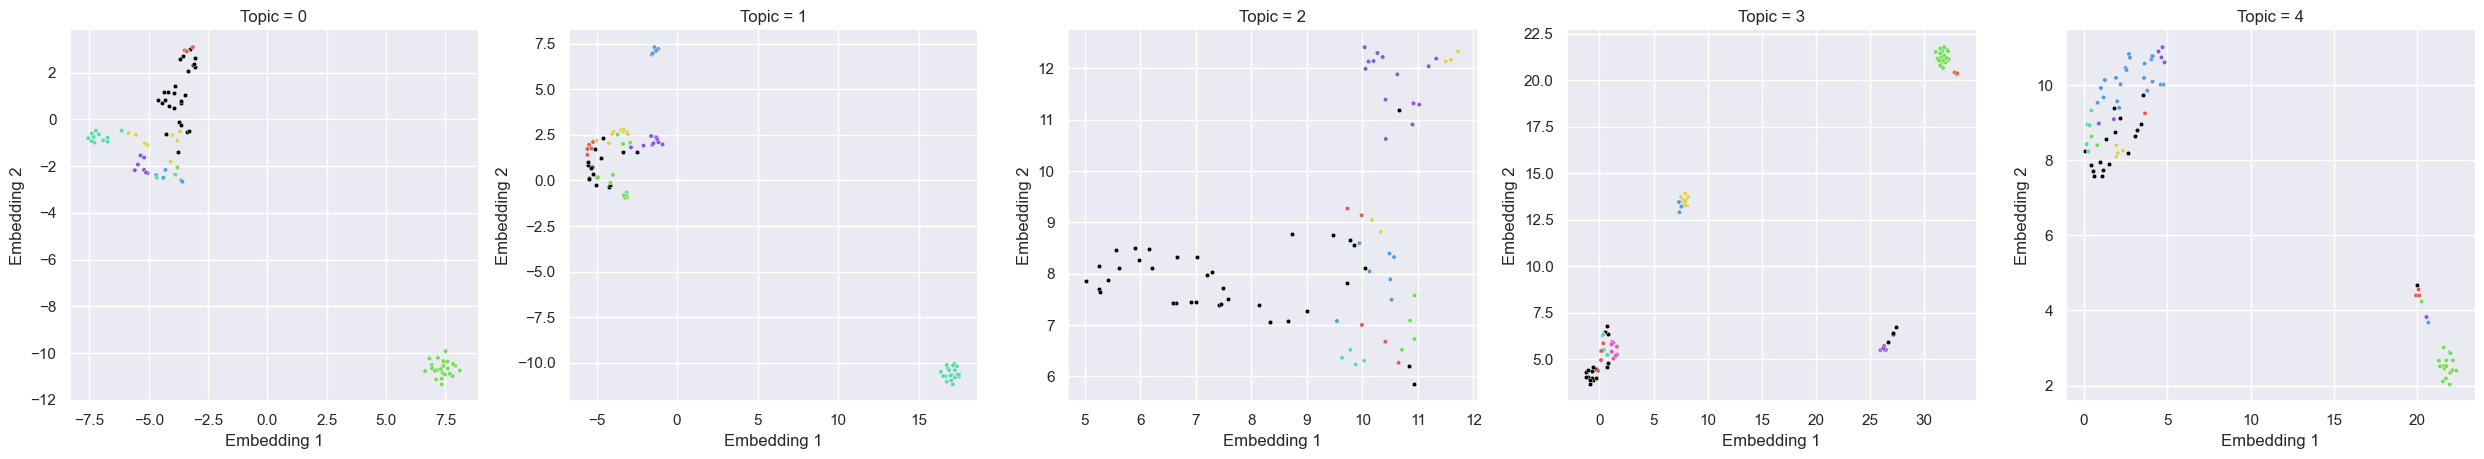

In [60]:
cluster_eval.display_clusters_all_group_umap(height=5)